# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

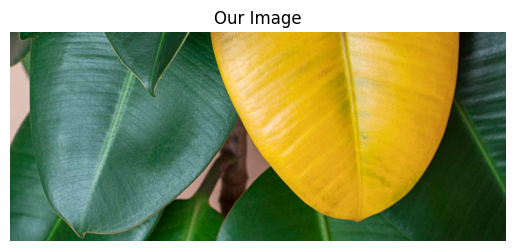

In [17]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving my image.jpg to my image.jpg


In [3]:
import base64
with open("my image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIBQADwwMBIgACEQEDEQH/xAAxAAEBAQEBAQEAAAAAAAAAAAAAAQIDBAUGAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAvm1dYlC2Dr7vn/QxvSsalVZQVSLSKiVaiiVSKCiUFUigqIoUAJVqNCKIohYiqlCKIoiiKiKrNWIoijKiKJKIsEoiwiwiwiiSiLCLCTUJNQksEsEsEsqTUJNQk1CTUMzUIo8FjtytzS3NN/Q+d9HGt0xtQUCgoFiKCqlAUKiKoUFJVJQKIolAoKIok1IAKqKIsCyApNQioiiLCKIoiqiwioyoyoiwijKiTUJNQyoyoyoysIozNDM1Kyok1DKwk1CA8DV68stCVavv8HuxrsXG5VCiUhVIoFACiVSLTNolKVSUCgoiiUCiLSKjNCKAoIgE0CjLUqLIASiKIsEqoogiKMqJKJKIsJNQiwgEsJNQkokokokoysqTUJKMrCKPE27cc464JvPQx7fL6s69FOfRQUCgqAFAWpQUgVYolUWVCqKIoLAsFAUgiKAAook1IlsAApKiKIsIsBSKqAiiSogIoyqMqqSwkoiwiwk1CSiAkokoysIsJKJKrKjyjvwSrGpqWd+PaX1l49ioFooFJSBSKCligUihRBQUWWgAAFWIoiiKIoiiUJQSwFIozQKJNDKwiwKqTQyokok1IiwBZKTKwiwSwijM1CTUJNQkoksIsWLEkokqoDyNX0efF0M3QnXHSX16l4d1IUFKKCiVYigAqggBRVVJZaAVSFIoFiKIoii

(np.float64(-0.5), np.float64(962.5), np.float64(1279.5), np.float64(-0.5))

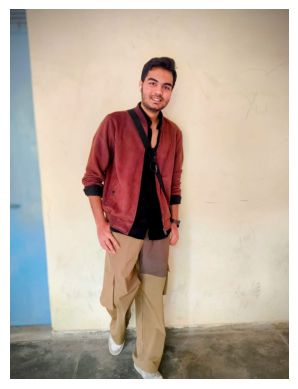

In [4]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIBQADwwMBIgACEQEDEQH/xAAxAAEBAQEBAQEAAAAAAAAAAAAAAQIDBAUGAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAvm1dYlC2Dr7vn/QxvSsalVZQVSLSKiVaiiVSKCiUFUigqIoUAJVqNCKIohYiqlCKIoiiKiKrNWIoijKiKJKIsEoiwiwiwiiSiLCLCTUJNQksEsEsEsqTUJNQk1CTUMzUIo8FjtytzS3NN/Q+d9HGt0xtQUCgoFiKCqlAUKiKoUFJVJQKIolAoKIok1IAKqKIsCyApNQioiiLCKIoiqiwioyoyoiwijKiTUJNQyoyoyoysIozNDM1Kyok1DKwk1CA8DV68stCVavv8HuxrsXG5VCiUhVIoFACiVSLTNolKVSUCgoiiUCiLSKjNCKAoIgE0CjLUqLIASiKIsEqoogiKMqJKJKIsJNQiwgEsJNQkokokokoysqTUJKMrCKPE27cc464JvPQx7fL6s69FOfRQUCgqAFAWpQUgVYolUWVCqKIoLAsFAUgiKAAook1IlsAApKiKIsIsBSKqAiiSogIoyqMqqSwkoiwiwk1CSiAkokoysIsJKJKrKjyjvwSrGpqWd+PaX1l49ioFooFJSBSKCligUihRBQUWWgAAFWIoiiKIoiiUJQSwFIozQKJNDKwiwKqTQyokok1IiwBZKTKwiwSwijM1CTUJNQkoksIsWLEkokqoDyNX0efF0M3QnXHSX16l4d1IUFKKCiVYigAqggBRVVJZaAVSFIoFiKIoiiAKIsBSAFIsCiKIogJNQgBSSiTUqKJKiSiSiSiSwiiSiSjKwiwkpZKMrCLEk1CSiCvOXv55VJVqbzqX2azrh3ohQpalUlBQAKAgok1BQUBaFJQKiKFAAAKZ0IqEsBSSiUALKIogAIsIozQAkoiwSlgSSwSwSiSiSiTUJLCLFk1CTUSSjKwiwk1CKPMr0+coKFlPZvn18/cqUUCqBVJQLAUlIKIoAUAqliUBalIFAEsJqCiggVcWxFJYKBAFlEsEoijLUIoksAJKIoiwk1CSwSiAhBLBLCAiwiwk1CSwiwgIo81PT51BQWU9XXj38/dSUoKoolUlAUghRQAKlQBQUpSAUAEqUKM52CgFAkqEokoAACqQBAEqoISiSiLFiiLJIsqSiSwSiSiSjMoiwSwijKwksIsIsqA4F9HnlBQUPR6PP6eHYrOhQKKJQKJSAUUlCUAShVlBUAFWLBZUAoAAAVKiAASyAoICrCgAAEEAQVKIqSAkqpLCTUIsEoyozNRZNQikysICSxYQSwCzgPR51BQKO3r8fs49gxqgopQCAFFlAAUlAEFWVSUQoBQQUiwoALAElqCzj8I/RZ/JY1P2HD81wP1G/yWK/b6/G/Sy/QvL6pQsFWAAgBUkpUsAkSwSyosIsIsIok1Fk1Ek1CTUJNRczUMzcMNQk1CA89l9PmUCgU6ezx+3j1NMbiiUoqIsUoigBRAUAVFVYoAKJQBJVIsCiKIpYIeLn+a03xzembz1DWeXM9E49KdeOo+h+q/F/q+d9gyqKAAAASxQkAQIsIsqLBKiLKZ0MqICSjKwk1CSjM1lWaIo81l9PmFAKDfu8Pu5ddF57AlCghSKIoigIUAtFKAolAAUBAAUEASxXn9Hwz4vO465nLt2l8Wvpsb+Zz+xws+drpz3hvl2O36b8x+l536OufTFqWmdQFSKIqoAIgIqpKIsIsEqWAixAqSiTUJKMrCSjDcXM1Eijy2X0+cUlBQ17fD7ufToXl0iiVRKItMrAACgKWAtlFAAAlFlAQAFBAAWfkP1X4rUzrPu016vdvh6fJ17Wa8/H2SX5fl+xmz89y+74evn8X6f8AKfUvP9ZZeeqlqxTNBSouYsKCBECoCAAixUpMtQilypMzcIgmdUyoksJNQgPKX0+cBQUL7PH7Oe+tl5dVlAAFlEAFTUARRQiyqAAoAAKgqEqUAABfn/k/0n57cv1fL9rPWb4a59eqjM1mXnYlz5fXzs/M+he/k/a2XnVCooCpRKMrAgqWSCksEsAJZYSiCoshKIKw1BLBLCLFiwik8hfT55QUFIezyenG/QOXVZoAigCUFFSiKIsCWKKFJQKIAlABC2VAABlfjfA/U/Eu/pT03HX4vL7nHWPn/Y+fyPsZXO+eNc86ZkPi+rx/d6+X7Ai2ULAoSyKKkozKhc01AQsgiCosKgAiwAgICTUIsIsIsWKPIPT5lBViKHo8/ozr0WuPYUABQKUhSLABKM2gBQoAIsJQAAWVAAHPpza8fm9vmz37cu8l+Z5/rc6+f7XU35/X8o8nm9rfL5/u9flj5/678z+v1ztlyUKIASglpLBnSMKJSgiKIEgpAAEAEBKICAiwkpYo8dPT5lWUqCwduPaX2WXj2ilzVIUAUAAEoksLZQACgAiwLAEC1RACoko+ZzSdvUup0xm4mtazsx8/6XgOHL3y5+X6vVyk7/TxvfDVmkAFJSCqzUiyygIqICLAKSyEsRKqBQiBEBLABKqSlysSKPJT0+dVhSUonTnuX3Wa49opYsFlAQFAAAZ1BQAqUAAQAEqgKJAqwgDxeH6PzZ09l5anXHTxJr03zcLPo8fl+lfo3UOdnRj1XOtcdWVLYKIWWgJKIiKloIksAEoijM1CVlKsJNZJpTLUIsIAgsKk1CKPJV9HnWWAWgazo92sb4dwUoigEBYsAAEsFlAFgAsAgJSpQKqWQAAQ4fI+x8SdPX1x0nX5u/byl1x7b1PneXvxPqb8fTOunu+Z9bXLVl1y1rNigohZaAgMzSJQAgIqosAEsiKM1EZ1CgSiTUqTUIozRYuSoTy09PnVYlJShYPd05duPaLJZQAAEUAABLBZQABYLLCAShYKgUSwAL8n6H463v6uXpz016/keia+llZvx3v5Fukl6eTouPb7c63x1rO2bZRZQIWWwCLFSwFIAASEqoAAiGNSyazoJSAgEozQilksSKPKX0+dVyKIpYD2d/P6OPYJYogUBLBYAAEBZSyiBAEsUAAIAWZNvF8/U+75fzvnX6XzO2L28/6T8r9SY6eb7Pgzvn7fk89Y+1r4e5r6Pl8n1E4/dbk1qW53c7RZSgAoQBLFSwWABLAAQASwiiS5i2EJQKzZQCASiSwBfLZfT5bVlUiAiy31eny+rj1KzqBYsAAIAAQFAKRACUiwGV1Pm/Mm/teD5OXT6OPFlr1zz5Xt4vVw3x5SN+f13yenPoz4/d57n7fu/I/pOO3i+3wm/iX6HCz5f2fznq6+f9fvGue+ms6TVlstlFlFAEASlksAIsABAAEBYDGs6SwlzRAJSoBLACLCKXyVfT5bZZbZYiwgO/r8fs59aMbgVKJKCUEAEsFlAAIsQUgHye/yp258d8b2zOmLMIOkZOho8E9Hn34525WvTM6no8Pa+Z5/1HX899Pz+rr8z2/Ns8XXHTv5v0n0fyXt49/0m/H6mOlzbNazUtlqgBAEFSwCJNQILCgQBLFSwlAIACxKJKWLEiwSiKPLT0eZqVbYiylwsTr7PF7efXQx0iiLCLEBUoiwAFEsBEAAcO3xZvjyvN6eUz01OPTz+s8WoOkuTtc7OPl9nn1y5Jdebrrn3z6M/P8ApeK55/c+L9zFx5/oePj1+Xrj29Hm9PLrMerv9X4XqzP0/T879hy9lxtjSWtJaJQlICAASogCKAEgKiwBAlACgSLFAQEogTzU9HmWaUshVXM1E17PH68dOg59QEBLAEABYBZSUSSwAEPJ8j0+Keq8u3muuXbh6LPH6eGzlWlS6rW82HHvg8M68d+G+7welvr4vp/Pz2z+g+B+hw38P7/5ZPP7fH7+nPUmufpzoPT182839B6vz/275/RcauNWWwABKXNCLABCIABLASwFCAAQLQRKIBLAAF8w9HlahdJYAVSerzejG+w59QWAixAAAIpZREsAIB4Pb8WdOXn3yenr5PX4bHo8/orzrpOd1GufXn1RrNlqU4+X3+Pfn5WTXn+p4evHHo8n6P8AOfoZj3+T28eXf8r7vD7u3K6lx6JRNdeW1v0/k+iT9Lvzei+Xpc6ssoQAIFgAiAQAICACggAAAKFSSiLBKWA8xfR5QFlUC2WHo8/fOvQOXZLAFSiBAAAAEsUCGTweBnPq8+N51e3h9viM+rx+q5xpVzjpzms9ePclsMrF1w9Gbj506c+nh3eeZrn+m/Nfrsb7fP8AofF59vke7yezpm2s95neC1Gb25bX7vu+d9B5em+fS5ssAAWAgAhLBLABLCCgAAgABYsoIsEogAPLZfR5gGs6AWoL24dc69aXj2SiLFAgCEpFqVAEsUQeX1fPmvn8PT43q59vN31N+L2+OPN6fL2uO2ufZqY6ZmuHfnuXdDGOmDWsarzeT6Pzt+RmzXHH7P8AJ/reXd+f/Qfmc65+nl23vTTHXPPtzS50sm+PpPr/AEfm/Sebe8buNASwBYCLAISwgAEsIKACAAABbJQQAJNQqDy2X0eYC2CgLpcdc6zfVc649wEsUACSkSgACBUsHyvq/Dz15+L0+S9+fbz9tT0eb0cT53bhrXH0+rw+7PXON4msbxuXpc0mdQxvGq14vdxvP50ueni7/qfyH6rl36flPqfJs9/TPSepbJc894ktvOyejltPsfR+Z9N5+m8bY0lpLBKIFSwASyIKBEFixAUAICwJViygJSAAgPLZfR5gKlKKu8XN1c2a9Wsb49QUFgAIEJQACBYI5/D+p8ud/Pw7+fXTj349dO2NSPmZ7eXXn9H0vlfWz1zz6c51xrOo6JszNZMLLdsGfF5+vHr4HXjUvr8n0c9OnTO8e0kjnefWLy7ee5118/pT6P2Ph/cnDe8b1ztlIACBUoiwSwSwBEshLKAAALCyiUEolACAA8iX0+aiFlKKWWLZZr09OXXj2CUFgAIEllAAIRQj5fi68s+rzcOnLes6l1OzOo8ng+j8/XDp9j432c7nHvxnbGs7jW86W43zMyyzNSz5Vy6fPN4Ovt8nqz6PTvn1x6c8+vEx1zuR4vd8249Ps8nuy39/89+hct7zrXK2ABLAABLAFgIsQCLAAAAAAAABLAAg8lzfT59CRZaAWWLc2PT24d+PoCaAgAIEAAAk1CY35Jr5Odc8+vz+T2eHc774dq6WDyeL1ePXn6/a+P8AYz0nD0cJ3zqaNamic+vIYuTXHt53P546+FrPQ9HXz9c9/V057x6pyo3qaifM+j4tcvT7PJ6ca1+i+D99x3vG9cgAAAIBKIBLFSxAEogAABCgAAAgBCoXx3OvT5dBVlQBZQI9Ho83p49yXOkoilixIoiwAASxZ876PxJvyyJ6seH3+XWeHp8Xrs7Z1yXw8Ok15e/1Pm/Rz6d8e3KdMampdaLJz3zOZbL5vX4rz8Q34tTfM16uHZv2b5b5+3O+fWNLF5+T0cby9Hfj2xv3/X8Hvvm6azq4AAASwASwAAixUsQCCAAoCUAAAIsEsUDx2X0+a2UBKlFlEsO3r8fr4drZc7SiSiFIsEoiwAA4fnfufAndrlb268t0+R3vnvL3+TflWNy8+/s8/oz6OvPrwb1vHQs1lM43g57mx876PytcOI35N41Tp6vD7V308/XHt115ds7TWY8+TXPv28/bGv0Pfyeu+Te8asoABCywASiBQEsBEAggsAoAAABLAFgATx09PntlCiFRZYSjfs8Pt59djn0AgBCwAAIsAPJ8H0+Oenlz629PP6uHJPX8n6vjuPPmdNcNZ6M+j09cp09XDthrPXOi8+nInPWE1pTHyPr/ABteYN+YDt1xia6evweyd/RvNx6NTUPBc9ryvbHrzv63s5dXk3rOkWKpFAAAiwSwISkKgCIAKAASwWUQBFABII8ll9XnazoqUJUWWAL7fF7OfXqjn0ASwSiKEsAAJ5/R+bm8+fGnpzjris658GfZx4dLPPrXSzNz0nTsam/ROfoXlpZc8uvJM5ua66zqTj8j6fzOnjDXED0b5+zPfxdOfa49e+muftmN8o8Hfh6Ncunv8n0c6+p15dHl3qUFpLAAABLACAAixEsgAKEFgrNAUCCQCCgPJZfT57YKUixKlKB7PH6+fTuOXVLACLAACLACfl/1PxJ0+Vnpp6PJr0cbOXLrbnxdN9rz09nhz04ejz+u9NbuZrXp49JY0OPLrxMTWi2w8fz/AGePr4Cy8wOn1fkfV5+rwT0eXfD6u/P15+3rx6+ZPL6PL3uN/c+L9HF+3059L5t2UFqAAAAQEAABLES5KABKIsAAAWESwAAPHqX0+egtlEsS2VRYnp8/oxr0jl2SiAAgAEogGN8z8x5b5tb1ys3z5Z3hNb8yX3dsserPo493TXXl2mtwl6yDlx9HAxc6OudZT5fm7cevzwuQNfT+X9LHoeH3eW57enw+vPb0eP1eOa498dGe32Pjfczffvn0ebpc6oKAAASiAIBEqCwEsgKAAQAABFIQAQA8tj0+e6zomoLES6zoqJXo4ds69Vl49gIACLBLAAsHg94/BT3ePrnOd5Tlnpzrksj6nPvwx7unTO5rHo8fuZ3LM9d1DPDtwMbx0Omdcbn5GY6/OAAfS+b789emOsx6vB7fL11x9nj9XlnTHfl1jr6/N75r7PTn0eTes6AAogqAQqUgAASASwJSWCwAAAICAAQAPLY9PmtgtlEsLYNJZXfh2zr1U49qlGdQSxAVLACywA8H5v8AZ8a/JT7dz2/P8v0fE/MY+74tY7+b08Xp6dMd5rn6MF63OpamjHm9HnMaz0N+b0+PXP5ll6eCAAd+Gpfr8eueX0MeT6fzNcfb5OvkuemvLrXH1/W+D65r9hvHTnN2UoAoCLBKIAAAhAEsWLEAAAAECxYsASAil8qPT5dXNLc6EolClldeXSX23OuHeALBLEAQUAABLD5E7+fn6nLtya8nLv8APuenPTprcamt74bl7ax1VaTjy7cTnubW/O+j8rXDzaw6eOywAA+n18nr5e6+f05mvH5PT5enkbxrXLr9D532Jr9F0xvjrWs6sqVQoQskNMjUlAACEAZ1FxOkM6AEAZ0IAFAijKxAr505PT5O189PX04d10iapYoG8bl9m8a4doFssRLACABVhAAPL876/wAbPfrz6Yz24fN+r82sPTd3zT08FzhD1enx+ma6WROfDtwW7nRMfF+18Lfmg35rLAADv9L5f0+fq1049sej5vn9zp48dvpXn28f2OH0by3vOpjWsarSWgAEACLAAQsEEWwASBQCChAEoilgSKMqPnOl9nj5a3Zqbzc3VhbrNioLrG5fbrG+PaSossEogIKCACqgHyPr+HPTyXO8+nn836vhPN28/TbpeJrny9/lMenz9Jr1udsxx2N25OHxvqfL34itcksAAL9j431s9tdcb5evj5vpfJ15vuaxvl6O/v8AD7t+fe8ac93OrLS0EASxQAEsAIESiKWBEoiiUIoSiKIoijNoyo8FPb41XNDOrYLc00lVrNj29OXXh2zrOpQqCIsIsAApSApx7Q+Luzn7Hk9nBcePvzvPjrWNdO/Ln0mm1NYquU6lxvO0+R4+vLp4CrmAAAe/weub9289OPt38z6XgvP6u+PXn09Pt8Xt35tbxu41vOrLZSKIogEogAIsVKQCAlAAAAAUgCwSwCwI8CX2+O2M6ololAtgtyPb383p4d80loEBKiAAACgAPD5voeDHozz3J2+f4vo/JufZPN6tsQXpNpp08+zs58zvzvjufmDp4FaMzWQAB6/J6pr6PTM4e6fK+v8AF6ef7vo+F9HOvqe74f02PZrOrz1vGjVlsBQAiKIsIokogAIuSgAAAUEolBLKBEsAPn2X2+JZZQmqllqCgA9Xr8Xt4dosxuywLEBQAEoBAtBMfM+t4M9fLN5x6fN5Pdhr5u/b4dZzbvTF1hd3kj0ZtOPyfqfF35w156gsAAB15U+1rn14e/Xh9sMPbGPnff8AzX63p5um8by1rGk1ZaKIoggKSyAWASiAiwKIolAQoQKAQAAIo+dZfb4RF0llWWVYWoKDr7/n/Q4drLOfShAULIUzSAoAFBHj9nkm/HnWefr561JZ+d/S/A68J6Pk73j6+vnerHfXD182uPXhDy+Tc6eKTcucqB1jiAAU+p6Jjl6935frT6078+ffz/a8/p6ePW86Ztmk3ZbAUESlgEqIoksAqLBKAEsKlAAAgCAAEqoPnj3eFZYBbYlqVQKDf0PnfR49tyzj0CgUABLAEBQCxl5vTwm/BLceuXPY8vzft+RPH5Pb77w/M8/1HOz4vfvxvXn4vb8nWVxd+e5BKL3x0zfKLAAPovH2mvN+g+X+hxvry655+rfs8Xt157qW89azqzVKKIskASwspYCLBKIsSKWLAiCqFIsAQFgEARAPAj3eGoNJVWUCVZVoL9H5v0OPXtLOPeyxAUEBUsQsUAEsVJnRfmOmMespbPn+mPH6PR86T2Fc41kx4/oK+B879djWPx79L494+Nffxs1fUzv5DpjfOLow79l8vX3ejOp9Dyd+Pf253zvSe/xe1x1V1ytlTpc61AVLIKSAEKlIsEogGdYLnWVWUssTQtSwCRKIBELAA+el9/zwKGrZqWUlFUQvv8Ht59PTK8/eAAAgFFSwABAATzeb3eHPp57cp1vxPvfMk+nz8X1E+Z6/N0mewQsSALk48OvnWY656Z5+b18Te7qpneZZqXK+jzdM9PZmdGvT1zvXltWxrOk1qXSwLKiBAEolQsALUsJneYTUAIqhRLAJEBLAlJLkA8BfofPKgVprOpRZqAAvs8Xrxv2E83oAELLAFqEAKEogQsHh93Ob8Hn9cz6uHTwfRX4v0/H0zj2+L286pZiZ1koJjfI8/mrU651NMY1V1ZbEsgM3t7vH9GTl2u7lvOrm2VLZqtWWwFFkilhCkSywAiwJLbEkotAWCgQAkksEQsuRnQypfDT3/PaiWhVlloBCpaenzd8a+gl8vqgEAAABZQEllIAQRVeP2eSa83Lrc+meD6XCLScywQEQnLp4jwev5/0OuOmdZXG5ZVlEozYl9X0fB7853rO94tlS2UbxpNiqAIBZKIsSxSLADMsItJYKLZQASiCSZ1kAkpYQIPHV9vhigKWCoKKAvbh2xr6Nl8nqgWRItlAolFlAIVIsAM0L4vb87O+c3jPSRVoAMiMxmL8T7n57WXv8Pv6Z6c+vNYJVlLAhJr3e3yevOd9OfTWLqWxZUazquhbEqWACClkpM0EohAS0CSyRc00LQJYE1JIQgJLlUuQDyj2+KwQNQhNJQlFlV057l+nrG/H7IJcyoWUCpQAoJYKEijNCfO+h8/PS8uvLO4qUWosM4uIl1mOPwvo+LWNe/wAHu6zolXOdyICyxZLMX6fo4d8zfTn13m2W5US6zqtiioSiKUlIECIRUoSxIstEkUAtoJKiEREJNZVASwijyF9vigshLmkTSVVlALrNl+pvl18ftSyWQgKWUBAFhbKQQopLDHg93gx0uNM750KFZ1zOepqJ5/R8hOeJ2Z4+zyerrOtlpLmKhagZuca+j6/m/SzN9OfTedWGdCrqVN2KqUABZQSxASLGoBLBLJIohQsBSAZ1DKwmdQzVWSwijxk9vjqLmSzWKlNJZVlAFlPpduPbx+1LM6iiLAAogFELKAAA4+D3eHn0qWbw1koXOLIA4/D+h88vXmuddvP26Z9FxoqCpDUlJjWMa7fa+d75OnTG7nVl1LYi6za6JbKgqUgAURKgBYBLIQIAClSUIokozKMzUIsJEWoPHD2+IluQslLLZZQKBQ+j38/o8ftSs6ihLCFASCqCpSS5jQoDzeT1ebn1yszpi5rZV4qjPHpwjxcO8l58fV49Y7+nzezeej07l+fj6eK+ffVzOTWbM8+mM6+3149pN9OfXWaWxSGpa2LAAgAQBQsCWBIQssAAFFLEASwzNZAJLFyoiE8JPd4aLKFBLc6BZViqD3+ny+rx+sM7BBAUgosJQELnQllEo8fDrx5dQmuGuWzpYq8O/GXyTnM3j0z0svj+gs+X7/B79Z9fTHSWWoAmNw5+L3eCPtdMb1N9efTWLSyhbrOo2l1IFCSLFBBCpQgEUAUypAURKAoksJnUWBJLBLDKj5493hosqClVZYqVRbAX2ezw+7yekMbBUlSyyllEUiwFJQihLD5/PeeXbNJfD6OPoKspjeY+Znpzzqdc+jUZ1zPL24eqZ9W87pKICZ1I4+Tvg+tvOtZ6dMdNZqSzclNaztdCyEWiEoiwBAICSxaAQ1LEAkUY1K2ISwksWBJLBAgPnWX3+GoSgWVbZZVBZQDv9D5v0vP6KOXQFyUAESkKKsBc6ALHI8El5dlll83Xh3LLmzUll+fx9XGXW5itcvR4Mx6vN6U9dmtBABjeY8PXy+493Tnveeu+e9ZpUm5qrrOygQAglCACBRUgIFzrOkIKkLlCRK7ILAkslSEsCECD5493hoFBSms6lpVlAE6/R+b9Hz+jaOPSoqKIkNBUQ2zUssMbyrVlJ5fX4M646zrn1lK8fp8vpkqKkvKHl1qXHW4OPl1iOu89U9euHooSqlJy7cT5X1vH9FO++fTed9M3WdVSaB0xspakogiAJSywSoiiSic+kVEJrFNQMzUTOoOgpEEuRFiAksCDwD3eJQoLLC6zopZYKpDf0fm/Q4dutzeHZYKimdRCiGjNoiqzaFDHzfofPx0LMbqU8Xo83pS8+nkLjVlWUnk7YPNc7Te1O3bOTsKlBjfOPXLNy9efW52XU1QpRvG0ooBCBTNsAIFJZJNQksMtZUQqC5pMblKikuRAlIQEQA+fY9vi0lpZYqC6zVtlApQvv+f7eHX0XN8/cCpLNQKKoAoAmgUx836vzcb5jPRZTwenw+rM6c6rk1JZNcK4fR8P02fjXSOq6t7XPUzvj1KJXPpzT06xvcvXn0udaxuzVlS2UbxqtIqSai3OgAgASwJYkogJnWVhIllolKhLEq5CwEshASwCvnpfZ4qCpShbYNWVQSpR7fF6+XT0pfN6FxopEqWiDSKtlEqs6zTYGNo+dy+t4cdPPee878Pm93jj16lTOemKz4PZ85Pq+rG9Z+XnpnOumpsu81dZ6YjaVWN4jr249umNbxuzWs2zdlKlS7xqqQSloAJUKgudSRARCwJLFY3kUIEAgIQsCAQBKIPn2X1+O2WqJaBrNNWCpQk1L6/H6ue/Ys8npzpSWUAlmrBaiwtlE0FlApz6I+Fn6PzeXXOc3OvTnpjUuOuD5PLz+jWfvXh7Ln5eOucb3tk2pdWaM2WVneE7dePbedazqzdzqy0ilJ057rUEXJdJQCASiAQJKSJVIASAgEuQQsIhLUQ1ESxAg8Nl9vjtlipVqUWU0yNIKjUvfz9sa+gPJ6RZYABSy2KoFlFgqDTNKgfJ+twl+JLz5dvdneLHm9Pz7Pk+rzejWfse3HVPmzpcbcu/E3ZVupRneI1nWTfo8vq3m6zqzWs01cJOjNrWsbFiqlgCxCwQhQQRQqQJQSxCAgQlgEZKzDSAgIohPFa9XlUsFJRbYKKBKiy9OO5fp2Xx+pYgqgKCpaCFgqDUlVZaqVHDt4Zfm57Xl17cuvKyfP8Af84+X9j4v6XePdubs8E6ZxvPPtzlKVvGxLTEtjHr8no1Omsbud6zoUFC6zqrnUSpSxDUgsgqQ0zDTA0zk2zDTmOk5Q7Tnmu05SOrho6OcOmcYOsxF6TkOk88PTPOO7zqy8t9Hl9LzD0vPpe05s3o5pejNWlRS1vFj7GuPXlu2JdIpQApaQhZYAgLYstlqfK+r8zO+Vtxtx68Eng9fkl+d+s+B9/rz764bk4Y6c87c+vKWhVC2Uk1k5+ny8U+jvw61PfrxelOlzqjnwj2Xw97PROMrtnlxPXPN0jreY6vPk9V8cX18vPI7zlzr0Y55O2c6AJKNMjo42zo5w25U25w1y1Jc3GM3owLrMrbAljpz1c6M7ujDaMTqXm6Qxu2yNjF6aOvs4c5fY8/SOrjTqyrTmNsDbA3OVOjlU6TPFfVrw1PdfFivd4c3OpU59M8OvFOfj9Phl7+35Xp7cvo68pPdOXbHSce3HN0pZVJz68jd5dDHxfufD1nXTj01nt6PN1Tvrzj078ll9fTx967znzO05I7OFOjAt41euZSINZ3BnVOU7ZjjesrnqiKM6zk3eA7zmKQ0yJjeo5OnITGqOY9m+l1jGkNXJdILJQ0JbqzF3TDpk7OQ7789jriZq41C9ONO+OY6ZmDe+OiXQzpTNuTprmNZvSXzZ5uXRz6cY83i9Pks134enrz7ejy9j1deHfHRw78M3YVZpM8uvJZSNfG+t8nWcbxvedduWz0uNO2/PV9O/LpPTOGTu44X0vNY7zhD0OA7TA25U6TNigtVWdRMhWpbIsMrTndDDQxneY0ZXXHpbPG78jCq+lc25WQ6OY7uNOrkO14q7uGU9byZPbnzZPbnjo6uI7OMO7jTq4jvfNs655aNamTo4SPRfOr054jtOeD1+/530q+by+l87lvPDv58Xw+b0Y1MdOfTrnfWdE7e/yevn0ce3OaWIupa5895iKOXxvq/L1m9MdNZurSW6M63oXeQtWNIw1kznURqaW43kNaOeriNXntdXFLrA1jOU25U6MUuucrtnGTpnA3nI6TjTe+Q6cfRzrgI658t3j1TzbPT08VPdjzZO/TyaPa8tPVeOzozoxqDpJk1c1bKDCOkoWWm8aE0OWtjnVJqIkuj0e3xeuzv4foyvjeX7fn56+L5vsfEs36+Pr3Mzpo6duPo5dGbmalljS4rnmoEPD8/wBfz98+3Xh1s7XPRW5svbGTbmO0xY0lW5ZLEK55Ot57S651ejOTbzjveZOkyWSZTWQqwQXTIs1oxdZOc2MZ6ZL149E4vQrwjeLWhrW5Wew4Z9CzhvdGgrPM9Oedl73GhcjV5l1rMjpM2tRDWuejpMk1EW3I1mhMj0+z5X1E9c5Szp4sDx+Dp0l1vnbNaxrOt+vxezG851zl3rO1cunKMlM0k+L4e2OvNrSt+nz+g66xZel5w6OWo63nTpMblSjM2rzuvMawNdMU1nERnOjW89CTcMLkmbBrI6az0WZ6wzlkZ0NRDM1LF56jo5K51reWs6je87g5StTMRqU665Dr57smutWb50XNKDVaM1Bc0snM1rnDtefUms7CVZNZJ7/n5T62OOi+W+EirIo10x3xrl9D5f0c7vPSW7zSc7JYBjXkk+P159evPq2OHpxoTRctSJrSV15Q9F5dK2xI3yZNVKhUiQ1N5MNhbk1caM51CYok1k105j0PPtd89ZsWaMkMSoyS0g3MtYusQ6XkO+OdN3HSya1BrlqN9eHQ6zkN65U3MQ6b49DrM4XqxU6KOWHM1ZC9eI7783Ve2saGbVy1zMZsROejTna6MYT0e/4/2ca+f7Ns7zLJdy5OeZnNVC/M9/xrnG8dOuOno8/oJrt3j599HGXPS6lzWVkzTe8ROkgsUaxo1c2mpTnnWEm+dXo5aS51ksxolCxDczoxOsMrmqzQQi6MXWSNjlcXWNItjW459ErbmOmMxN3OTreOjpefSOjmLGjdxo1JDV5aO0zgykOmQGhvGzrrl1WsSNS4Li4qZsEmK64ZH0vm/Ty9MMdIqMyxccO2M3zawlnyPZ5OnPe873np24dDtrlI1jp0lyJWXM1rnDW+ey6yGlJQ1KJZBLLMLTFuTVDE6jnQRDSWlCSiTQzNYNXno1LTLY8+szealLcw1JCxUjWzlQ0uS7zs0aiW5LcaNYsJvGjv5/R5iWUWDcDXXnTpdFwmI6zno1nXMxjUqTWRnXKzf0vmeg+3x9FzrzTeMbmdZlxz3jLlz6+aX52cb7ctdM6s1rGl9E56jfXn2lxN85eUSwlGs9CbzVtxTprn0LcI0lqY65TM2MZ2I1teWesTksrNgWC3I0BYLlSLIiDq5DkjeKkt0UjRJrItmljYy1SaQtzk6TMNsyToxS6xs6cLktlCjaZOjPUxblbciwMY68jrnBJ041e3CrHbhT3fZ/Pek+vh6F+fn2csa8mPRjGvN5/ZD87v6Pzd57ws1qdBuWO156lsuTHLrzKaM6aMrFupTPXl0S3I2xTbFNItsE0yl1YTjO3KsglgZoubDd5jcwKiLmwqDla6ZgktkrVzoJVusU3lg3vlo0zS3I1jUFzTcBvHWScumSUKgatJ25dC5uFyuTpeI1rlk687K5gu81F0M9caPV9v859I9vO5HLoPM9iX53zf0XlzfzerZddnXUzrUhlZYo5Y6c6qhrMN5slu8VFzDozqrFLYKC3NNM2XSDOOnKyM9DGOuDKxNXGlksIsFzRUisq//8QAAv/aAAwDAQACAAMAAAAhr3jhBoEo4GowpVBthUz/ABx6cQYW9bffec8cd27Q353ZZZaXZJFsjlnjNFFFPQLKLObBJFNC/wAGV0NFlmm1X230E1c8EHXMVX02X3PEUunkWHlRSqqq6rpzxCxEBppQJihC7P8AbPXr7jtpF1RxhX5Lv/NL9/DlPNRx3ZxPxpZdF1ArHyceaKlQZtxRNJJkkk1XfnJtjKyqPRRRFllZ7xPNBTnDBb9FF7xNxfNhr5BZllxbLbbnnbZ9+pCrYTdwJtLXS+e+nZbpFNNrzjRzzjnfDLvzTHXxR5ZXFMZtlNpVRRZVmnbYMam2Klvnl1VrXHVPPmjpNhZ9b3//AO/z8609888712+38YW3eXVeWWZYWCJJ02zC66YlBxyaZZTUR09772Wdc05zhhHbx2fbTVYTy54bSf8Ado011Fn3EUzzUmefcNVBU18NN0XGUVm/PN2f1Ofm/sJOMENimIBHmFd/PPF0l3mVF1kk0UX2STE++/OWWAh6dfVHG0n+bzwn+fWP779vLcMAD5pkDbwQkNH1FkDCeUlX0kl2VWCV2OX1meaVUEsXGHGcxiCQ1SrsPrasNd6sBL6hclPNy7qJ2lzjOlk3UVHlRSGW0CxYEWWHGB1MWEN2CAxiAFyi3M4/scdN8Y55mDzcB3jwhzlxS98WW2XlRVVVBzDQQy2XFtPd+1MTDByEyxkBARKY/OdPfq5jS57jq3E3nkFVQ8EueXVsVEklm1VnRgA3ld3rsu8vnnHluMBxTCABoMc4d9a7g3XkwIWM77vPE0G/HmWVK78HlVm0nDUGlmWUlvXt9u130XTgwACAgoteL/8AKM8LJ6YNSrKa6gmc+Pht9hwB1o51J5pFxNZfjlLptP7rNsUBgCQ88GayOLL/AP8AzziKcKNCADIyAgACSs11UmtM3dsHUVWSTFm2WObHk3EG2BQgB4DibKp64atPezsoonuojJTzTBozhpp4kunU3XUG21WWWTAWWH33VmHzxDjTzjQzYI6L75as8+kQe4EmF2C6EIb4QRL6y7qml0EWl1EkmXjCXJabkGDjgobLxB3b74ILbatCXzO/ls6YHWt4J7jbwJSjKraxZdFwLM9eNFiHGXubB5OAQw87775Lb7oIJ6pBRvx//lMdwxHUpaYSijgIgJa9IJ6edeOMMs83XHOv4J07yDIcrbb7CJK754r4oAPPOW1gO9QKFU5xaygAqII7DQgaI+e9vVWGyQ2XHbIRGCUHWbbLYGAboYIBGwzF/wBA6OpDCicbOo+9p0UIIAGwsACdJ991Rt4Fx5zHy+qM5oAUuIAI+SrH2EATDjNV00w1JgmFZqU8d9UUsgV9EoUwuvf91p5RVA9wtP01xo0gA8oE4WHjL39FdHOKRrpuRml5jRg8k9xQU419s4BAote/LNtVBhAxUtHrRJoQYcEsco+i37/pIPimqrB1NHVwf+0n8AlpcUCSOcBBQQc+8BRYllRBHgFw3egwg1oQ0s6Wn/zndn/3vPsMfxwqyp3F7eIYgI0sCOMoGg0t++sB0IIYNjAHo+V4AIW/9o+qj/8A03Jfw+IJ8l7amALPcWrRu37SIBACvvghdPvv/CUaRbQF5v8A2LckCjf/APpyjXD7To98YsF++EhvvLip5oQQTTfpooCqcjo+83++/wDKWYUDEw/Kf/8ANEBD32MMNYKzqdbMVV+XClV6e2fQiNgclf8AgooCCUjG08gS+/tBxRdNDDrtd0bREAoVGLDSmT8IKut4SOyiOM4HoyzSyKxAUAokCG+KS88+++85hdhVNDLH/wCZyg1AAKUQw+lBvPqLeefnj3QlFbaJL4hfQiFGSFAFvKSNfPPvfrQSTQfQ+2wZ/FwQAAOawwwumZQNICyP+91DzSZ/AQqrDgKOIakpHHAR1fffdUYUYQaQUU6wdcEQQKALSww7ol3KHQH2GxhrSLPDOGE1E9tLPRzw1yPIQRQQQQQQbfVaTTB6ce66iAIAPfww8TF7TZYL/HHdFr+MC5Abih+qPgww40/1HSUSaQRQQfffZTHRKQaQwXWcNedy6wufmfAekRXoRqYMJABT1E+3ABww1w16w9DQf/wQYVfYdVAPNPSaVb6UGeNEN7w2QRHWC07PeTohQMGBCs5B35QAx1w04slLQf8AemEEEFWigHRTDm9s0wigRwwPe+ngdFbqbiVD2D4BBLUREdsMuEDBILQx2U0P/wBxBVpdk8hzooIJ7riMoUYwU/rqeuzgIOiI62cncAAoYZa/wsm4UAAAUA88hXnpFtJwA/zpBAE41dBrAUAkAA0j133D4GSJG/8A80lNBJhRYZ7iIkPAAAGHPLFRQQUdffeLXYQYFAHQO80MIACAECPZxZic0uFztgl1iFAlVRk+nilDAAEPDJTXVwQQXfeRKfRcDKJPaTZaACANFPNIgtxdMKKdRyshXaELPtDOiQAvqDDLCPLAaVSbXccSaffXQbRwRFSseaEF+FPFHxI4xnspb0Ft0LqAL52zCfEFkgANAPPPBfQNeQYcRdPIecP7yffewbEdv/3PPvvtqQx+rx++9uhmAENYvbxIoSnBEMGMIDbVNIAQUffIItwWPmTH3SZ6F1+/+r//ANn4ed6O687foRQACK50RmIwjwBwjTyx0RgGgQwE1EI+MMlC+y83p3ddOv3v/H0rxSAXEbR0R9IoAA1GfaC52D0lTwBSz33AlE2312EsOL/TF+GkAIcsmvff/wBiQVs1mjSDNcV22oAA91GODohLzjPTvD0RAphBBBHbPW+5DZGTHR0sm9AcTvOe8O+DYuQdUtdkoiCAAraJ88NuxwwmvHjT9p1FdPPjTiUhVNph88MQ8ZkW3+ACSPQBxzkeewrz9oA4AAta0D1jD+yx/BXO+bvjyqrGz9Bd8owrUZrsMA+eLCBpvN9EMUBvNJ/dH4WwEoAQt9SBnfLCHQtbzXJ1xNdBBBLC+yEMRv8AJmtgEF/SAAFPeMNRi6qfd1pLDsAiAFPAwbNmNMNy12jpnJ8vrwOliwOGBfzvmKd/gb0FaAQFdDHWQFWztMZQMMejoDGAe9HskiQFs3xy50+w9KPwFI06z282e/eY2RREfQQfYFPOcPUqr3yXqxRetnoPD3/mcghHEt925zwFIljvOEA20y982M2Cef8A4wRUVXw33BB3UaJ3stPcvXdba2leEMw9znzvLadetOSOxSwAwPMdfP6Wb3rOYoYgFnX02gGnmUz1iafYtWkBsIIB2NC0C9YFer7NsMM/McCQRCtcvr74fvGTyBBqMnvPkmgDGU3Ubl1GzuNPde7JOzmOCn1FL3+Ju9McQTu/TyzM/OaYJl9B0lurWi4uuGz4KYfO2APJiDHNFAhJ1QsvhWWnzJnAjEM44fQMcwBqcf4Y4KnjSdipYZpZ6kj325sNVSlKEBRjtvLEeg3qPQ9TO4oECBTWDxQuPtfvts8Pq4LiBRwihL0gDD57L6fVnEDtDXzRBCRjv+Hnq3Pwax4wm0gUGDxar77uPPvtec46poqyF1TWBLILoP1Un9xCGc3ThsaKcLRK8BqhyKRzlvOf60Ku8c8+ac8/ftro+YVTUnoTxf4c+N2GETHxgv4ZV4tmUiDDDBdaXcg4jAPascs+bwj3zf8Az/SDXNP2RNwraQ8T98vVpZ04gkM7qYk3DwYBQAE75XXPpYAkCSmPLj6/2X/7Bz3GjfB9oNV4C1q8IxASq331do4VduOlG1kvzYE8KKI8ThRDNbLPru7vrr/fDV9hSfbn/VV2g04o1SPFxdiKfH80uq0rBhbHeTaEI0aNt15rYIoR1VTjbmOm63nBV1bj7DF0VcBz9E8okMN1L/goM0WCpBTi6OaugkHWjoUw+4BOI0p87zX2AuTjp19rbPPmJzPC7VgPO2FfRTRo0QWgAD4iET/088uFgre/rNN9oANoVLjra384PVBZTXHBLXfWHA/LnZiH5/Fpd8ACyuYqwrvRXYTWGPL9AblqUQwkMXDH7gAovj7tBxblN+uWCuH7NK6yqKZZ99zrAT5qkiGZYPUgolmTduasDMIA4woIL6KDr7F1Lk8FX/wzJJRNzBehy6uVlRtl9L/FgCVBiij4UZhJ7WjVTsKyGbO/igckTDvaiGvvqo/GH7lFwyDexDxRHZ7vPa0b7FDhfVVjQI4SlXDHtkSbWQcNFv8AounlBh7x8hfTvE/vE/8ArOwWG46DbBysPffPAH87Z+aNzRByfQaT5XbEPMOhOhQqYhLkn35rKqjIUEEfLa26aAgaCzSBwlBvbkY2zrKgvTpDAiClEqyaNmnxThRjKUH1x4ZXUs8r7su5I76nboUeDAW0iH1D4br6IF+sJ/Tu4Jug44CWfQ4obAhsdoP63nnkkNay4C54QIaBUZc2U2l0kmUOF2GBG/FQ8KgyTjDyzSXV/wAH2PQhVnuqqHeHNVBBBS4zSCdM6GGKdFI0WWcoco8quaQleIAVwGo8kpvS+CFH1NCIzSZGjo9d3+WwggSbNNl6W9d55KDhkmEUM1wwAYZvJKDuFpIW4jZxRiyT/r3Z8EmnsviQau20uem1Dx0ir8frTfGGu2MBtp2HFowFuylZnl51a2O+iuITK/RDDUfHLDPya2Tz6RBV/sMs+6+t9LnLznrypZlr32hwkTmUxjpVDG2mMAKm6k+PfT24l9irQK2ef3h9Rx1BvAuk01VN7jzD7V93H3/RjnlaoMv87jKgoU69+/5/im2+2/RLnzfSWYgsZlZRBc4kUxp9F5f7rX77P7DHb/DzymF5K4Gfm1loXmuhmLo00LAjC/K3Ms8MQt5n/wAi4JPXaMEKFKG+760++07kLZq6qSZ6PUrsEJDz8UniwJsac/6Pft9JIHFLHd1grP8AW0gxQCgzwhDt/O++sqZ5oiAE0Ecu+qvY0kte3Q3yN8lkU0EJKixzsoIQi4z/xAAC/9oADAMBAAIAAwAAABBvMG3OK7rII02j1Wcrl/aM91J81vurDjUvGtuPoB89IA109h0/JZI4ZQFFHP78Z6q6a4rxJjwQ3nfSYjGWFGFYTDU//wC8vtVHz3zZhlxhtFJEBB98IFDT0rmlmPmCAWu+G3q1tfnvzDVvtd9NPwzylrB2HBDx1BdTn1tLP5Fpl4ncUV7Z9zo1qWPebOKMtN8+t55FnSW8nntlBHfoN/zrQ03zF3Dl5Ptpp7rZXhJWSSW4qiL5i+J+G0KAFWYdQGZ7CQI+NbTpB91389mP/muEJBv84tHhxpJ1/At3PGh4XHrPkDyhAIs+VkHCsQgrpP5fpgbtdJ9Bc6yyTwBZJBHpxgMhlL7dRH7bIOg5peH+5+NlO/YST7Gb3QyvL/hNFdFzt5lPXCTrZxfZjP7zbLxsFrTn5DgpX1JVZffmWbb9xDO41gdM3LFRrv3q3BFDrVLL5nYXOKMdqxigNHPNTLnLnn5lBHllNv8AUDLVfFZy8/rh782eyVY98z8Bvixe7Yyllyp7cXqmgAFzXBrzUS615sFbeHQ+mKJTCaNZQTSfARv9kzzzca8u5+/yoEz+pr0xp7RmrX/tYvHuBEE13kg3+FKLSJffWPQap+AHex1yDRXQTx5qw6rj4kt89t3907jRxSDM9Vd5cjrvK2vndXdddJ0mbSxsfr0z2IV/Ns49Zdk8pqd3o4umoMk675+4EtJZPoIOCwQbaR3vy1sjrTxWfbT96Tehg6GDZ5Hx9R/4w1553tjvrjlH28v6/VP6qVV3i6mWL406T0RGI9SmpYVcz5pcz/z77/2Hf4T6Q5321zCos2/6N63k/Jfa8Lgfpz/nX95alDAWU+jYFZVbUbU03xvO5bQ0e89daX3nn9Blw9+RXPr/ANPULqqbgX1EyiWl939BQu0aSHtuGfGlzM/678HUkcf2uvM+eYqIRV//AJ2o1ypXvLSBE3/ozuHXhlVmzdbgYRvs2Mploooj3z7/AHfa02bW63jiitv78zwUsooioi8swCX6w6opPAvscF2V2utHsD/WPNRTWZbwzg/asFW66ovjIDC+8vbHgiqMuzFPYndaC9uOyQmheb89814WcuKGyYAp2VX+cpMP5QIjPOtqtdmhQXRXjgniskJJvWxNzdh2tZyljc1ZwYWAZiG4vKcyTQQa33WTQzzPFXzhgEcNqCW/bpnlpafkEzjD4u7fCfVhZt7e6v8AmYur3UZf5F99fTFmiYPCi75eGe54oyyhhYtAa5AFY8PdXtFc+As8J5zhcL/+P/vekXnsAp30GgUm3EnBwJGh0yOJ7pO3d99VhfNx32LSYFqBp6fyv6VrUsVOoN+98aKyAXDb9vnkWml0BVWNGQ7orJ689+tPk0EvX76NstH8ZtW5XyfXBO0Lv/7M+ABWY0DDU63sHkW0XDo2KkZ0f5rIu9OcsFydv0I+hbqzBFTtCdzsAQaNLt9JOrZer/8AEU0tP9T0BRBx2hCSu5eiWjWT/TB+trNKCh9Mlbdb1GkJCPhkSzOOuzPbSaM8Gq259xSv2lcQBHb0yVVGCeABGeBAj1rpXLdF+8cMuTxeSGbgmkc19bSizpd+JVFd7Hfw3afdZAHEZz1TnC6lcwzwBTplzTCq3gzR1QXPl7AmDMgXNXcrK9hpLI9tDI19yua/HSy7/rM2lMP+66GJH/owT+hMh9iMMw9hndGIButBdq88a3VAVXJS8DJDR+/Dn7v/AN06WnLrg8qrrzH/AMwzyze6P0uaY/515eKcrZizkwNepfMJH/caz3PHX9usNsc//cWHDXP0aIJ8N3+QnKLBZVpELeOtqfmGpp+Vf6ItfvdcwWsMjPDDL36/Muss8Ic/WUCv8KoI5X//AMvJh07LrNiBNizFUb9qMS/bMrvbQw21stVHDP8A90487y2w3Z1gW7Lvyngq/f8A8Vvdlxog8UP59uDObq+UWvaGU+pnctGKjc2EMc8MMNctfM8xtQ3dudarqL6j/wDzzEfkL+Lht01SjE+SZei4vrMx/vLrTJWV3JV9DnDTDj/fCrQZ9J9Yv/yC2s3X0NujB0xWNAcJ2pMSk+D1pEHB8/8A/wANNW2b+uO/sOMMMfOPMmj1nlWOoNLOfuRv3/VKH/nCWgVVEjyQf6iL5NOzzG0cNFgR4Gm8d8sNPNfboGEHBlPMn2Mcd/Py9BySnCzhGTFSYebyxYD8Rsp3L/KaACYKFGOO0GsMft96gn9Hkkm9cIwcNPNewh4AXqW20p2lcTivzwHXVJMMThLZIIJao4/ddtGeMn6//vXGM3jXm1QQwsMMOdyvifi8XgTngJQiArgJ+9lw+Rii4IYJJ45I11kdPf8AvKtZdBjhoFMIDFcbDnDT3HDaOHzdBABuXfn04RdCJmUTooyCCSqOfXLTDDDfLHDtl8BmggM1Og3MrjjX3jJd7gj4PcPoidMPUsTYW5X8BgAyOOmS/bL3BLvb/Pn5tBdAGtw5EwmsIXVuf/HgK5f6yggI3EIgVU8F5UFWuSAsKCGSOvrrDW/HzPL3EkZlyAJCYhcLeuV1pe78w+SkLplyoxjbJJG8st3y0WLrMOOaOa3eLzKaOrDTfvPwvNVUgsMB/t999FzkHrjPkBCJy+P2zA4i88WFKuAhuYCiaq2/GfOWjW7+fzzwB4+Asuhlj/C5/wCwQb1wTTrCTBPkpbUeZPPPAt0sXd35Hrwvqlm/26p2588039wozqMwvcWLs/pP5571ZzbKo9a2zwQk4KlvPFueQDQIL8ww02aYiwwr3/8A8mGgNY0M8ORD6f8AaUzJeOzuM+uOK80rTljE0uU88QH1ZTVstsMPyKYtPGm7j98EeqgLFxp52eNVynRdhAuAY3sl38tEEFOnse+G88FPymGIIVw+7pHiv04INRmfPJ5fPVBrHv6sM1L0F2N5v9d66XXvpNTv46YMDU8shaa+Y4HPJT9XzftDfz2rN/277ukAErXD84V6D90o889kclrUNu57qLuUyh0+qTV6jvkUwV39AhMSB+06BKm94tKnB3eO1cpGKEVUh010yhZ3Ow/Vrn0rUnCd5kPu6nw3U8+jnPLjbvX6l384/wCdSXcaxFsIPjoUcfUfdOBBUCdDH0meOX45GgLbLissMK4HKmQcx24AMqjvGBIz4cdQdVeYeuMihIfVeBTURDZVVGPtCrIIXU3mTws2LYEveIQLB165zJ0LDCGL031/zEpxnjX+MSuEfacUYSbTUBWH3tzC45WASm4IVyiKrzKQGr05yx04wICAM/T88zum9K18JHg4nZyUAwmd4cYadJGYJrRka6fBP7p3aOVCb0q6y74GH/3HLOxaVpsvPqbgbeGT6YSxNMA7C/f3HJgdaHhyxl3wF0wqM2VKFMSKR5rk4J48AFrbSu7sqBd/D2elzGD/ACZ8ORe11+jmcIUWLouCMZDZ6w5CdYnHGBQmDQTNN9furCevxbKAHXhOOTedZbW3CQfUXw9UMcMO/ng6KqU0M0GweX0st0zUzjhIpLLP/JIOMEY5CsTErYv9exBzr/lVguOryKWpj9Bv21XdOazpp/T/AN3DDyRCF5RDN0VnldBkgDVwlcY/mXOA5n7tG+SYvq3LzCm0IOR43MJhEf1gidshgX3/AL3Js+zvecweKfQzfIVUXys3ID0gwRUd+pml8J77qrrIQamOEltMEW+g3BGNu261QGVb10dw2jcWc9DM7dJmf3XYJQ23xEE0oechgQi5b9VLXF1ZU8yTeiBuz13uy/o741mdWah4wzOspYS3JDZByXcxPAV4dkQNLwV/CtDt9IpGypcRdakb1cef302lmoo88edaedjkUVJ+mtBFLAgMewRXeqgOmg9RE6jOFzsUAMlNPHXuOfFxmD+yxH0BbxRff1z88wSy7oLLRhylYsQ9LhuiSCPUWoONtIBXi0ojtw8fu3aCN/Y2x4R8CgTXUc20wQgy4RNQHOnrd5fmM8HlvyxEKmE04tbtODjOhvnaZANLNDF2v1+jTAy4Z0Y9RfN+QkpryrJo4eioPFE8W1TWz1iBO9jsbVASfpVOrk7ignksEPRPP/8Adf1ojZcMN2nIOv8AON1hy2yjEAJ737M/Qg9hg0WtnXXs553hajfZUDO16S+S1pBiQZNoPNBnhJyOcwFORXl1SQntdJIhCL7vTZz2soi5sxsNkYzcVbxGCoh1p39NwCHwAIxwtz5Cfn3Q+tHVzW4XKD+vpvhhUN9bfkvOaXvno+TpUxAVgWnSgQykF8OX2G+iyXtB/KPXzHMHcQIehYlAhpfnQaql6bygOmZBvdXdmRrva5pFAnUgI/ltWy33RN3X3pZWKJT4md2qMfCi74Ts5/F5MInONwvQ6lB4T0k8A4NZizWPOlRxr1X+/wBsS9c+eyClfSzXYH7741wbVeBE+khrgAiCusFo27dOooXQpyd1tilkymHjLFLPMCotBxUa78xdKmkuIrnKY91fh7+KOAghGDK/9rCtgwmDNqadjGTi2jKDC8y0ewbXRpGeXeVab4pkLnh1MNdHq69scvFaAiss6hPKH6SziDtuq22RZ8fbNtGHpRzCJuoTz402pKOS++5xLLeMCQpncf8AjatqAtINtji/tB9bKnUaiQPhmTGTwgUPzBr7D6l18/d+MNJf3GtlTkRyxojVHQKmPjdaYuaOThB6L8mi8Zhdh+PIZQiwlELeiJwgHElPMPtE8vE+cmPevlESg/wOgqYdZwKlxsbsud/eqI8XKIto0kGSjyAADAyRVdd+39eNO/fvtucCf9PQ6HfxcnY9Pc4AlOrk2oxjr1Q84Donk2He3m9L2uQT01TCSxzz+9ccffUsB97DVZfsjWO7fiDZmY+Ma/7KOt39Skpc9o5JtcyprCjPW3RRzjTDQDjdOOMtd5Y5YQyf+KT8GtoLwJfEQgQJyrxQWFT6bcopEzSqHYz/xAAwEQACAgECBQMDAwUBAQEAAAAAAQIREAMgBBIhMDEiMkETQFEFI2EUFTNCcYFDYv/aAAgBAgEBPwD0lRKicVVqt99xZaFuWxlFZexOt9YrFbeh0PScUlSyxPK232rGJ5bLLxXXF4WX3k7z87aRxKXKsX277D2tjex7Flj7qLL2UNCRxMPTe19lb28rL2MrK2Uh9mlnoLN45TlKNdXpyH3lssvbe3rspC3V2Xm81ZRzI5izW66ciXl7WiimLLxXY6FbLzZe6y8sfevN4n1i0T9z7Fbb2v7Syx/aPwzWVTfZeHhd1ujmLL29CtjvvJ7OhRQziOmrLsXuT+xvsvwX3U8rLOL/AMrFtsvsX2rOYvYuy++nm88Yv3MLF2X9m/I2Q05TdJH9NMXCzfyj+k//AET4bUj18opp09t7GV9pxq9aKRWG9qvvtGlovUdtdBRjFUkUikUNHFJRnZbzeW6LxQkV9lxq9SZY3j42uy+9Bc0khJJUaurHTjbP69fghx0JOqITjJWhnGe6OF4wsvLYs19hx3hdqhru8PFc1mrNwg2aupqanlnIzla+SGtqw8SNDjHKlM4mCcObCY/IijqWPFfacb7V2rE+7w69LZxeqn6EcsvwUyS6YXlCd6Cv8FCKwnj5xVF7GXi+7xnWBfZYu4+lnD8QlCafku5WLiLVONol9OfVWn+BxJabvwUyPTh4p46FjYsNDR8FCGKsUNdyyziOsGULs13J+GPTnCVP8FWaWr9N+DU1eedpUfU8JilKEL+naJamjqr2UyfSMY7GJdBZrDKwiy9l73nW9j+4m+abZQ/IkTFxOrFUn0IzvUTobb85s84+S82XiiuwtljedRXBj8/byXXC82In4OVUaa9e2OGixMY9ll9hbHiiftZL3P7VssYzTlXlFabXlonGKXusv4NJZeFsQ1jodMUjpmuy8y8Mn733767E86UVLUSZrOP15LwvCJwddDqiU1SG7IRKS2dN7KYs122Sy/BrL1vv0MtlstEYSl4Q9CdGnp8rTOM0brUj/wCmlqqqkPS05dU0T4a/BHRhBXLySE8WP7G97HlnEKtTvsb/AAU2LSTPpI0Zcvpw40yFdYnF6D0J3/pLwLUnE/qJv0o1IVor8pYTLw99loWxZvsMezi16+0tspX0NOJSKxddTTlzRQ1eJQhq6bhJdGaunLRk4Nujh+X6ib+GTaem2vwNONdBNFnNvawuyuw9nFr1d6TojG2JVRIXgSGaMqbWJvlZCVn6go8kX82QUnOMV8ko8ujy/hF9KJRp9GKWIvY8/JeLLFh4+Rdh5Rxa8bEPsMu2Q8jfUn7SL6HwNiaTIu0masbjfyaT9aOPc3qK16fg4GCeo3XhGvKoYasdkZWJ72fJebz84WXteKxxXt3VvmyKIupFdSXgQ5FlmhqJ+kqyEa1Tj1+yn+GacpKS5W0cR7Y4TGNdbELa3Q3tTy/JYuy1niF6O43SLcmRVIivUfLJ3RZ8Zh0kmhO1aOX1JnHv9uK/LOHjza8F/JxMqml/BYkLrIkR6xQtrQxZVbaF2WRGjXXofcm/SaSH4Ip2PyT8DGJ4T6GhK41j9Ql6tNHAp/X/APDXXNJvFUiPkl8kPat7ENFZQ13HiTo1XcWPy+1ZqGldlHg5bpmrh4SxpT5ZC6n6hFqcJHBaXJCWo/LJyu8NkCRD2j8IW15eaGUUV25omvSyXufaZN2zTpLDIP0o1+lbLE2eKIe1DSflI1XUKxeIeSZpv09isP7Jokuhqe99qR5ZDDNL2mv8YaEdLwqbQhnEeMUh+TSjfMahp+GLsPDRf2MjWVTfZZJ1FiIeM6S6Gv7lsXkZBPnj/wBwjXT5cPwM0fbI1PJp+GR7li7T2tHE9NR9rU+ERiQRPwIi6ikauFeErKNP3xy1cScakMkaf+NmoQVRI91fYcYv3O1/uJF0e6FmnFvqOXQn8bE6GzQ6zv8AjPwzUVTJEj/5JEl0F4F2kx4XfTONXq2vausmyHklRpNWSSUGkJDHh4Rw66PKflGuq64Y/bE1EeKWF2rwt10Xi9yON+OzNkegirOSuqY75CXRCY/ObQn6jQ9mXLl1v+o1VcGMXmJMbdj8jF47TPgXae2zjV6U+zPymRZESobjyvo7FKVNE/C36KrTWeJ6SiyL59Ml0bX4ZHrOJqeDmaY8L7Z7uL66fZZpcMqTkiMIx8IaVeB6cX8DXrkl+SbEPCxRBehZ4teg0JLkSNeP7hpr9xE7Y16hnwJ9p/ZcT/ifZXlCkpRTWWfLY/JOMIpU+uHle5C8Z4hXpshJxSNT1crNL/IajTHTY1TPgXa+d77fEr9t9qOrOCdH9w178I/uOr8pGjxsdVO1TETKz8CNFXNCzNc0ZL+DqmyErhymhFOcrPpab/1NXQ06tLqiXn7Siis3t1lemx+ezVonGptDOGVtiVImt3Dr1ikPOtHl1WQlUjRXuYjWdacniLF5+zs6HQpEIpk1Tw3jU9jJe57GUVh+BGtH1WNGjLlkc45I5LH52cMujeH4zxS6pjfQ09Vrh+Ylx2u/lIhrak4eqV4ihL7ZwQ1RLDxJelk1U2LyVn4FizoaquOF0kmJxb6EkxTpHl4eNBVAoeddXAl8o0HzcNOP4WNL2Yj4F9syQ/GyXg1VU2LLwh4SGrKptFEJdEn+R9TloS64R0ZBVFIoedVXBjOGb/dXxQ/LNFegfkX27JIcRooplHEKtRi8jKHmis6sak8acbkj5KZTTwlZCDc0sIlnU9jGqs4RKUZxflmrwbVuLNCMlCmvka6iKKfYrspbGmNDiOJyopHKcaq1D5zRRW3WXyM5mmaUpSLxRVGgr6saLY28y6pk1UmhTlD2sXEzbpkklCP89RixQ+ndWK2dcSiNDiUUUfqEfWu0jV9oyjg3FTpk9BPqiUHHysVbSIQpIaOVE+mzXi/qdES4bl0ZTl5xpzlKMb/AxbGt1IpFIpFIpbLLLe2iiho/Uo9Y9vU6wZQkmOLXVEOJ1oKlJ0Ljm/fBMeroz9sq/hmnBt8xFqsttzWUPSrUUkcVqq+RDRo+MLa0UUUNbUsUVinso5TlGh4o/Ul6U+2+qGqZRabomuWV/GGRnOPiTIcZNdJdUR4vSfzQtfTfiaFO5lrCnBeWa3F9Goottybfkl4o0ixC7NYfbrMh5/UF+13JrqyyVXY+WSK5W1t0Y3qY6/nEiQ3THZFVQhduiiu02WNkmWxFHHL9l9yStDjaF1i4vyXyujUUGoyT67GcPD082xjErFAUaxFfbsZY+pQkUcYr0JD7mr7BODjf+xqKLimn6tlijzyUV8sjDkqKH4xeJmn5Ijwvt3MUrxQkUUcVG9GZLy8NiykVis6/hIqmWWsPHDOtVMStkinmZBkGMSEUPFFfZRViSQsrGur0p/8ACfvkMexYrDKNfzEex40GudCVDWGkPwavhkGaYxYsffvdF0IRWFjUVwl/w1lWrLYsIvKxr++OxvoIjFOSsh01+n5LY29mt4IeDSwsJj2v7CKtiRHwPNk/a/8Ahr/5Z/8ARlZordxDuZF9MsRGTuRpdZ2LDLLZq+Re5mn5yheMv7OKrCZfTY/DOJ6a89tb9b3yF12N+UL8Gh7yc2vB9eZ/UflEdSD+S0/DNZi8GmisIW682Xi+0tqzxqriJdloWNR+uQvJfreJ+GJkYkenUlNOhseLa+TzJdRGmMeX2Kwu2t7Z+oKuIl3JeZYXvxLwyuokS6KyMr2Mi7mIhiivuFl9HhMfk/U0vqrdZZeZuotj6sR/sxlleov4RP8ABHZI0+srKIr05SKGvtbLZYmS2fqq/cTL7CxxDqH/AF4RfqZYzyykhptlC8ZZCDsglexYaH9vFjez9W/1ZYnlZrPEv1pZ+WSbWfOVixsiQ87I4b7LL7rEMWf1Vftp5Uti2cTHqpZT9T2Qj5ZRWEMZHwiOxYtl9h4vC89yyxMdn6nFvQ2JieLE8ySlaaNXRUYtplpob9WYqxx5aR8vDJWJ4016T8DE8Jl9plMp71mM2yyxMssWP1FJ8Ox7FlMsTw0mmmakHCTR8lHKzl5Yol1L6sbpLD8C8lGl7Vssjiyyy8MTzeyy9iZZZ0G9qxxavh5j2JbbLPJr6alC/lD8j8CfVEldDVUVcmSy1jRfoRZZzFkWN7rxZYs2hvFnMXsU3ZzFlliEI11ejP8A4S9zxWFmyyyxGtLl02V6iQn6kR95P3HyyWxeDTfoEy8x8bGzmLOhaLLEzmLZ1OpTOSQ4Mr+RTX5FJfk5kf1fD38i47h/wyXH6PxFj/UF8QH+oT+II/uGt8JC4/WP67X/ACS4zXcWuYfnNCxLYiJxXVRQl1JCfghXWRLyS8slsaIX4Qoz/BySfwcjORkI/wAlHKjlizkicsTp+D/w6Fllll5s5iQ7EhLZexF4lHqcjFBn03+T6b/J9M+mfTPp/wAn0kKCFFI4qKcUyqZIp9CCX010KRqr1slss0KtlIWVi2dTqdSmUyijlKzZzFlnMiijlRyrNos8lCxY1hPZ0ys6seaDRdDIK5IXhFGr/kZLLxoP1YVDotCLGW8N4svuUJHXNPYsWN5vY9sUcRpOE3Xgfk0Y3KyNUUa/+RolhDxoLy8sore12rynizlRyo5XZynKVmhi7cWammtSNMlwmpflENJQVIiiTqLZqNubYxD8Yfg0F6NjLGNliZeGsIaKEVjqWVZQl1KFZWbRZex7V2EWN2yupZry9KRLyMRLOmqghD8ljkWN7KwsrKw8UUytr8YW+scpWa3pZ4h+pEvI1ZQ8LyheMsbG83hOsWV2EtlYoV4oS7Tws1tXjPEXaeX4G2Wzh482pihjGxi23hXixi2Uu9W6sLL2LZqw5ojKGS8MTfycLGoc35EMY1isVuiLK213n23lbdXQ5usRpxdNDGNW0QVRSWGSHhIpjWKKystIXZstfaUUUVtSHpxmuqJ8K17WPh9Vv2keHnFpsUxO8SH4wsPxhFdTlOVFbUuxX3tkXlws1NNJNkWfGH42PC3sWazS2//EADYRAAEDAgUEAAUCBQQDAQAAAAEAAhEDEAQSICExBTBBURMiMkBhI3EUQlBSYjM0coEGFVOR/9oACAEDAQE/AJegXqXKhMGeyPvo+wi0KXelv6XzLDk+dUf0+dMlZiszlhySToj+lxebRqzIOCJWHf8ANFo/qMapWZZlmVA/qBDtT/RtrwoubZVlWVUNqgQ4HcP3p1woKi09hn1BM+kf1GVKnsg7hUjLG/cD7yT2ByqBmmOzFj2Y+zCOgHRBW+mNBvhj+kOwLm50xoFx3I7MXKjQRqwp+TXFzz2zYKLEgL4gXxQvjewhUB1E2nSNE6Ji868Ifl0i0o98WcQAid7wFCpzCjXOkKNZKG6i8aMGdtQRH2AR2CmTKpUXVXQAh01/tVMBVaJTmuaYIUyqPB+2CKlTpwZ7IUI92odlQpfFqNCoUaVKYas49LMDyFUw1GoN2hYrp5py5ipuh8KbHtDRHYg6cGfm1i892Qn8rAUCIqHzwg9sfUECChyoVQSDKqNiu79+/NgdZW+glYQ/PpjTHdY3M5rfZhYjAZH08hkHlBvywPAT8H5zkFUxXpuAO49pr02oI3KcQQTKrCa7z+e6e5A0QsNs8fazbDR8dk+18ejWaCydnESmKrhRWHKpUDTp5S6fUoU9iqjaT6kCsQfSFOvQMh8tR3c4+z2wtke0LSNND6whx2j2SbyQZCwrQym0fhAwECcqJCZBT8DReZIEqtSAp5JRABI7UWPdg6aWzwm9o93BuMGSgeEagy5QjUmBlVJzCdiZCDiSsc7LTMWHZFotHaIhSUShen9YTOB9gdQCwYGUoHhFmYENcAUP4ym4TRD2+wnF79xScwphAAlY+qHGAidkNAOmL8WPYhErMihdvITPpFwo75sEWn4bnelhaZ/hmO8ySmVQDBTHNITH1RwRCqOOxJVaplHKqEuJKOgoa/KNp7J1DlUTLBoHaGmD6KcQ3Y8qgadSoGkqpSYaTmALA1jTe6hU/wClWoEnM1CtVZsWlNxzW8qpjX1flCJMcoo6Ch3dtcXF8Ofk74BPCpYGq+CdgqeBot53QoURwxqyNH8oXVMLt8Vg/dAkEEchYWuKtMTysdRkCq3kLBYsVmZSfnCLGO55T8LTEvdwFSqziXenEooo3J1yLGw7c2CFpWFPyIXHbwGFn53j9k70p2i5aHAgiZWMoGhXczxyFha3wqgPgoZXg+iqgfhsQY9yFhaja1JtRY5xNItCoNIxDGn2qmHknKntc0wVHaOrzpjUEL4P6dBQKnsYPDmtVE/SFkDGABeUOSjygLdVoZqQqAbt5tgHirR/I2K6pSGVjwPwV0Zz87x/LCxQAYXE8BYY58Wwny5FnCqUWVBDhv7WIwr6W/LUezF4RQQ0zY23sFF8GdYNjognb2sFRFKkNt082byQnNsFUYHsc0jYhV6RpVXsPgrplb4dfKeHLqrR/CE/kLpPwRhjkMuJ+ZdVqltANH8xXSqeasXerRui0OEELF4f4TpH0mxtKB0G5UFC8lC06JsCpU2whhyGmEFOnp9A1KmcjYJvCfwhu1AboiQsqhZSusYaMtUD8FBxaWkchYusKvTMw8kLpB/Xf/xVVrSx0gEQujtmtV9IttMKpTFVjmkJ4LXkfnQOwONEWOna4vhj86HbDSSAFhqPwaLGefKkyqh+Qqk6WNTeQhBTuQptiKQrUajCOQYT2ljy08goVj/Dvpe3ArpA/UqH8LFv+Hh6h/C6Kz9J7/ZsAE/ZAwsUIr1P+XYN/CFpOg9kFSqDoeEOENEasIzPiGD8yj5QVX6CsO79MKnuSgjuUQohAcLrOH+HiM44fbpDDlqO/MLqhjCR+Qul08mEb7O68KIVUS1MKxv+4qfv2pHYPZlASqQh4TeAhonT4XTGzWc70E7ZqanbghUX5QW/5lUCHaSup4f42GdA3G4XkrpLxkqN/MrqFUVq1KgzfcSqVMMYwDwLHcKpsExY0RiH/kyvJuDrJtKlTae20ph+YJv0hDRGgW6WzLRe/wBp/AQQVdxpYhzfZlYB2YOXq2VQUUdwZWJy/HqBvGYoOc3gkLpVP4mLBO8bqOEQiqvCauoiK8/gIXAtNz340tO4VIywIaTcWwjMmGY1O4Qt1RoNamRyumCfiG0WFqrstKofTSiZJNuhs/UqE+hYFFYx8ZAPJVKYXVRFZn/FDsR9oDusOZYNJ00WZ6rG+ymiGx6TzBQ3t1SqG4jbkBdHaRht+Sm8LyihwUIhY5wbg65/wN+iVAKrmHyLeEFjQXV6X4VPYLqxmqwf42HYPdjV5WFP6YUqbzp6czNXnwFtCqjZUXApxACxLfi4mo78wsC0NpAfhC/FuqGMFWvgqvwq9N35gprpbYBVt8T+wQbsse/NiH/jbtBR2wp14M/p9rpTB8NzvMolEe1m+DXLTw7hYnENY0N8u2CFGIELDDKwD8JtoRt11+XCtZ7ddv0lYKp8TDsI5izV9WIeUSchjmFVDviPzDeftQFx2MEfl7WBoGlSE+U4kBNhyxtEvpkt+pvCw2erimF8yF8P5mpg4TPIuRb/AMhfL6Lf3NzTc2kx/h0roteWOpnkW8FUwc7/AMlF4Yxzj4CrPL6jnezaBoj7jBHns4Sh8Wr+Ag2ABJRJT6uTeEzF5zlc0hCk0YppA8Jg+ZAcIbO/ex8qE5dcdOLA9MvQo/H6S6BuxxIXTahp4pgnkwUCn7U3lYcrFFow1Tfwj2o7AIUjsRaFgj8xHZ6c9oqOBPIXhOdHpVSXD5XBVKeKY7Ntl8gLBS9ud3KZym7o8KdHVH58bVPoxfoJzUq1M8LEMOGxjgP5XyFRqB9NjvYWLfkoVCsMQ4BYqkx1Fxc4iEe1PZjt4Xap2WmCCqnVKoGViq4mtUMueUHv/uKp43EMEB8j8rBT/DMJ5IlMQTbSgve6xRzYmsfbzfoD4rVG+wur0X/xVR4EjZdKrZ8IzfcbLqBJwxA8kLDNa2AuoEnDQGyj9meNM2KlC2G/1B2nCDfyqDctGmPTQhsFg62KfVqioyGj6ShEWA3RVQxTqGeGlF0km/R6mTGN/IWIw4qGpI+psLprjSfVonkFY9ofQaP8gsMyAFiCBh6m38qPYCIEfZhbrDH9QKRcoacrXOE8IdKwxaDLuF/6ageHOCxXTDRezKZBcAmCGhMTdzYocorqNTJg65/xj/8AdGHqfCr03+nBNOdjSPIWKpGnixVA+obrqld7cPQLHRJQx+L/APqU3qGKylrnyDyt+xCPajTNjaLUdnhCxvNiVJUrC1M+HY78JhWKZmfS/wCSkJhhBTsiUOUSutvjBx7cNPTK/wAXCUz5AhYpgfTJjcLqj96VOeBKambkIoa5RuFKnTOkOKNRwVMkjdC7PrCHAUqdE3ldKqTTcwlDZOGYNKyJo2QfBQ3RTU4wV1+pJpM/c6eg1P03s9ORHKx9Fj8eWeNlS6ThABLSVjqFKjVysbAhHsBOtsptCyojRKm4KbugEELNPzBMPyjtYCqGYho97IoSWkLD18wLT9TU0gqJKAMQihtK2K61Uz4wj+1o09FfFZ7fYUyP+l1Gnkx9J4/nhM4XUf8AcH9k6+6Gk6p7ITULSpTTBVIyxvaa7K4H0VScH0mO9hMQY6njnHwWpjkHbyEXOQlSJTjAJWLqfExNV/tx09OflxTECupNbFB55FQQqe4BXUf9w5eOz47hN5TSg7RKw5mmLAKb73m3TaubDtE8ILFCGZgN1QeHMBleUHe1+yjZY2t8HC1XfiBqwZjE0v3TF1oubUoPHAPCw3VGGGvZH7LHva+tmabSpUqUCpCkdyUToDk0oOWZZlKlYMzTuUCsynQ4rpVWHuaU0yiwFsELJTZICBQKCDiTC65iCclGfydVN2Wox3ohUnh1Njh5CqUKdZsVGyFU6ZQAzMbBCqGazvwjaYWZAypuCpvKlZhYlToKkqTZroQcgVKlSsCfkNp1ng2wEjEsTOAs+y6n8QUg9pIg7rC9WLYbVbI9qjXpVhNN4KzxsU54YwvJ2CxVc1673nzcCdGAxLDhgHGMvlDqIq4plKkPlncoGWlYqmGV6kDyjcgQpQ0yp0ToJK30A2BQcpUoFdPMgi4RQRtCPBthH5MRTP5QKcSDsVViowtKfhaRMOahhDTOalULSqOMrARWbP5C6ljh8IU2HnnQB+mdDav6JZKwNM06lOofJgJpC6gIroo6pN5tPYnRnWdAoFAm/Tj8xuLAooWNmmHAqi/Mxp/Cn2nDLlM8qtRDmhw58rdQn0qbuWhVMEwiWmCnYSsDxK+DVHLCjSinEeFB9KD6QpVHcNKpYEmC5UaYzU/TUwbyupOaajR5A3RRsO0O3NmnZNQCFunmKumELkIiLdNqZqMeQU4zT2G8hZZYfYVOrJAWJpZXSOCpU3fAaAgOVkb5CDWjwggsNEEKpUZTYXnxwqjy97nHyij9uAg1NGyaLSiVgXfrW8KbA3JWY3wmIdRqT48qlWByvaQQU8QQ9vBVZpp1A8cOVSoHUyNA5VV/zhqC8IpvlBVHuY4EGNlUrveIc4wiUUftw1NFgpRcpWDMV2ocC+1zqwdR7amxTMV8hmIT6gexwPHjSXBoLvQTX5jmQci9ZreFX5TrG0oH7IXDEWwpUrMsylYV36zE3ga4tF8IJcUNxqxB/TITeEDcJu8KtuSno2Nh9kLnZEolFyBWZSqDoqs/dM+luglShqwnDygUDcWrGTCCCkqbMKfyU/lO0tM/YDQ4J2wTnKU1EIKkYqM/dUjNNv7WGmbm2E+g6SiYaSnbhN5KKCBtTMFO3lPRvChC8leeyULBG7zATjsncoWKCb9QVD/Sb2ysKP0rji9QbBVOEEOUbt4R4T7FHiwGghR2o1OMolOYspTVFm8hYb/RZ+yFhpmxth9qQQtKlNG4T9yqo2QAKDQshUGwOyJT7lFDRNjp37RJRlRsjKaFChAbhYQzQZrmwKNqIim39rEwLDmzk5siEAQSgpsBun7BFPOg89kd0qVKCjRgTNBvbCZs1o/FjwgSgVOyJ3QThvOhqfwnJ+g89o9w2CBgrm0KF00n4OmNTBLmhBFeLg/LYlHjQE5OTudMqdZ47kqEQmhEQmKL9MP6ZHZNsK2an7Cx0DjdSnHUTKedBKlQhrnuwoQCeEwWIt0s/UFGqUTfCAZCdAM3OyO6BvCiz9DkNyjaVKGmFl0zqnQNHTD85RtNhY6MK7lukORTnqULQgjyneUeNBUWKgoBCxuLHugIBAIi3TjFYix0TY3BggjlUcQXENcNAT3QpkocXF382N/CGg2KjQD2ywKFChAWNsAYxAUo38o83i0IOgghUnh7ZR4vmLnFAwhwLC4T/rNnWCIUKFFoUd2EVFt0ECoQCNisIYrtQ7lF5a8DwvFjwVMBTuhwENNQfObELIssIhC0onthQg1QoRCixprKsqixhZgiVQdFZn7ocBFb6AFCCixVBuaoF4t4Kf8AQhwm/SENNQS5EaHIKFlWVZVlKylZVB9LK5ZSspULKPage18vtZmhBwNiCoPpQv4HFRyEen4n21N6fW8vCHTj5qJvTmeXlHp1H2UOn4f0V/AYf+1NwVBpBDENcWK3lFYTlxRseCnk7BeEz6QhYXc5o5Rcwouas4QcE549IH8IOPpZnIucvmQn2t/a/wC1ChRqgJumbAaCLghSFLVmCzBZx6WcLMs/4WdZiiSVhTDyjxaYBTiSTv5W/tUt2BDQQqvixmwR0bKApCkKbSpHq8KFChRYlTeELyp0QO3TdleCpQT3bI8m1D6AhY3rRAtCA3UIhZbbXgKELx2T2DeLwotChFQoULKnKk/O1BVDsjah9GqsdwigVMFZrBQiBYa5WZSLTc6MxUoOWZZisxU9qUNB8pjyx0hDEN9J1QuRMpokqkIYBYaKplxsCpQQ0FAKUCiVKlZlKKGsrMbgKNE7qVKnVGkqLTaiJcm8anOlxsObt4Q51FGx0jTNo0T2JUqVNpQKm5UI3oDYoIaCYBR5KlDm4UaCt9RQQtKmxKGmbR2pUm4OkqLUDsQgZQsItXOVkXCG6aNR7I0i8/ZjsU3ZXSgU0zYLZYky6EEUE1BEqVmUqbRbyp0GwvCi8faDQTop1iNimOB4sFMBPOYkqbBBSiSpKGiUSjYWOoH7qUTqDnNMtKZiQfqQrU/7kazXCAU5sFFsIBBRFjYbaJUqdBR0hSp/oQcQmvJgFOCjQ602No1m8oav/8QAPRAAAgECBAMGBQMDAwMEAwAAAAECAxEQEiExBCBBEzJAUFFhIjAzcYEFI0IUUmBicpE0Q4IkscHRY6HC/9oACAEBAAE/AsplLFixYp7i/wAyuXLly5cg9SO3+ZWLFixYsRWpHb/Mrly5mMxci9SG3+ZZTKZTKZTKKJT2/wA1uXLlylt/mVixbBIsWKO3+asWNL/OaX+c0/8AOae4v84huL/OI7i8vt/hKI/5wiH+c0/LV/hlPy3r/hlP/Oaf+c0v85pebNpGeD/khyit2iXF0F/I/r+He0j+qpXs3YUk9n57T3F5nWrwoxzSZW/Uqsn8GiJVpy3kzP8A6mdvP+5kqkm9Rt23L31uUq84/wAin+qTjpJXKHExqq687p7i8y4rjIUF6y9DiOIlVlmkyMvYbTM1hSTRnWwpWY1Z3Q/VCdzhKrhV3Kcs0U/Oobi8x4vjo0rxhrP/ANipKU3ds0uP0GhSGxsuJlyO5HocK/gh9vOobi8w4qr2VCcv+Cc3r6j0VhaXY7lpGVmVjTwgMgR6HCNuEZW0SE7+cx3I+YfqtX4oU/TUe51JbIpUvU7I7A/pydElBmxuRVtyO5w86nZKMKf5ZBNLzmO5DzDi6naVpy9y+pGOZn9HLKrEOGFRFTSMpKmSoonwxKi0O6ISaZ+m8T2kcnp5BYtyW8KiHl9eWSjUl/pJYcNDUgrIsuSxlHAnSKtHQk7H6XWcK6X93ndPy/8AUp5eGa9TqWscNDT5LROF0ytG0zhXlr0n/qXndPy/9Xf7VNe5bU4Wj2k8z2QkkSr0obshWpy2eFsHiyxxcbV2cNHPVp/7vO6fl/6t8UItdBHDQyUoldzatEfCVBwr0ilx84v41oU6sKkbxeLWLOO+oj9LV+Jj7Lzun5dLSLJwUoNMp8O/6nL6FtD4UOrFD4rh9syJwoVCnQnRd0yL0wlJDqRRmTGcW/3T9JoZaTqPeXndPy6p3ScssblBZnOp6vCcLj4JN3z/AIZxdKWacuw/jbQhThToQ+LXqik7kloSk0tyrKvJuw6fE+52teDOG4nO8stys715/c4OOXhqS9vO6fl1XY4qEYUJPqUO5HGSZc7O/Qp07DOJk7jzxpqe99iHFfE4uD03LU6iFQ7Kef01P06l23FJvpr55T8ukrn6jOSvHpY4fuYa4WxlsTjclThUjbYpUZ0XN2zORS7WnP4kcU/2JH6bw3ZUsz70vPKYvLuMTyybZwr+DBEmXFG4kTRL4ZGS5lOzKlPPkh7kI5YpeeU9xeXccl/TyOH0iKRmJyIKyJynHROxCpNd+33KleK6lTK6dyEfhQ1hSV6l/TyVeIhuR8u4xXoSKZEZKdmRnVkTi3uSnltH3K02noig89tSOw2XKC3fkG3I/Ew3I+XcT9Cf2IMT0N4kozd7HD1KslZuMdRR4jVlT/8AJSJKjP2JZqUlYo1c0RyLlNWivnvwvXxMdyPl1f6UvsRI9MIxsToq9yNWtTv1J8VmjZwOMrRaioQ1KOeXf2KatJ+g5kP3Kij5ExDF4lbkPLeP/UVQvCGsz9PnUq8ROc5N2RKWWpJEZkXfBzaJcZFaOLFXoy2Y4xZl0NIxHJ3ODpZY53u8V5AzfxSKfllap2dOUji7uaZ+lJWq+tziKfUU9SFWzISTGTpxluh0IJ7CilsSkZ9LFCn2tT2W4vI2LC/I/C0/K6nF0af8rv0RxHFSrfb0K6zQOEr9jVUunUllnC5VpCk07Mp8RZ6i4lNH9RqTlc7RJlSsmzh6VSs/b1KcIwjZYryF878LT8nc4r+SKnHcPT/lf7FT9X/sh/yVeP4ipvP/AII1Ll8Jxyy+5+ncV/2p/gqU77FSlcnSki0vUUpo/qWOo2cP+naqVR/gilFWS5F5Cufr4Wl5DexV42lT9yf6nL+KH+oVvc/rKj9T+ol6HbezJuMl7ly5cjK6wnHMjVP3OD4vtI2luOCZOkTpDpEaGpxklnUVtE/S+Jz0+zlvHBeRy+R18LS8fKSirsq/qFu5EqcXWqbyG8b4XYiquuMJWeNaP8iFRwkpI4biVUijRolTRKMSc1GLJPM2zganZ8RB+S9fG0vH8TXzuy2JMeDL8iGrklZ2xhLDfQas7FGs6cvYo8SmtydVDZxVTSywo99FDjoaQnoxO4vIl42mLxvFVv4r8jGS0NxrFYRGVY3V8UJ4Vo6Xw4eT2Eyb0Jq5JWKPeJuzRw/FTp7O69CjxEKu2/p5/TF4yvVyLTcnK7G7IT+IqlNkloPfBHUQxjVsY6oQ1dWLa2E3FlKWenGRIcSq/iKHeZLVCumQqfh+pR462lX/AJIyUldO/nsNyPi27K5WqOUm8Jke8T2E7M3iS3FisGVF1xg/iHHXCrpMcpTerOGhloxQ4Ff9uDeFHdnQthCV1qUqk6TvF/gocRGqvf0FzPzWO5HxfFVNMpJkdyqQ3JbD3Kb0ZPcWCI4yWnJH44Hsyv3kcPSzy9iCLH6hU+NQ9MKKtYcm0IaIsvoU5OMroo1lUj7i86RDxTdk2VJ5m2MRVKRLYkig+8VNyI2LkkTWPDT+KxKxxXeRw1bJKz2KbusOJlmrzfuLcj1OghiIsRRq5ZEJZkmLzqHiuLqfwRN41noU9sJFDeZMR/LmnHTFOzuXzQTOL3jhwL/ZjhVpQerij+X5F3ZHRCGLBEXqcNXyuz2F51DxM5ZYtjlmk5E2XOhXKfdwmcP3ZMkIW/NIqKzxoS+HKcX319sP076CLFTSLN2W+GI+ghiwlpAiXKMr04sXnMPE8ZV/gjaJLDoV9ilthUKH0vyPCHLfCqtMYO0kcX9T8YfpsbcPHDjpZaEyn3yW8V7D6YMQir3F9yGHBv8AZQvOYeIk8sWyUnObKj6YNC2K+zKLLktUUvojGU+RiwaJxtLGo7yw4WOWhTXth+qT+GMSitR986Y9Rblbux+5AvdnA/Tf3F5zDxHFytSfuRXUqPBHQrbFHck9VhS7o8I6C2xeCGV46XxkLVoirRS9hn6p9WH+04Zf++HTFnUr7Q+43aKXqQRwXckLBeUsXzYC8Pxz7qNoknhAexWRR7xLvFxd1YPBc7V00PR48NG/EU17iGfqEr8Q/ZFBfD+Bcj3R1Kn/AGzeYjgu7IWC83gLw/FO9QqaJEnhFnQqlPvku/hHuLB4p4Pl4iNnf1xoO1aD9yGxNpJtlafa1pS9WQ7uNsOoir/H7MpoTOC7svuLBebxF4epK839yo9SQyB0J7C0qF/iLkO4h4rmjhWV44p6lGacEfqPFf8Aai/uUleaEteSQthFfohCOCerXsLBeboj4arLLTkxd4qbjOpA6DKuky+5Aj3EPFcjwQjqVllmx4Rq1FtNjbbvI4WO8hbcknrgit9RL2LkTg/rS+wsF5uiPhuMlal9yO5MYyGPELrhEp/Tj9hj5nyJlWV6suRlFWpfflWssaj/AHZCKa1Rwj/fF5yiPhuOl8SiRKmEinjWWmHQp/Tj9iQ8FyPkXUbu2LG94lLuxFjLYp4dSo/3ZfciUVqcL9dfcXnUPDcTLNVkIqFxkMa2zOpuyn3I/YkPFYvkk7U5/bHvffCNN2TKQhDJ7EF8OCL/ABt+5Ap7HD/Wj9xedQ8LOWWEmbsT3JmzERxrv4cKWrZT7qJD5Fi8a30nyfcz6IpsWDYxbYbKX2IK7IkehQ+rH7kfOoeF4yVqVvUeiI9SZU3IkceIeFEpdxEh4oQ8HjX+nyW0I7JFLYWDEsZ/Tn9imQIbnCq9aIhec0/C8ZLVImxEiqQI4MrvXCmil3RjxWDwYsOJ7mMUXIuzuJ/F7Mhisa30ZECJDc4GPxNiF5zT8LxM71JclVEWReEnYm7ywplLqSGWLYsYxYcV0WP/AG398KUM8iSyP7MgSwWPEP8Aa/JTEUzhI2h9xC85p+ErzyUpMcjMXwnEkssiDuXKssaexR3JYrkeCWHFd+2K7j++HDu1WJxqak016FLWKJbCFjxPdpohhSKStFLBecwF4PjvofkZmMyEx6leBTlYc9C+aQ0WKexS75LBC5JCwRXd6ksUzL6Ee8jjanaSlL3OGejRMQseI78V7EcFPs436nD1e0pp9euC85huLwfGP9ljfszPTe5OFtYkavqRmiauiayyPjne3RXZT3GLcgtCO6GWEhcjI4yd5PljKX4K9VVWmkUXaaJd4XJVd6rE5eglIjHU4WOWngvOY7kfB8RUbkzOOceqFkasmSpCzRZCVyvG7FKUL2e6syl1HsRWpFaYR1jzN4LCWkJPmoq6msERlmeF8Ope85P3EI4aOaqiOC85W5DwXEVlTh7kpF6Y+zH2QppfzM8H6Hw7omiSKRMp40u7YfIx8lfSi/tzcP3n9isrSwpPUVxRweik/YgIRwX1PwLztEPBcZxD7SRlbV6j/AnD+MT4v7UPP6RGpf2IeTqmjLJdyRGpfSW5NFGPw3J7lPCxSVpbjiW5GIR0OKdqXNw/1EVY3h9sKDtM0xrfSkQERicHH4n9hC87p+Ccb1XfoyUdbyM0rfAtDJPqZJD+DqyVSD6DaXdZTzVpRh1ZxXDVKPZqTWptEe5ASP5W9MOmMsGJCGcY9IrmpO04/c6yRJWkxOzTwTw4nSl+SJE+Oe7ODlSjBQT1ELzun4Li6TpuTS0YlfV4XJVDtEfC+hOnH0ODrU+Gq5pQv/8ABx9WFWdBxd1lJi3EtCK0IbESPXGeKRY/kjjH+4vtzLc6p+qOJjZp4UXeCwRxj+CH3IMi7Gd/2nB0nKSnfRCF53T8FNJxd1crVYwZLiPSI6s3g8FWmjtIsoa/gmQ3we1vXBbGzxkWwTEdTivrPmW6I9ym/wAHF9yP3w4d7oWHGPWC9iEb7CjIjc4JWjIQvO6fgqlSFODlN6HETp1KzcVp0GWwY8eGVqZUKWC3L8sh7YLDqV3erP789P6P5OJ+nH7k42t7lF2mJ6iOI1qr7EXJbRM9T+0jKp/acLOOVR6iF53T8F+pUnU4Z26a8jGPGlpTiVCGiwdaMNLXE07PkRMlhHGTvKT5+G1pteqKv0fySjmo/Yi/iWETivq/giv9RHTqKqcK5dtD7i88p+D47h+x4m3R6rkaHitIIfewQ6UnLQhGySwWCJEsI4Tdoy+3yOEkVO5IpMrQyTZBkDiPrMURQFGxwi/dFgvOqfg+O4P+oSs/iRPhpwq9m9z+krew+Dr+iJcHxH9pLh6v9hKEl0wn3SO+CEtRcrJ8nEO1J/IoStIlrf3RE4mOamn6ESmytO1af3O3fof1M/YXEz9Efp9RTqa6MWC86p+Eq0oTWsdS2DJFWJS4Sc3KorZYbk9RC3PhEdeVkhCw43SK+/yIPLJMT+BDWotVYaytr0KTKv1J/fFHDykq1Nr1FgvOqYvCTX7jWMioUKmWnxEPWxJ4ZdMIvBYLBjwWHGv4or2+TRleB7EDiYfFf1KO43dvFHAQzcRD2FgvD3M6M6My8ghuR8JxUbTv6iHsNFRaC+s/sSYoPcTwRnIiFgx4IucW71n8nhZGzwrK9P7F7Rk8UI/SvrP/AGi+Vf2Mz/tM3szMX8hzmczmcTF8iG5HwnFq9P7YdBkkW/ef2MopyW+pfkp4RGSJESwiq71JffFc1Dv29h9GItdNE4PLb3Ozne1iPAVH1R/Qesyj+n03LVs4bhaVDu7i8x1EmRF8iO5HwlRXixb4MmTVqiLIUESghxYxEWIQxkiOEnlpyft8qk7VInRr0EROJ+GcRfUiR2wo98XmGUymUy/KjuRxXgq8ctQWE0cTH4CjPPH36jIvoaFSGpYRFkRkjqJDZxTtRfy1q17rCJx0LwT9Cm7wh7MjssKHfF57Ejt4Xi491iGPYrbFLh59nUqw/i9URqRkiUktbivKp7EiYhCY9hsSwtqce/hgvl0XeFMe5EqRzU5L2KOz/wByKfdwod7z5EPC1o5oM2wZVR+mu1apD1RWpqnXqRXqOJS+G6wlAVMy2wlisONlerb0Xy+Gl8Nv9R1ZHCUclS3rIp91YUO9gvPafhqkbTaxmUpZOJhI41/+qkxbDMzQqq6mYuXwsWLCK0s1ST9/l8N//SOrI4V/+pj9inshlDvYLz2lg/CcTH4r4yKyKk27NlORLGnHRjm47idy2LKs8tKT9vmcN/8AKGvjNiU3kk4+hTl+5eTKNSD6jKHe5F53S8NxCvAaxqIrJq5RnsSxUh6mUUpLc32ZmnFiqXONqLLGK+Zw7s3+Cp3kzfctoyatJo4dajk0U+KyO7Rw3Edsm7efUcGLwc1eLQ8ZxJ07ioRRLkWFzKmOL66mWyK881R8ly/PS75J3yM6nQlRjKd2U+GUe6TTW6LXRwdPJQgvz59SxXhKq+NjGMcTs9CSd2iMbsylsbkJDmcRUy0mvmxdmmb044XId4RNXRSqyjXjG/sIXntPcW3hq/eQ8GhFSN4MqylnlLrcp8TGUcs9BNr3QnGRlJRGhSsZrnFVM0rfOo93L7HTDhqkZVZRXoNYUf09dv2t+uwhee09xbeG4joPFDOJp5az9x2IVJw2f4I14S30ZGpJe6E4y2JodiTyx9zvNluZRtHmW4qsZwj7k5ZVroVK7lotEfpy/d/BJFiiLz6G5Hbw3EbLkykos4q8XGXoLhaNempNWb6k/wBLku7MnwNaP8b/AGIurS/+mRnGXszNJbmVN36FeQuZK7KuiS5+AqfFkOPpyUlLoxHDUOxVJ/3b40t/IV46O5Dbw1dfBhY64NXOIpZ4s4Wr/B7rGUFLdXJcBSe2h/TcRT7rzInWUYtSg0yd2y5fC2NJalfZc9KeSpGROrHLL4pSb9ThqOa8mS0or8G4yn3lyrzpblPbw0leLwRbGSK9HLLtEilUU1pyyipbq5U4Ci9lYq/pkv4SKlGpT70Xy0olWN4fbnRCjKTKUFCFiq/24L1IrQqM2t4tD28jRS28PONpPC4zip1ILNA4auq0PfqTH+zO/wDFl7i5nFPdE+A4ef8AG32JfpX9tT/kn+nV4roxcLVTWaOgoE43hJex2VT+1lmWfodnP+1i4as/4keEl1ZHhooUcKUu2cX0Q3Y92QWefsuZeFQ9vJKW3h662Yyd8rsU3mpxZUhmTRCcuHrkWpxUkVKd4tFOeR9m/wAC+TMqdCxYsKHxiiKC5XszhllgjeQ3dlNWivFrlv5BR8PUjeLxovLng/XQZx1G6U1ujgqlomjRxNO/xLdFGeaCfyXuSd54sXeFzWck0t7FGTso21PZFOF+dedUfEVKeV+2HEUm1mjuihVVWP8AqW6KkLxKf7dZxISHFspxyVpR6b/IkSlZNkMWJa89D6iJU4y+4qMCKt5gy3gKPiJaqxKMovXCspUqqqw/JGcZxTRxdN3U49CjPNEhNJan8nL5EivLZFPbFi5+H+oIsW5l53R8QsKys9DLchF09P4mS6FB0q9uj2+Syb0M+eo2Uu78vhu+/sLBcy87o+Kr978F2mN5iEuhVSlOHt8rjamSmyh3Sl3cJfJ4XeQsF/gNHcXiar/cZPYW3ymI/U5XnGJDRFLu/L4X+QvkLypsv4CluLbxMnec/uS2OnyW8eKeaq37iId3BrneHDdz84LyFfOfg6e5HbxPVnT5LeNer2dNsnuhEdl8l4UPpLBc68E76eCfh4bkdvES7rwQ9+dvC2HFu9iWyFuiG3y6P044LnXncdyG3iJ914y35mdceIqdnSkyLzUkSXwkdyHy+Elel+cF/gUdynt4ir3GdBD5mLHjql5KBR7pPukdyPymcC+8hCF/gK3KW3iK3038h8lSWVE3mnJkHa5e8ZESLF8mWzOAl/74IXMvKX4JblLbxFbulvQv64vG+LK080n6LCwtmRELkuX5KncZHh8nxR2aI6pCF5e/BIpbeCfNX6Y6FvcV8GPGtK0bepU0h9yw18J1IpEaPuKg/UdGY4yXTnnsUn+3H7YLzB+Do7eIr7rGxJ5Ytke6hYPByRLXUrbkUND0kRKbFi4xfQdBdGOlNDT9MZLWJS+nHBc68I/KKPg2Lkr95clf6f5IdxclV5YlyTHrIRYr08upTZSFztL0LInrWId1fbBc68rt4Gj4it3+TinaMfyUfpR+3JV7uDLCEicVKNjLllYgR2+QyOtRv3FssFzrzyh4ip35cnGdPsyl3I/bknsS3xisa1m4lPYht8io7RZRWohCFyfYQvFsQ2X8dR8RLvPk4qPwuX4IbckipvgkJDKmiZuyBHb5Fd/CUV8SEIQuZeGXK8b+OpPUXMvC8V9P/wAkR5a24iMRuxBXdziJa2IkCO3yK7+JIod7BC5NBeHfyGJeOpbi5b+BqytTfLxX/aX+oXLxCIRJSsKN9xvJEb11NmmQ9Bbc7HLNNnDrXC6E8bYLw/Xlvjexmv46nuLbw3EPW3LX+vRX35q0c0S/RCiWKkryt6G7OgtkQd1z1XanL7FM4ZYpcy8K28ywuXfOl46G5Hbnfz6zvN8tX/qof7eWU1EblIUcJysiT+H7iEQKejtz1VeEkUODrfysilBwvfBYX5V8q3zrvmuLx0dyO3O/lrGbyxbHy1P+rX+3GU0hzkzL64sqyublhEBrqRenM+SOC+fbwbwXjo7kNvC1/pvmn/1f/gLBq3LOVinTzxnJ+ghFtCH/AMkSOj5pbckcF5Hbx6Ke3haivCX25qunFw/24XHyXKkruxCOWmonV4R2IdfuRJoi+WewtsUXF8lkb9fOae3gVy1I5JNf8cvGO1aMvQjO9vfmqOyOGhmqXwktXhES1YsNmLknsJ6IQsLC+S208F4x+MpbeB2FyTjGSsx0ai6cnFQzN/7Thp6WH68jK0ryscPDLTv6iJ96X3ERI7vCLJIXJLYgvhWC+Ssdzr4R+S0fA25+LVrSIyusK+kosjStOTLfBEWNWWWNyOruaWQiffl9xERbv5Eil3Vyrxiwtr5LQ8FbmqRzwaGnF2G2Tlcifw5ONqfw/wCSHdLXiiMSffl98IoW7+/yGUe4sFyr/AaHieKpXWdfkeCI9zBEvhTZKWecpepHuM4eblSixE+/L7iQiP8AL/d8hlHufn/CKO/iuIpZJabDWEe4sEcbK1CXuJC7rOFX/p4ESp9SRFYR7r/3vlYsGUNpffyC3lFHfxVeGamxsuLurBHHy+Ai0QzTaiupCGWEY+hEqL91iWEe7/5P5DKG8ua5fybU1L+Jpd7xVeWWmycbiidMeN7jIn6bT1lP8YRKi/deMe7+XisWIkUe8/LtC6Lly5cuZi/gqb+IW3ieKlrbBLVDx4vuMifp/wBD84Iq/VeMe7+fkPYpaTwXg7l0XRdFzMjMjMjOjOjOjOjOdodoZxzM/uXbFJmvqfnBtGZFy6My6DdlqOqdqdqjOjOZjMjOjOjOjtEdojtDtTtDtDOzOzMy7Ls1Id5EdvE1G5SZlEtRjLnFd1nDwc5pIo01TgorBFbv4ru87wWlRCeFxNF/c/JdGZGZepmMxm9huXoXkdp7mZmb3M5mPyaeuFkfCOcR1EdqrHa6bCq6jqGczGYual8LxM5czjky5czDNhSaHJy35tSzMplZYylixb5KKc00X8Q9y4hjwrnAUmp530FNeoqhmV9ibTePT5NV5dfQXFxv3WKo5d1DqwXeTI1qbezPhFlwlNRO2aZ28yNV2O2foOtP0JVJNLQu/Qu/QTQpI7RDqoz9TtGdpIu+VM0eGmNzMXLly+Ny5cuNlzQuhYZjN85ctAui+Fy5czIzGYzmf3O0R2sfU7VHaex2vsdp7HaI7QzieH5M8fUlrJ4slhWZRrSilFJEK9TNb4SUp37xDNU/mNW64ruR5rsUsKy+FlxVZraRmnLeRHOuos1rZiOeP8hzm92xSiJouJ4ZuhnM/uZjMZjMi6FIzmc7QzmbC+GqMzM7M7HNl3jcuXL4XZ8Qs2LRlZYsWZlZZ8tixYsWLFixlLFixYS1MpllcWb1NS5l9xRSMsTJEshJFlhcur6l4+g5wFUi+h2lMlWfoZ5MjKS6meZ8Ui0kLFki5VZpoU3Id7Ec1yn1xj9OPyEyS0Jd54JimZzO30M7wvIVxYP7mX3LGUsWNPQymVmpYceS+GhoWj6Fkacn5Gfk+L1PzhczGYvhcbJNGYzFxQMhkMhlLc1i2Fi2DM1y+pczFxy2O0dxTsdoRqXMxd4a4XRJNsTkug8zH0NTUtg2VFZJ4N4SJMqbkSM2iLZEhjHuIXI+RSK6tWljZkYsSPhXQWX0Fb0NPUTReJmiZ16Gczmczmczs7QczMzOzMzMXZcuaiGXeF/mXFIuOJOJqXZfC5dGYuX5Lc/wjI7CZfC4y5dF0XLly4567mZMUi+Fy+HxF2XFqySvFl2sGVCbHuQI2M0SE0QmnK2K7v5fK+WbzTbwTFIzmbDMZ2KbZmM3sXw1Lmo2y+Fy5bmsLksWF8p4sUhocR4XZrgsVjfmuXLoT0wuZi5rjb3L+5mRdGZHwsdhS02Mz9DMZzOZzOZzOUneTMitoVY2ljUJjYpGYvcucMnn/GMdn/ufLLkqO0JP2wRYsWNRCvglhYssVEthlLCViysX57l8EMvjf5Fy/In0GNFlhoZkdpD1O1h6naxO1R2nsZ2XkXkfGfF6n5Ln2wyoTdi5cuZjMZjMZi5mMw5F8MyG9dxLk6YX1OH70iL+ErwzK6HhMkVIJQh6u4omUjTMpwy72P8A98r5OJdqTFguTY0Ehc18WXwbHZkUaYMTHyN8mYzYMuZi5cuKw8Lly5e6JYZ0urO2XuOpT/tFK/8AFClB6ZBZV0HL0idp6jaZCckdqxNvryWsSzdBJ213wzCZfk0HbT5KwWhfGxw/8ym+hZorQ1uhlQhSzP2K+tZ22RFEKdhoSbKGmYusLb4LF8nGv4Y/fBXEXLiwQmORcuXL89xSXUuXM2FxsudoKepd4XLjxuy5fGxYsjTC2KnYeq0LGuKm0Z3czyPiG8FJozs7QUi+LG8LFuRyZqy2OhcW2Nh8ktSzw4feX2KfewdiXDwY+FpR+KWpda/2x1NZNy9SlD1FhHYo/wAhLB3zR/8A3gsHy/qH8BSFMUkK2CQkuVcrw6kmaiwsKLwloNsUnyM15FhYsWwQnhpjYsWIb4WNDQsWMqLabGUyaFjX0FE0WGYvy7cm/LY9Oa3Jcujh3+4iDtLBjkluV6mlzjJKFBQW8tynE0xfcKG7xkxiwfLxsr1vssFhG5F49DNyK3IzVmpJO5cWCZfF4J4XNxDfPYsWwZd8t8O0XoWLCiWEJC5NhPDMMTWY7QUhSxuZzMZsFyLqXLouXRmMxcvjoQllnFj3FU9R1IlWcpC+NfEVZdtWcui2PhsJ6CkXJFHvnXBnTBj5a7vVn9xIUcIsj6mbUufkckZiLwuXeFsbjHhe5YuXG9C4hGhlLD5ov1NMGizx0xuXLC0G0WEKwo3ZlLLB7GZjZcW4mWRNaYRgzYiXwsWLCLFuTpisUuZlGfaQ91gxRbZxdZJdlD8sWiLszFyD+NE9JFF/uHXDri+WTsiXeZBGUcBRZFZVhbkuJilysYuS+Fiw0IiXxfJcvhGSLlx/Ivjrjci8JTLnaK1kb4LBzLiixIYsb4X0Fg2kMR1JvUuZi4mIUtOaxHNCWaLI8XCXfWp/UUCrxcmrQVhL1GixlMhSj+7ErRKeki/K+XiZ2gy4pkHceCw0HYRZFj2wTwuXLiw1wthHGxlHG2Fy4+W2Fi5mLrkt8m50LnaF7mvqOyLiwVz4cFczFy5udS5fDYc0Xvglg9xvkjMziZfm0NhtDwvhoUu/EnG6MjUhcjwuXLkmcZLZCEQYrWwX2NRCTMuLZdCLj5M2Niyw1JMRczi1HhmxWNhjRbkvhf5di5c64JEmXYxFzNzLkuJ4X+ElLniIax6DLMbLlxyM2hmbLmZkHeKZkV+WWFixdYV5ZqrFhFEY9CMIiSsTaIuPMosdltgsLl0LmbGsXqLCx1+U8bcjg0zI/kqBbG43hcujMZi4i9xiLC5blV2SRrvzIQmWwuaoudB2GsHbB31Lmpwsrxa9MLFuWreJnLlSeWDYhWLC0EX6GbQ16lncW2Ldi5fC2Edn8i51HhYYnhb5luWFr6kpXZfC2LEWNML43wvyIuXNuRF8Mxchuis/iwv8hS0xeLLmg/sam2PBRvTqff5EtUONsOKlooiwWClYuy7Qngy5sMWGaNl6ilghFudrDTCw1hcY425b4XwvyNFnguRc1y/PbFYofMmQ2ZPvYWxZfBLBYbY2JM0NUM1wvh+nytJx9ScOV4MlthWlmqPFYXE7rDQjqhrBvBPnv8ixbkRZ4OTN8dPl6fIuXLjL4WFFslZJcqwvhaw8L8voh7vl6Yq5mhlsZoknjdlyTRbC6WhubG5Ehmg1JFKoqtNSHFMlG2LGPCq7QbOojblQoi2GNjwt8hPC5fG2NsLIti9R/JuXsbmuFlyXxtjbBcm5YthYSxzFy+N8Y7jl3uZYMRcuL3FK19MXcVzoMauLQk1bBM7RHD1uylfp1LqSzRL3JUuo01g8akO0i0Si4ysyBvypECVy2EvlMia4aF/lvf5aM2Fy+Fy+CHyafNaxvgr4wdrs6YLk6YbkSSRY0RfDclob4ZjMXJfcS6vFMo8Q6T/0ikmro6Fh00SpM7JmTca0OIo5ldbmtxMuIUTU1EORe4x/IWD1Yi5f5F8L42GdR4X5r/JtyX5ljfG/P0x/iS25L8qeDNxF9dhqyNz4EnhUjJWuRTHuIv3cLHURw9R05a914TwaTRfV6klKT0dicTssz0OKoOnK/ryK5lEsGRwl8m49xS+TfmuSxenh7/J2HjYtyy3XsS15rYoZfDoX0L3HoLCbcjUXuXRYtoWLCsM4LiFKOR7obvhYypsyIcUxJR2OLgpUySs2hIguTUltgy3zL/PeCJK5b5jw/8QAKxAAAgEDAwQDAQEAAwEBAQAAAAERECExIEFRMEBhcVCBkaGxwdHw4WDx/9oACAEBAAE/IdR6QMSOnGqOutcdzFI+V/t+1o6sdOCNMfLR2H9t3tGuOlHYR8NBHac2Rf8ADoI7BiI6cdtBGmNUdiBcMHYwR0YpHdMSrHUjXBHYPs5JJ0BFp7ouqvgY7B97GtB4CO4aEu8gjuoI1PvUFFRu4XfwNEd++9aEiCDIXbr4ONcfISTVVzFjs40L4WPgoI7OCCNNh3cdGCPmn2UEEEEEEUse2fcNCdY0sXfv4Kx7dEdwirWiNcfNZmPyUdWCOhBHx+Rh8U1RKH0GurGiO8fbrJgvjGNPwUa3276aMFojRHwcUwJ//F46o+GgifnWP/8AI38K6QR8aj4Ce2eiCOwfXa4sfKpJbgWAz7E8pezl/oTUMn0KBdsN4McP4OND0wPVBHSsO+jtfqoXJdglsue2Legbove3JKHfsVkpItXJH0Jk1i9KSSHdvTHVgjrGFIII7VdjBBBGl9Xp/wCxdj/4EO6HiGPdTLcdydOH0Wo4R4FhrAxbWFSLWeRV3cdF6Yq+vY9zBBHTXTUCDWy28sStTfgeLDgakRENKeBHobIuZbHC2w8DgPtl1L4d2JII6WEx6cdVdxyzEezLlMs7ss9zEhBfEju7Cm3JR7gkRkzZs9nJmfkxLLGvsQkr4h1ckEUgjo4zD5BDVfJ9joNvMVwIS3OCErmELakbrDL2psYSLwSEopfRGMkq/wDAU09LQu7kldKB0jpmGpVj4Zwk2XwzD6QwaxLLJGZcDIU2PLaiNeBb2GtjwD2wlBDZiumdT0xV9hJeiBCIRFF1VkMjr5GOmBfEpYbMM25IuZwlB4BDijDupKZE7SJmDZu0PW9Lz2FyOk0SR0I6KyYa18QnmqSHcqJecD4OBCo3RmWNUlIQTnsmHC6hHdtsx2SMetBHbPpeYNyxME8jiEsJQPIu+KaSniiLiEQyaGIE8RI1TlLdeSawR8MjFdjHfeR7T+y6yIF4uMY5bkf2TFBAhhY0OlAy0v8AUQ/Z76S0PQu4SjsXsTpfUjrrTcWt5Hgx5NEw6s4lSIgNuf4OXemUY1KRpaiCxnIxYTZFvC4kdcC8yLeloXWXaPtsdm+oxdXOLnT6RNi4PSGiHEiCrNp+AsASaIHhGKCIt0yCQ1FMM4MiTlmx31gtQvcqHn0mLS1WfiaRHZx3NyryZWwIJS4pEiVxs1DkkViYiDw7JFr2jJJOZLUD9iJqykTxkYfgN0VF0HraII+IzFikdkuzWqEvaIyVyf6PKeKRIcxcSECHYmysk5z6ciZopEtiwLOzI3LdR+ikqsfyiF0Xn5DMwq+xXdJTpyiT7CggKFLA6+aNkWFDVJE+LjQdCWShHsooukxdvN+o+qY9ou6cZF5X+mESKhexfGWRpy7m8nhhlyak1OWfgFg2Fo4H/RUXTjW+hGp03vuTD478GKoRj9jwPfF3seuLDIfwLCG7ohJeyGwpOVWQum6T1oplWDEShdyYfAT1rhRodAX2DyCWsE2JZDQ6kJOGMly8wc8wjTAQj1SzdJIQui+0NSK1nXOrHaGPxzqHmB/kRRcNrYULY9i9HaLIOwpFdoVyhZuMgCJjtFzf0KwhdVojXHRgSw2xYhbdziMPjUyEizwc3FXycGSWlcTQrdpXA2Sc/wCVTekKECJKJgmUf9Ogu/suPAWluEZVW47DJGHaLovrrebK3sZp3k80IXGqHqDM7LF+S1yJbDozb0E4OZRYiSSQhIQu/wABKK56Me0WTHtF0X1pqQDjhMB7OVc5W2MEl00Zot5N8J5oX5BxkNFqkaEizJW8LSxC+CNtVZejJddase0XZSjJI+yambi448bILiwc12YDvJMWsIHNbeXASjUDT1SIrs5WxsnhO0vkkR34CZCS2EJC75Gi69Vv0b6S1N8C0SW4RuUjYC/o08h7/wDY2PL9JhvpJ4G00KAsm4JlCa94Ri1MtyY0ZDsMbPMLeFjZWf1kszi9VIQvgGtAlCVVoSu1LoLoFjtn0Hd8JCrZvLOICR3uSNiOxcgYanDQEpoRDZ9m1yXqIA0hIcmyGtctjdhm4hCF2Cx2OdGCKXnrroFjvZSuTrLSQRG9DCYnY3oSjTJJqM2mIcJLBPtsKjkLQasqUzVFFtBROzEJKcoYTJ7R9F0bt21aI0ZmHexqcM2y9wM2GkkqtvQ81PQCCCxmE9Ft+yR5qVxw+RJY14F/kkJFFFV8bmExMQuxfUantFpVXTIx7yztfgcxzQJQkGzRWadQyJjQjcVWMocm23GyYLDVmhXIE7yWGKcVsfwCIXFfTmHYOir6i4kj3QmKq7ye1Wl1sO7W5sIcgbljwhws0TZtcsG9LFtQbm4pLJtrMhrIt9eycTPkmLif0UxUx+huR/yGnsLhKGWgf9IRli23hhCotBT8YtMVse7iRfsnbEkbibKi0TeqtYjoQ0TshqLUkgh7oluyWo8Db+AmEO0kR9qIwXallwbMQvUFKQkPho4guUMLQ+g0n8MtUGZh3S3mEh7HdjGI+R7SXi8Xl8CDCgtqIiwliFzzTYgZ9xQkesQrKEIauPEDGSjgJKLyLB/5iiyxbFiCQxDTuhKXcYQvkFrWTDusf3EVuBuWLBEMdFyfxoyMC4VFFGiRkNG45fAapN0fx0m9Y8EyyfMDcOxGT1onATuWJszDl8MJi+VVX7lLHYe2pIIYMxG1KfaFMDOIi4qI5n2BNJXbZyhqK73MYgx4Is8scPIxLUFsYiyNIPYTSj1dQvlV3nAz2bvLHliybDMPaKIFtJnfLUsW7GRRsQalEvrWeeRpX1pKOW2NDoDzYxPi/wCCRwhiEhKchxYImCdXDoQvk4F3dLHZDQeWyP0RMmF0LiRYaoSf0YvbpnA13WKipSSGxD5nwhIR4yMg5bkmf6X9Fl3xYeAhqaEFo1F6KqxC7WdMEd44sdGet7MgvMSNkwyLQxkNogCbfRYiFHhiSYwVyBDFSwruXoWFyxXFIYEZf/LiM/8AkCu2/I0Ehiw0J0ByQMB/ZSuufdyhxklF6LpuYdLBPU/1zKzIN3GsLYWHTe2hY9ZkspgKjGriYzz4I2J1nji/waxiOS4EQy/8kQ2Eh5FkkFmHljc8YVkKf3KlfLIIMzHpx1JnxCGhUGWiSkplpaVJP5x5L6Kk1Q1YQnJBC0JufV4aVMbCUsfAcAliEhK1DFdmZsaJ8MIkpLlcr5UiCDMx7Z2JNyJmoa4zgVFcFzimj+Wt5oRIx4GQLEuMdiOS2uOecoiW4/8AVTUTECVidiwX9CjX8SMVT9AulfKkKmZh23qYuUZypYexIwEviuYaVB/PQ7DyMbU3oaoiZREKXsamIdrXJWNtu7NgxSWKzQNkqL+MIYpe1SXypEkjX7fYuRvGbpQwJtTGEx4TLqC4iBIghzQ6JjJkzDwPeiuI91cQsReDajs5MgSEfwC4kQftlUoXy+XUvpy8JSZjXpiSJG5RM5uY9xUvW0pCIoaGbkkmJlyy933GoorB5Q1niiBq49wmaLEnVRyOB6KhfLrPVR0pZtMFv4ZUpIsUWCCcIYFpRVCHii4yNyVeVXuXsqJM8mA5CnIMCwIOflBLIt+48Uda38iuzOviFDCQLkmyNaqbOkxehfz0ZiQhUM3GQ3S3Qy43EnxpWLCHEyZjzYsomRwzMyJgtaimwF8y/a+xD7rMGpsD0IZYQ3It3UUuKiCXoeTMV2Mtf2tFxhitob8Ol2Gyye4iC1vmWGQw9ac/IS746KfHU/pKxrCzIg1T2JERBFA+NaLiqYbpY2kaz3VF28IbMYtNhaZrBKGlDdh3gUQxo88Cimb0XXxHTn8Kuo27RLi5HejRbZG6U2IVIgvSMUIRQgkEhxoCQQPWVvJCjEIjF4fp04CyIIZEi5KYFhGZfeXdEdsumwsdn6jHSSFIgRDHUdYqaRAsBr1yjMbq2NhikS0XCENZwVbl8I6eGNwyFw1nzkaXoG42fsMTFElnp4XzTMx7OUvQZ3sNVsJ+HRSBvkgUgwQUJYWKKb0IPA8Oj2FokyfyVYnfDyN3zQrU9riVis0j6VMs7C0sY/pf7rZC9Ca1GwLrnWfiTHs0R72sRE3osfkYk1iCwcVmTVhjBJMdn+hCBZvSgNjiLTHdUMdxuC50Nbku5MeXpcV3IhgWVvSijL4i2EqIdZ4sQbDetIkSXLIbzcXYJ7meysezYre44bjOJlmXo4xBJtkmCKwfYIXIQTCAJwhoGNXEIeBu9KZFGN6B6vpwauWXJhiwI7CVh7I1aOPGRISFqOflbDsnq9+BW45HI3FieS+jD/Vm6YaRBJcvibeaEuTArsyBRUeDKhZo04H1pl05VG2oR0ORsP4xtCX+1KF8eulkjHsmGZ2SFaKhhSDbf8zEJvHemSipuZjDoEbZAzb0EILEMXdDyXjIaGMewwwxaOXqcr3uIEXVlCcEKDYaPSZUzEDqhfAOWLuFkw7F4ZP0yCm7bcDZCDkSu5v7F6x015hw5YZSxDoql8JiVsfHwOFJcFxSETDhwYT/AEacWMozcaomoQfCPuD1SIWkjEGezhOUnyQCuRb5SmUNq8ITVdXhDNXKd33U+3XQVUN2VwgTI2a97KjhsQDa9idoM4Do/wAWJiyzHsJNMgdmR7tyLl8DqyuNHSVw/wChIjiibaZQZ8jjuqZkYhRywgc0q4vFGc7pDUtX7ddTaLsV0pIwXosuyGBmHA75FJaw4Mw59m/UMnPjD7MRZCnCHsBIsCsOqyh0QOhxEefQtUV7j6Ri07LPAzIWBfiSGNccE5UYRafnquxUIS5Iw/MOIOhLVuHNZNJwQcvogi8IzAnamJvUQVkbugA0+iiz4RNhhCUXKoHsLc8aLLlDP/cbVsqvWXx66ldjuXcOzMurIZDokDwZCFFpi7GFyAgRh3NhMQ11pGxKUs8gN60+jPovTwhc1m8jd5E5HkSc9tGy32MkcdRQhdKSfg1qQtNdi1KhjmKswMiRqgg6JB8IuCRlP4MbWU2ePVBDEuOidCoySLy6EcLhx+iWPJEoIEsO6JYHkSYOEecnFbBcG9lSqF012s9otdPsWPqXIRWiedjxfo/+mEFv+xdZDByxDsWJ6JCYQtoGYjRaiRwJZrIWUYR5rii1Mt+/wRQAsEI5/wADwkXhoCTsFsKjmzisc0qhdK/Yvv6wNC7FgaGisxQsW2JtWEUIS07bl9xJzJBbl5lN0ZSiZCZsK5tQogghofNEavCzLzw4IpCJ7Yagax3D5Q8u86JCmRdLSqF2LnvV08zAYuxY5baSR3Q8uwlhUgcCFnyxQyI2F4ozEpkUeK8UNE/G/wBEiY86ppcpP8sJTIZqxAq4X/KMy5Ysio93T+ULSjs2qHR0zfXL4L79OSRMmi0oiph2jlLhKeCjJ6ExoFlLNBwl5dEBpFoZiOKzMC6EekJKuVqRMPZ/xjkd5Jt+wvTo/dKqfhoIWtjZbjyD/wAEQ4f4RJJ8P4EQQn0o0mHYPRdPYV0WTCxYzCgNzTZbFgQbbhiGx5yOJ0NRYxJkR3SS3ol7crC9c6oXmCg8hf8AgTo7hVLQL/5EIqHKNXLLdCF8bDLkUBXoLVYUYuq9Ee8CtRezJUH9iQvom/NiRUcKwsSMi8hi+loHliGwryQd3VavucH7lvsc2l/2lv8AS1vJhGYqUIXfSQ2R04I0FBKBVWoxo+yO6JPhiDVy0Ttyha+FgzgluHtZGE47TLY0IawxEjEJwezW0Jak4aY8k4hjYPIq/wBk83jHLewn8UIQu9gjtFVaJMqzYuyt8LGGEK3ImPLh8JKbpjtJgX1YqZETEhiErE9hwwUIxkfJbdLEDxrnf0ZKfNItXUP8xCEIXdR1YIpHXyRjSJfZxoQ3XouTJVdCX+JjGEgloyjs6TuiiSR4UcoaRZrIjo2rbL/Sf0JEkr5v0MEmf0KhCF8sqrJhTD7NqVB7upsJKJqsph/YmBiS4RFgs8IKdZwxIM2M5VGJ9HcNvuqdNC2STEEi5/kKhCF801qILHZ2/NGEIxZIpRKi+5JHlGZI2i4TfZDKF/DkkuTApEg/Cg9Ea1ls7lELLg4Utcs95dkHCjWga30IQqF8tNJJHoxdndOHS3Y7yZBqx/RUkm1/SDb0QDabOC0JNJkGITBzIcuqUkJD1r9pvwsWWwpJKlbM8PMnUh4ZmDHBFlicShCFRdq+jHdt24wrw6OkpHYu0OaGJQiCykCBJHj/ALBJMSTZWVU4JHprexcpocnIhIRcOKMlwb6Y2CTEt8nNju+xCEIXaOTJGhd+9xYH2qM8jAaWToUJs5kTHMbwhsMXHJERBHYVEX6rFmzE5S2ZG4wqarlEELaLpZLh5YsJLhRQhCF2jN/hqYu0WGcoypfkQiSzsNpNpgiXnJvvANsjQ4BqZMySh4H3GKxoSnW7g2+LEw3Y20MhiMovy1TXlUVELtd9Dt8A/b7/AJ6oEhjLA9RJxeiSTdJcqGoeUF8aj5qadwK4gdHRDW+NTQj8jptdCfDEMdpU8Ht3wZUIYNUIVELr79JmDPyvLdHmiSLhax5bnChgkrvsu1jzkeRdLgHpxrZXJHo7DP5x6MaNqkUiEPrRCdllSvouF/5hLl9f+BseBoxiEIQuk3FViu/TZj32PtyefDGr0JNBYokpQMU8aNSiEhXC08odWP1Nt8TIHnxA0lr0KFDvoTTE/fX4gdx1CyHYo4LJWWBj1ZIkMcUIQumaT6UEaGyRiXfYu3Ih4IqTAmmSoYm6WfJLQxDWKJraeRFLW8CF1PwxlC1JomQocxpaymBWEBTyt1/ByUUkluKX9xCohC6UdJjzI0B7U3NhZ77JDduiPmkDAR3Q1kleFwElQK4/k8CRE1objGhbCGvJzjyH/wDUJRPqZJSpXZ4CA8thhNGUJ+GqgdnUtaIsPhYRCQkR7i+UFRC7Zm9AjY36/wB610Fkft0D+ksJpEPYe5y0LEgq/wD6h+NmhDhDmbH8DWqkOsU4mKDLQaXEUKGxEDVEWehi/TF9SPWEcoiKIR96J8E9ZiXZsRZCQjKDddedKoujgu3i32h3SNoFzHP1Y1yBXIOZ/g3IQ9PK0IVXobGk/XUsLkSkhjEqNbZZoQ2yyTZjdpvYlvC/ohaFrb9ffs3SVrXRe3cPlWQk5FRsYjigSHJom7+jbeBJZWGI8rPsfGiKMawoiTc1cyRVehtJa9kQN/YlEkIVUIXXYqzRu6Jmq6004dGug/cInNuWEtyWaEoW2coYVZoeyAUpkALi0yoVXobHsz7+70bXF1ISz1QgglRUXaG6NnHVfcP2K1MTkaTsLVyGqtNErvO3hjTwDh54S50MROhG21qyosbhCUm2taAtBaC7LGhdi1WewzFjtt6LaVQNU1wce2WZGI93t6XWaZPfYlF1GtBHQzfCoVS0IXRggYsdBIjrNOTY27Yw0PtZPDAlhYHqdWoatwlP6JCvBjGO7qtDotn9UIVFpIjQtTFjoW0z03oYhVLrNpzJF2gCT0F6BHDln4YlqGUMH0C3vkKhakhdkyCNEFnT3rZRrsXODQ6Lsm4TZ/RujxqY6c05CwhGvYYquY0QQJEVIWBVC6Jde7CM36K1SOjWIsQkT2mPTPsoGfzsf/dFmoyMyQik/gmIm3dGIYaPUx0hY4FSukjtJ6bq+1x6d9SKti0Wes5YthctTDlhKnKEWL1zBD9xC1hOjptpdhC/DSKhUWhC7pa3oZFX2OHoq6buLQ0P8Cw9VVoY9hb0bsRQ8XYzmuHXnJFoTrI1j7RvohC7WOkqOjrFHqY+ng1Udm8Crr6NhkXGIYwxUnGTJlsgpyNBW0G0OlhjGh3gtS+QqiotBa48kEdR9hFcDarZOldDB3K+PkfNBJRAlMaoQx6RArtsdkjfgNalySSal6MaAsE2Da4Y8rxUWhCF8C9eIsdFdDJD9mLS+I8kkC7cMyvyIwEvS4+NkLaCxaReQJ4jUSSYMOyifDMs9IFVl8eWiRvgKhakLto0LW+5bmDsmYel/wAR5qVwaGba8xUsOiw6eQ0qiyRpxh/wkLUok0yyG5DAKRPLlqPhfMix6xULsD6ST2bemeguhj11oTSb8h1excqhpb4omO4yRCNkyBLCR2HtAtLQoWhvYR4SH+lKnKhdYnPdvS6PUWla3t2i0Zya/eW/EfyjeqSw3DHlCqb2/wBCZ7C4dNEaXR78P5BULQmpjvid9b7lu0aFVp9xvVvz/mJCvCqYssLDUSopQNkli7mRbBNVjJH4LD2YLSE6J/8A12RNVjWzCmETt6GPuXFpbFpnqZPnRO5wv0zD6GQRQt4i4RoaD3jEr4muYyKPLJgTQnAncbQrrgXXTovVuBtOZsNLdkFgVXR1fbTDS+xOxMt1RgXIYUTo8CRS3haD5Rhth7x0QyfiC2CqIsJHoLeiqx46M9EraXCY2MPyzFXSe5cdRaUNirJN6MRJ7jairlzf5LJoyRXIoZIISEMuCWskYJfgDXGDWgpvzSIVCuQiR6LNxCq9E6o6DEk0k9CWSouPMiUBY0skknqoXQ8WmFRvQh5FV0TJEbjWmxKiq88KQsVaE6DYgvyxCK23MmR+RKWTJ5MEDrcysyLyw2IR5hTyQQJbGKFVkUZKeqaXI0YBajRE2EKSSWMZDYhPQ6MZHTWha8Ji6FMTqiRUYxUWgG1bljb7pJNGa8IQhJEsNUnl6+Azka2LctQJYfYKkH0KxCCkdxDoWuHI5gT7sULFH0Gqy4QrZZNGWHwJ1kb7JC14x7OiQ6JEaGrCECE8Ai5i0mt/dLBQFvFqNBIgbwYqf/NlhISJpZt90mdBBCqhamIueT6b6CELWfYrXgH6eBalRCfwEr0dXt9Dd7Hgc0EV2IjImeFL3MDN/sJKGtaXSWKQYKpaVoim3RmrrA6yqyNGKFSaPS6TSexyVFddiGqwALEk6LxyJuy4WSKuCIBDy4rkR7BI2BIFixJJodC9BVQlLQVVVJQ0IEX6LIVYpNGxDHPQmBPW+zWRgtK1vQ0vTxo76Xjiv6Lm4E3ox0nBk3CuJS2/wg9whD9IsMouTStImLxWRCZ1lVZ4MoZ6HpZvSw9DiRqimejStoYnK666VPQnS5ow0rZnJc6IHz/gt22MkmHRjLERinmx2C/uFNwn8akg+qFKhCE6rUTQmNLOm+iSaM+6cBK3QZNXqv2MjWrN9E0knXcTtoijYSIQlHgzlEAYbPxKhoYhrbIaRyaOokoX+JuLNGoejBiOkhVKqEKkkJGehPRYliDc6LLUnRNZ6a0ySNVZ6C1q6WJ0vTyJ/JGBrNMSwxiKdhhXKGpGsl9KLDGdwRCgSoMLc3ENUVMWMU0KiHoIXYsuT1ZHSazrXQXQzoxdgtXOKoPNCGDAdNcJSNebj+agZcC/opKP/U3dFVVv/QQqIVFoXVnTA+u6PXPSXQcIjt3GGLlyULH8wzIgyzYXiUXg/viC2/NBKKQVEISw1TkQhCFRE0QunN6rS6KBcfWms9eSSdDFdCKT0ZJL1gUvurojMj+YY5gkoi/dhCzZAko/bIKLWKmw1DFS1n0KiFVIVEJjF07UY676JHpehkBiRM6pI7Fgnas9SSSSRE6feLDWlF1exlkwmXFCSWPhQomi0sKNawH+5EwIQiBoSIIEhKiYuxetk1kkkbXJ7UI15kyXBPjrSSSSWBipHUVZoiNDJU4KkhYDG7F/pFuhcfMilSggT+lVWJMFwwfBKoQhUVZE6YZJJIyWNskgeQ81KJ5Tzj5zznloNnJYP0PrT5SIiOGQru4gaY8t0Emx5jWrkz3Es7BMHmifZlogRpeQ8mgCJCmWqPJEyw9lJOlkQcmFIw9xzRd6TIM3BsvEUrcxDRi9vWhsNNPASJTlCQSguYuUUfIuCZLkSkGvg9E08TBrLFLkzQJJ70G1WSVY2KHsKFjwSHTYkeo2aiC7amTSRwLgLMI3Mk8iDsTh0vgTe5dho4EColDE7RSOQuYbci5iyiNEUQKq0NDQg9JNJ0o3o9DFuXkaLyT3UV5L00WNQxGuEvkSoTJmkKm32xFtLFwQCdRAtNQr7ghCJN7wT2TRELYWS4Y8KmiRiULukhWQTC2XN4p9/wDQkrq9EwQL7B7LJN2MkyYHDeRuUITJCUSJQ2iBZTARtcDVIU2VDSXcueSBZIDcDQhpauKiRBBFE9CCGWO4qROrE8hAs2IEFsIVkQH5T3Hspf8AqSewmYxoTb3JSyIHiLk2kiDalrUyH2lI5c+iEGlXHAkuHgTFXVzORaHggOYfJJ6iSd2OryNyMTcjzyDslOjINDHLoot7DJyWHeNibNyCXkajUkGaUhoOAxJuxJsnwS4Gmy0RDQKkk7JLdi42k4DYk0JyPYGwwkgnGU4MR6NoEQIIMLS1BVKK4Cssi7ltCpag/Yg94kgV6nHycIfOO0XsQ4kjggp7hW6SMd/A87X8NhFDThNIfWFq7HmL6CW9HUcJMwrIZJGRnQikOn50eBTVN6PAybiXYmdC2PIiEmR40TYFLwbBjlmOT7EuYSg1PY+xA3BsYSJYJOilxJCe8ERuQ3JRIYkDOFYyYPssPGSHmQ02+CEtxMEuBPwN5wRasXyKdDCkUHk4tj8xlKUSESJCIRakVIJCokr8CgQ5DKaGsjMDDvAySuJxlrUEkNryTfJfOwmllfZePFRjjBIwLbkSmwpYsTtcmEeIiAmVSbpgkaQzsWCDeFwsN0epsB0k2WQ37EIXMb9kFJIzAFPIRp+CkjwepPgc3BIZJlkZWmUx7xMlyJhnuMyAbFQxDZZsiKbDljG2iVCAjJvSTIe6Sqi3E7JkxDExXVVVAluZF4GewwivgT8kBlWuSRPwTL6GLgFdXJ9qJqSODzKFDckOEeMAl0NCoXlDnIMHGOfIrjBVVLpBCPexNCATclwnowLxR6hzJZCOWZZEzkkhMs3Eh7EOiNyEIJOxB7HglpmvIkqQQNEmZEisSnA1WZPTSKIk2GpEok23QyKFRCFhuaPY8lQoeycCdjZmxCZFCAk3PIQbjT02R4TIEhxf/wBRNcEORJyQH5HmxHKNix8CWo2PKGIHJGSE+4TDDt7aGFnQw9FiS4QwJECQkskTsQbCSEg3OZIhjmCS8DccslJlY3SGCGC+xL4omiVRIqLCDJGQmTTcunk+6STceROWOGWjI2ZJ1IQi2oSuSRDucyUzQWBTVh6qndu/RHg+xhouRObSLvYU+BJEkYXJc0YGNKD3iKvdj1GyK9EqLjipm5JCErb0hYDgirB5b4RaHKyEdN5e2MNcilexau0QES1UoT9qIWr7xYRCUDXIcCpZlOBUCKGbikQjccETYSa3GEg3g5BN4TyQmxCJxKyT5QzQpdEbA5JaJaouJOdPAnXibgcus058GZZMexNM3MfomLL7EO4JwmRMmYsTsFqj+TFIS7tCPdQ0vfsViJ3EjCrBQuCUOoeSzMEhg3sRckSEoY5HKHd4LbCb4FGQ24urGwpu4qX0L75GwuiDn5RPgRj52rcseGkWESwmzIN5DBWFoyY6hDdtKBT3Ho8wzE7QkgvJvyOploSriJyJVJgiyhMdywyeSxaNho8oUbJikySFFxQ8IQ9SHM8DndjYmMSI8xPd0JqTJMlIpLjUcjXDJDJNgLc3DuGxKEzAOBtssTOJsJ72cqYm4N8ErKLdifkQUm5ZdEgsCaSxkcIvgaFWkRFcgYpItTLEITJEh6DyRJCRJIQoIIhF6QtlEbKL/dEwx8EO5iEWCk26TcQVuw1CMj4rkkTlh2Do2HGKruVXkaKHtzyEJotSZAoyPLSIWaML2IsSi1C8sbTFhoTYgWgU9xB5FfLIYOqCVFLOTY3sJc3G6ouOi6LLoRe1xxuMQQMNJIjNQ2HnA/JCQytehWqxcoGrHvCdbEs0G5aE0S7EucDgXPJsZFMGwpTJIrEkDxRzJBcx5QTJG2LEbohsSUasJwQY8UiFcyiAnmjCC4idsGdTGC1hD0WgsTyN+Yv+Kib0sbTKcQVIZjBJHuC400txJEDf0RDyWRA5LO6G4JRiOTBAhpZ7DHui47FmqLGCWMJlFqHIkjlG6SxOWXEXItZHYaHaEoyhj9EPgUCd6BMydBwaQt7CW27fpLBZLanKZCwYgTXEjV2OYjLI9k0lMcyShQPSRciGxbIzuLyMuTbbiwk3PMJXQhRMQkebD8B3lCC/oXEBbeRymrRgaRLZXbPV0JSFBcIMa8cD3rlU8lzFcobUnxloxcQhMbBxDlclbiFZkYVjyHFyy6Lgrq40SIUIsqbhPA5WwnHOhvNBJDMk28CUSDwyS2oaGJlhrgjClgSJh5UNXGki9QQoHYsGkCRvJK7KGG6EkZGZSyEYhEfYUkwMzTuI2C8JwZPCJMwNJ7jKh3FIghWSIJOBUcErJhfNx5yNXyWbiaIGIjRKwbha1PPRS0v0mPdljmwKNhq7yS+Vk2Fqxst2YgkIYeiZYtzyT7CC4OFSIk8CWiFSUUkRBEsWaSYDzgnvTchEOaQ4J8lkRj3ZJCcjbWBiWNjLKExUhmRjkOWXexCJuTYcPdjUblhLLlzFCQme9CfwZNiTIIBeTG1EJEnclyMStknPI65wQiJoaBYpJKxMZGT2Hgsg9qMohE6GwpCixNkknmaOjVh4G85MGGhZEHJEe7Y9RvJnYZsibY78XE8Mg9hvjtZcPAhE2GpNck8E5GIhyxmyWI2QhNRbYbEuRjkyXsNxooGm45DeCTwKygiBD5oaEZdIwQe4mmw9E5IIJ0ZYyOiQ0hciEywULSJCYbE3sSh3G0DLQei9JG1RbAt3LoUwiKSkJM4CvRL6LL0R3dwNIKKDg4pcWJ7MCayMy4tZCShQqbA22/FJj1FyYIFTPkg2LxRqbF7DxcalkV1B4MWCUQKHF2htbTKNpiRDiwiWQ6QWIbHTRhP9ehBqcDvhcbVycBwLjIZ4EFkIHAYiiXCY44Ii5c8CYoIUotgbVl6BoJE0oYqbMCeSRs0lwOYJGGpFDEgmwwTFxNzA20IS5pbvXYh8EtF2NWJGeQobitgUvAiXmwpC0rCxHIdvJaJpJexG45SJaHYZiY22QpMcUE1A4O3uxkWJe5NiWNEkj2FlkG5cSGrGSaGSEN5sKwYLaRZKCXAkuUmmjy8hsluOFouQ0yTLMjRgy7k/2VlQsU7tCu8F7YY3gglkjGmxi8WJl1hXIKqwQmssQz9SVjsSNQijFCIGJxkbJ0GyWSMFxcckYVyBSOUXJuJkUZdoc1LYopKwoRKm1MjEeYvqHaJHsN20kiSVxb1CSyKGRJKM7ijZ14KyyxNxxBJeiFjpObISwNBO4b0y2QjEJZYGRC8bnqWLBB7TcJ3GlEUY1I0TQnYj66JNyxBkhJWJiygSgi5sRQShErGQRezFJFM4yNqSaHbJcKVyBIQ8WLowIMPxTJCFy7LTkS5LzEUTisH0RqLI1fJLujJY3Am8sauqoYxgJBWEnoNiY7hO7HPRmRRNqBSNhWJbGX4OwmCTZwFd4lF48UK+Rq5uLAnc3EoZAG5kRCBkiNXdDTWFloWvwKbmO7sJtZEMbwGtLGLImTxEfIvShybnCFBI2MkxCHScCkN3MZtiXGx2D2JESMlggxC8kiGNUuDgTGaG8CaiBbCDgRsGlTeiYkgSmOAnI7FqDoXEUhGRb7JtFZdDMksRcUl3mpJzIjYrZQ5d3QyEI2G7iJiEn0PeOd6EmTybBMbmBs3uehfYkJrcmX4p2GOyxNsZqHsQyIcXLRXuJb7bfQzY3ox1OLIdj1qwhOlMyEIIWcmIi3iBkQsD2YLo5bcCSgSRcsSiYn50whrhk5lse6jfgbEQ9olpYuM3ZYeyTATJJLZJlYPQjelxJsjUKk3E1BNJW1VWuaJI3qBN0ZtM/QhNJGTyFZCuE5dBkTQpN7jcsTSFZfcSbBOXckkyRkxCTHZtiRMpYk4FJtpktiV4QsDY1W48y9yZyhq+RcbrECcwNYhq6EYzuvJlcoY5OkM9dWMsy+wlITE2LJNsj8MZEkUGmhc5inIiIEhQbjdEcg3ZDbBleiRBDPBBjT4FFTCQ2uBIYEGiBItSKehCwxNoMJTk2ZHZQfY24E1JkcKRJYyBkndSQJIlol51kq3BGCCE+SDyZJgRbyTJcqLjGTLpMiEUXHEoaNxnFC8oGQxkpLEuSZCb2JcjxN4PBFtQyJiYoHcjgQLpLF0NuhkEOl4GXzjhjJmRZQsiok+BvBYxtqEyHZiXmimkDVkS4EJCFhliVy5yyBuFkINiHFGhWFZjEqIGridIEhw2QOyEy0FiGJoY2ogbZGgdulhEhGDJFyKwJVl1Nx2EsQXwYPRES5k0KRLcxsJtG9CKi2DBBtNLkQvpEpoJawNoLmSbIZU/BtArEiYSItlsoVmymK/0GmGMOzgQtKM8si4M8IXH2CSDAQkvZAxwwKWWTyQRUYkCLCapBCVNx2D2qSJkiZJIm6JmhTUt4EgkDcHmOBQbjsSKI2TVGaQyRC5EixwEb6kzQmNMgXNx2HkmiYWbm5aC5ZGBBajaDYUm9xNJkiGMkhchIwLEhvhMxeW2JlNIWNC41sI0MLoxSZhErgQgOo8iDLm8CahQQtyezKLCVIWGRcsJv5EqCX9BbqwmBJMS4EamyRwKmiCUDHFwJQhUTHYm4mkQHoJISZJJNqbCdCQkWZFG6Gk2EpEegmRI0QXpJI1gcIjTYkTE1BcSSJ2G5JeTImy5CDaDoUG4pcEfUGktSRLyWSwcUNCHNQZJagfoN0gaEQPEuCXCbRGt4WCU3HTcsSO0wJXYSph4XogGtlkyrNvRMkjcSbvcsCEkXQ0LoQZE/oa02JNxKVyUiZQ5LInclhcXJciT9DVyIgcVkeSJGoFDZMMTZHD3EK9FWCbCLiY2Me47QQZAyKaklNURJI6uiEmn/8QAKRABAQEAAgICAgMBAQADAQEBAQARECExQSBRYXEwgZGhsUDB8NHh8f/aAAgBAQABPxApCkIQBux4ZBZBZBBZZZwCyyyDgFlkFlkFkFkFkkHLIOoILImQWTEFllnGWWWWWWWcZPbBnJEmY2c5ZZnGScJZZJZZZZZZZJZZwySSSSSSTw8NlklkkllmxwOPcuH5uwYsgssggsgssssLLLLOA4ZZxkFkHISQRMiyzGyyyyyz4BxnDO4O7LLLLPgeeMss5wsssssk6g6sk5yyyywssnls4ySZ5ZGSyzhkkllkkyWRShg2bMRRwwWQQQWQWQWWQWWWcFkFkEllkcHDLILLLOGWcllllnDLLOcu9sksssssssWWXdsvwzjLJILJsk4yyyzhLJLLLLLJLJLJJ4Esss4ySSSySTg5ZCFWnjBZBZBZBBxlkFllllnIWWWQWQQcFllkFlllljHThlllkSWWWWWcN3wmLwwssgksskss4Z8csseEsssssssssssmakskkmJZZZZMSyySeGSTg5YYMGwD+YZ+iILIILLIggssssss5MgssZGCCyJnAILILLLILOoOrOMssssssssg4TjwlWzLJmWPxyyyyyZlknGWcGZZZJZZZZJZNnGScE4SySSThJOEkkksksinAwUKQSxrLIIOCyCyCyyyCyyLLILOMgnq7cZZZBBzkFnLLILJLLLLLOckYuoJNxsss7ksks4zjOGzhllllnCWWSTZZZZCyZHnJLJLJskmSyZJ4Zsnghx99tFXpHIJkHGQWWWQcZZZ8CzkOC0LIiCyyDnLIkgjzZZHDxlnwCyyxAvHOxZJZZZJNtlkElllkknDZwZllknJ4eHhnhk4ZmZOEkmSyeMss6n3kZZBHAQWQcBZZZZZBMFlnBZZML3ZBHBZZZBZZ3ZFkWWWSWc5J1ZZBJYsY+ACznOcskYecs5zjJJOEskk4SFnCWWTMknDMnKTwklnwyyzgFjjnB1vAQWQWWchZZxlkFlkFkEkLO7LOCI5z4FllllkkWWWWWcEnUHXwxtWQQd2WWTMyyzgsk4yThLLLLOMkkkkksssskmeEks4SZmeE4eHg4N5iWkr4oLIIIILIILLOcgssg4ZBJDjOMggjnHhLOCzjeEgssssksj4Png4ThnOTJZJwc4ScJZJZZZyzMkycZJJMZlkk2TZNkzwkkycB8AFll0h68BBZEWWWWWWWWWcZZZZZMQTBEyyyyyLLOTOc+GTm85I8HwP4cksks46ss4ySzjLOM4SSyyySyzhLIcNlkzJwkklkklnGWbNmBBg2bALwwQchBzkFllllllkFnI6i8WbByRzlkHIWWQWWc9W23TdWSJMjIkvp8J5s/gSSy8cE8JZZxnweR1PLwzJZJM8JJJwkkySTZxllkFkFl0F4oI4I4yCDkLLLLLOcsk6hMDnIIs4LONiOM+GRZK3bWXZCXigzhntBh8c3hl1yzwlnByz8PfCTPDJNnOWSSWSWSWSSScJNkyTZ8Ag4C6m7GDkIILIOMssss+GWWWWQWQQWcZByHGSEEHGWTgcCNlnGWT9bshssss4yy8kT8RLJLLOTJOMk5ySZ4TlOM5SZOMseMnhkkknlLLLILILILoLsYLLLIOM5LOckssss+Ic5ZwQWQWcZB8Mgzjcfllg2LsPXO8hy+bLJxd2WcE4yznLJJLLvhJGzjJskss7kln4njJLJJ4SwJ4yCyCyCyyPSW1nGRZZzkHOWSWcZwSWWcHxI4Dg4yPj2N42TPrn1HLF1x4t3nG7/gyzh4Znh4ZzkyQ4zhOMnbJOHjLLJ4SSZOBZ8gs58ifEFnAiyJkEHBPGfxHwOSPlscMDZHrsYQ/j4MHXLb8cg+D8H4PCWcPxeEnlJJmSSSyzhzhOGSSyZkk4yCyznIJdYIMiyCJkWQd8BZZznBxnLFkQQR8D5kcOHZCGzjeV4Jmyzned5ybO7Pk85znOSTw2lpMzw2/BLLLOHgp4Zsiyz4Fl4wWQcnGfA+WWWfBN4LDk/hOSz4PDd/B+D89/HxevhlnwzjPi8J1Zyk8pJZI8PxMZky2nwyyOAi94OrIOQsssssjjLOM+OfA4OTh3Z8yOOuXnZt5ZeMuuCVI+AO9upzjbedt4fhk9cssnhizjJLJJJOEskkl7nCUrLJZJZwHJHwA4HBycZZxlllnyyz4hHBxnwyyDkiY3h+T4bHsfa5eUh9Anw37QEv2fs9yPbRzvARzGvcNf2Q5/SuwjmW/wZJ1wZynBe7Gx3h4eMsmSyzhmJZMLJOrGTrkSSSyTkOAg5LJZOwsjg2PgfAt4P4Qsggsscd/A4JIyOSH4C8IxH+ilYJfXlu0r8rtlgiRPbHjqF5MT5e4Ez8EF8A9QB+dxTZ072nUf6T8Dz8Mnk+DznDNk8ZDhLLLHDZZZwlkklkkx6WWcZEc5ZBx4I9bI5Gc5HxOAssj45yznOSCzkLJO4OTNiyyyyDOIfo/MXr9QPA+guyP7Yfs/RZg/aOxmrh5Y+GEnL7UbPw+rZffeEs/+pigf9+4UwJhO9HG8bLhbbbZZxkzZxnLylnGTE5zrjORZJJwrZLIWSThLdx8Q58d4bIPhlllllnJwTHCQWbPUGxDgzgsmODkce/k8Ez4hj9RzbO0nXT8QUZYethzfxWzkZ9x021T38epnY7+7Y7dnudWvi2KDXYfmdEc783RSdE/1k7noifkLY5fHLPPwJe3jPg8ZZPCc5ZZxhZJM2SSSTMkmyIxbYOCOQ4OZ4/jkEHOcMs5OMs+CEIOcsg4eMg+R889c/wDICfoktPt92Nd32DrqcTE7CIt0wLPJZ+jv3OQzt9R8vgJ7r8rBviIbr51f1Oof3IEf8THBZHT8Gz5ZJynXDw/FPhknckkkkkJJJY6ltmQ4Zsg4OCOOsPeIWWWR8D4ZZybHwCIg+WRwfLOM+Dl34T/f4Sv7dE7K8H+EpTyz7q/6Mfl7kw1O9wx3BHthOBOt2H3Oncy9QPiL3gpD6/wMA/bDH37Y4PhEssg4yTl04zjev4meMfc/ZaffGSSSThJtnAScM+OQRx0EtNkckLLOAM/wB8Agj56FseI/jyaDwGyn63H/ABuh+LvZSFwPnMnkB2fmyw8UB0f3anel2R2twBsHbGeEjsyzSnfRpt3daz4yGwZEHdhw3tOTZJxtvxfgoTEc/lyT9Vm/B4hGRlks8MkkkksgjjIOCy8N4+DjOAgksgksss+BEhMERHO8PAWH8jdzAeb/AHkY15u5c8EqccAKdsB1hDHcgsaeIu7aj0QrpeiyYQ7DdCs0nJHAjzHPXdt7nhOuXhl43hlXgvzsPgzxlk3kl4ddw3zZlk8JJJwPkceKfWIeDlS/HLLLOCOEgs4HjPgRwcrD83hLeaTQ699lvUF7wfQfbHAA4HUTAvbPqYD6hR0vbETF8dy1hiz/ALboMRHC8nDOixIeNZep5yZ+B/GzHCDlkzwzyHyC8iHWyIeGPi/EySCCbY3nONjg+HcMPAh/gzM9l/QTvLpO+9t5uo/pYTgLEB+naA0f0wE15mOI+Jah31stLbbwwckHUCAg6D8REfHxzkk9WhgpwGlvgzPCN1xs8Z8G2eE4ejbRNOcmSyyPhlkHHlKsssg2zrnI+AWWSTM+ByWWRBY8LwSdQTwd/wAB3Sn6DGsL1hdc5upsGL5SQeY+e+7Q4s6QtOx8vhIsRyF7IbAY2XU4LEj7PW6r2WcHxCTqXLCSDLZCcZJJZMvw2eHon4vDJCcJJOHnIOMiyDgi6nAYjMh+AMssg+OcMng5OSOGSXcM8MnTPvv+B+9kB24m63Nu/iKngI7KEV24eXw/1h3W8dqNwiOk6mLm/HjfVhu7BI3YU28ASegkPLvzN5AEOD8eI5Zwc+GOGZOFljbbLbsySSfH3by/Jk8pxk8nOcZwXiWoIIs64z4hMHxyERyRHyCOHk+bz8yE2Fej2XSw5cBRky35Q012Uec1B+yY3f8Ab7bEj6MnUd/FoC1kxPTJ3RP72xA8d8p7XnNVAfrqVmAQ/bwHBwxyLw4eE4Fu7V54eWJ4eXhZbeHl4eGeE4DgIIILLIn4ug4ZwPyOGCT4bJvDLLLIiyOG8x4t4eCIO/kUT3UYZ+X0svo7t1HdOIOPB1GU96Wn8PAeC05ut7Qwek8AVQfYnYX7S66uPElH/tghQ1mcgHHgcFttvBDqHHh4eA5AnhOSeH458k+LJPOQRBBBZy+l4uHkc5wQWc5Jw2z35Hj4MEcP8ZCnkb/GG1HF/M1iTvTPcBmI+yR5JPUg8EJWnkh3PvL2whBYA93hHATCHOCuHZj6hXdkYfztb9epDJeRycYzaA278GbLOM+GT8H5vC22/BmeTksg4zhZfDwcAsh4yzuOFj4Zw8COM+Xq3uJ6Z5Y5OHlyeEb9bH/ZIbW8ncFe4Xmu4JSwerLCTRnqXUzXcbBTF9Q0WCYCm9SGtn/yQro/8RePxL3HDHpn6lwt20+L2/DrhuiU5yecKOc5Y5Tk/AIIILOMuk7Gzhgssg+OWfDJmEclh8XxevgfwPLQKM39xne11YeiUEHrsrgWD5GSE1ULpeQs+OmOvaeK4GN3X2IYoKUJ3k/fTgXjyfA4fPDieXlWy/DJJmFj10ZzsLL/AEWMja28Lbb8EksiCCDgjl4bw85ZxkQWSR82SD4DyfFt+A85yvID+t/42udc7Yvb7UwcfUFAx2O96B9XlqbviPJ0DH7Z+Qzy8ttTo+TqEGPHEWD7Zhd6UCOBwOS3k4eOxOnucJD8Gyyz4pM8kKg+HjJiep5ZgLJJCyTuTbLOc4SyIIs5JsvDeHnJs4D4vySbeNt+BwrbLPybDbbxnCsf02yqH0Rlx7XLuCeF2+Fx9wXDxYbsWpy8ncWqCzOi0evTV0k9dd6eGUd7e1opsDZ6wvA+01/vkUcEHJ8XlBsGfB/hdsgOMlRkx/UTznDMs7ksg4bOAiI+Tw3c2TwcZ8Hl+LwebeD5ep498DxvfH9x8+5zWx+4KYb6ORfxuizZi0FO12VjxXCemwBRPPTeY3rzE6Ljzu7oaEh6HTZhnq9wm8+hAAB0ePgh44OTl50uke45yzhlnxTlpN+3kntYa9tlknweU5ZbYODgg4zh09MfAPnvD8HgO54OTl5L3Bzs9B8O7eNeY561/UnbPbiAOz8Qd/vNSr2dMxGY74fN3Qd+hkxou/XcAgwzxJgee22B7b/+GHAiHUI+Jz7nls/geX5HWbvEM5eAR+ocE5YdG3ecMyfA4D49KWiOGzh+L8O7bZ/mGOvmscpdih+anE3em1Qnen4JurI93Vczx1KQmX6wyFoN+ouB6zgqeMSbQQjXW+IC14SZY6av/qADAMJcQw5B8Dlsnk+O/B4ee7XjEy742PPEpz4D7bxPD54Thng4IgssnjxXg5z+Bifi8izqzheTgx8diHu23jYYGHXkeMaQjy4l2XHA+rY5rCW4Do7PrYT6+F8N06AIh+pG93j+roBYNohxyE169zFeIuob22PYPL7XgYcHR8jltmfk/J5X4dhiE8Q2dfguuJIvcs8PxCCFnwPJPp8E4fkfJkixeuGyI4eM6+eHsv8ArQCxGT6og5g+1EInr6soHXe3gXRZ4x3H4sbT7H/lnXg9yopxxT2jPpCeCBPt2cc6UEtQeAf2vsGBdH9sJw3QjBAtARwfEt+D834dE/FmWS4LBTMgvPkzr+pEydcHl5OAghN74b3dBev/AIZ8H4PBL1w0F9jaAYPronqD/rV0L/ELzX6rplPzet394jbfQNFxGQ3a8se9gLvedyzu3vyMoC6J+ksy3XNtAL7g+0ePqdmZKdayPL5u1ugR4JDbKHf7oz34AYYh5D4szw/B+D8njADysQuG9+GJxJOHh4MzwRHAmzh4fRwZM8vCxJ8liSONlb8HjITIu21ti9pw+gSstX2z383WdyDC9oN6ck+/Vkrr229TmSF30uMlJKNHt6qwYr/SWM7nd+emihkq9HUwMAnt1S2zM6P1ZCCeJ4z4EQxHBDxsdu7LbbxvGzbx1Ycvn5pt7sNvRy3h0xEsy+oLLLPizwRHA4Th4V4uGeXhjhs+DHyy2PggU4Bqy4Y/R9v3OnZgg2IhupaBFuR0S7WJPRlsbdEyRNPBLpYv7UYze2Oo2LT2WA+sRr2lpqyuuvfG4TsFB9wcMh0nZyRBiI4I4Ynzw8vCuRIIepeN+TYhLDpfv4Hyec4ecgg4EQTEnhx6bJ+LJET8c4zh/h3v3h/5xLsC1J6h1OQeSNIupfnDWIZdA89G2RsLewxCu8bN7hJfJ1DIn3dIQ8fqcG+YAE7JSpHf0rVRxM39S/5Coe4v5Rzi4HiI8878NeG2eMhlnffKWfBZ4yZAAH8eTwmTwnAgiI5JyeXw8PBPwyJ+DHGWTw8L38C8Ic/D8zs7LajncnEtRzIpk5MIxMf1OQHUMTRnTfiZvKOoh/aPs4S8GGWbOxyWFXuxNOx3+zpgsQiFXg6/3Z7LnXyPV0e2M/A6G7aj0f8A6Xj/AJJvGoYl8CfEnGlvwdu92zuzh+LPwQOfzdNk8HxbbMOPHyv8GcZJ8T+HotDWWLt6PwWUW2baZi092TD9pkc1x6/ndt9IaXlXWY/duTzN+YPW270fT6Y6HRJXTNwJBXGeXlmC96X9tjXq8kHgfmRK+Vsqt0oIG+pqAOyUYftRslh5vJwqUXhZDxPjqy6XeHgdB+WfPZ/+E+I5yD5AsmJPBLeD8n5J8Th+Wke3u9UtRSaPa27IR7SU31eoI9XQJiv5unmWxJkCB0yJR2QhHYbJ3oz+yxf1ki+sOsKejav3+IhZnXUZrL11O/u8YsHYfoiIzwcWGpDGIBKLd0xpcBxKhjxwNz98YcsGHHlLx8E+D8d/lfh74eDghJZBwzOpl043lnh+T81n4PnilvMM2Tjn5uqZ0zNp+VhhwO2eA3WQ9wYWZ7jxAEpDO9l+F+0+bBxDksPX7sKp3hf3hMRjefpk1AgicBtb2a/HV+ewRN/Q/wCeP/qzSvuZebxFn/ayUab7/B+SbnQcCn18up+D8H4vwzv4HGc+5+DPyPjD4ZHBPp/M/J5eGUG9rtPI/GbyxRtqd+rq5Lpn2RBDqfQx/wCouY0vovxt7LutCBv9CJ7xBN5QlmDoQz8ziRb3iP8AGwq6Et5BYiDxo/pmk9aAnoPzb07uqXUTR/Sht1te5yTv/wAY3EeniUcY/Bnh+Dw/B4X+dOc+JyQw228jzdBw8r/A/BOoJvfLwnvR2/P+zg+1kXZd/wBXmWS9wXtpZ/eJ/hb95CHc2GBa4Ge5DDBPr4B1MXct7dhGw/XD+tK6YovSWFi7cT+2y2eVsuuFpFkWj9QKfaE3Y+7Insu7u3/z1LxOIt+b8Hh+D8GPHJ8ssj4vGWR8CGYZce5dEc7/AD5PCc9/aHdfO+7/ACRpBlt6uBjLgBwZxkaC/i0YhyxuwtOV3O+8k9N2N6Q4fHAixwQ9YOf9wUJ4v9x1fiMf9hZ5xexw5EPmlpR0e86m9w5Od48PK8LwvxfPyZ+O2w/Hf4M5PgQScBZw+iPHD/8ADW28cjLeYZP62I48AQU2aF7fxxGw7PEGvwKJiP8A/wB4OwCc9Rg/mzcYMlqR4+OW7+yRv09fq0s6QT0EfotBdOshJ52k42bPbs/BZb7/AOk2jwIc/beNg7gzBIUftf8A0uk3xYefglgfX/1vWd4x8HhZ+Tw/BJx8E5Dj38WOcJ+ByRE8ENt4rxfN4YPL8XhnjJD2EIZ67v7JH+yXajixmY6+J65ij7jsJty7O56F2kiww8pm3V28J+2wni3D6cZb83XTz/4ZQTUAP3AbwT/CwKGB5Vv9R7rzl/ox6byrx7IIOZE/3s2Jb+7/AOQaH/0BYC28X8eXwj5Pjh8/MycpZb/8JvTfpsT29/AxEcjLbd12HxeHhNu4a4WPm8LgetnS3vo4m3nNibQlXmDJgd93ZT8WiCOHvzZ11MxBFCf1GTteufRsbngXnCHLTxD274TIPDBn67Wxc4VZ4LP+3fzs/wCnONmq6CEIVlV3j3YeWz/ojAn82L8X4ryvDL/MPOSW28ZdRHJETEqJ0i+N+KbaHhIPhvLEI98J717yy2Rq7ZGEiyf4u734WPu+CMOyEGdY5hEAtOng6bMagiRYL8JTToS45Y1GZ47OHKxjk+ggdjqH48EJnxXd/B0XXdyMH6njs/wsNaEv/wDddWq8nuKZ/YH/AJye3xZ+D8E+ef8Aw842yI5I5McHQ3aZ8H+Rnh4WFfAbfnkeIs2EBYJMM72XdYd5dW/bdlvgmTu/4959S71s063gWi2XePTueS32y95yhqeIIy7SEmKA/kvSESN2hrPr1GOeR0/d+AmBdS8+UvSYG7L9pBk/O/7LZKfu/tI/1+BPk/wPwZ4fP8Z8Q+RHwPjIXSv5H+P1zvAfUv8A71f7Er9131bBOgZJPCKrq3R77ifwLcUek+se2OmAXLG3dRqdyZ5WMtNsnbdF0oe4/Znp+5dt73ZvMJYGdzHTBvNiv0Dn9R6L5e2D2h6hPHu/dGTJDEkeuJ/2eiPxKTnx8nTeX4PLMnLZ/KfDOGJ42I5I5UcHUn0fxrDZ8X4GG+xP8u7/AGmFIRgG8V2yl4X9RaH3d87fxdj9lujA7DX+oQFoG3hMCwwjcSQLRHrLYP7P1A27AWbjeawOnfcRb2wjAH1fW1J7TSa6GTps9EAy+ATvW3lyzfcPA4+Mc5isy5b8k5eH4P8AKePk8kcnBwRF0E+j5J8hevi8PD6nW79s86fTbv8Ac+YHhPXb1eVqxEjrEL+aAH/6yPfiwbeEu2R7hkjAyODHHC1ASz3R5/qb7EbGK8EkSPk4Pe0HJMD0Yd7ASyhQnb7gWbhIE9b/AOWOsIUfssUfd8CMevkvz3lNkz4ZPyPmSMcr8BiOD4DDDPpLo+T8Hjy+TM8ZE+l+iI2t1AUNiDInhgtOBBuvzDjeiH+K66yEk1I5kOHWNepxeLI2Jqww2QdH+j8lmOXvuxn4yOL8SMug2Dbp+qMHPJdOt3jfkJP9ZxHy2S+0E8vicSOXkHU/HPg/Fz/4DwhzkRHB8Bhhl2T6Pk/ymYnPew7Xzqto7erZ3xgogLeLEFoPbD2UFD9T0/oxe7TjbwQyd2upk9QybaNhkv28Odx0lgjH37hIMHivd2X32gRWMSOgg/8A+KBd94RaL8RO2f8AJngMR/A8vyT4PBzmxNufLfkvJHB8SGHsuo+S/wAjJx1xxMls8EDVYIsqGx9ykBEdnuWZs+46v0QHbsNmCyuzHLXpPtNj67bB9/A0YZ5O2Y0APj8uz/vjA6Z+RPkeah4k9Mv1h/vUQGXhWHv+Gbq9aP0R6P4jPyzhlWz4ZZw/B+Wc7bPGw8Dk+b6I8cvGFlnGfxtle5+434SzfqwR836bwz6g02wn4gjxnb+4/wBTY1YxhMjC1peMuobubyWM8k+WLE32eUeu6/lfEz3/AEei8oi22tBVgt37eFlAkhftgf8AYuuohsqfnbGeP+l4H8xtvwThOv5D5PGWTO8HEj4nBw/EMLLP5mS6ydDfA/RB7svSZCnmTrJFLrO47Y02RmR1FZ9MjJ6ZDDEbstBEBxZzCyT23d+4OeYzL7XliM8a/o3gQuAm21+7t9Oz6tDk4/U2GXhmMzMvwNf8OB2G3lPsbs/nS8TkfN+Oc5PKcmPe3v4b8MsjlfHD4tnjYOAx8T4dl3Hwfgfwvk4Y3yYP29TEr3ZPC7E4pl+9IMLHitroPdr2x22fT7mLG4m+YYz1NdcG+p/sLDtPRDmetf7eV9t/TInHa3B/oYFwxj03F+vJZMLF6yMPm8Rtj8x//CPJvWbOMP0R/jn4PxzjO5+GnDZZZ/BnwfgRHjnYj4OLflfg8ZZ8vC/kiuplDMytYYYEnZ3bos77kwPG2XI7BDjL8Psu7Zcq26CE6wHVii2x9ylo14C130/8cmwNDBIr/W8/2WfHBXTxksYF19ZSKP2QE/bMB1LAl2fqK5k79eU/KY5kbpYTHYF+5PQgHgec/gfmHhpwvXwws43ht5347xtvxIj4ERwzwXc2WcvxfgnxKlNOPaM9tn0bNGfqGX+LqdgwaB2ajbMN6jd38JeRndz/AKIKC7yZkeEYKEVyuhLC7MsstFsG3WiAHfmVfgKOjjeEQ4+02NDkUeOqL+Q5LP0CwjSdEOyYxvT/AAWQH/bJyDvcHjZdB2568SG3nd53ltnxdLz8Nm3nv4PxOHjbX6v0ltmzkj4kcMsE9PxflnxeGaq65ddbfzvtLfIPPafdFrAch+gc7IQHmYaDYezyXRGAHy8JiF3id6l+ZDjdI9aXeZEvI3gLElhN9S/+E+fj9moj9ku/STXjydx/oZALbrI7m30bGK8Il4uxH4u1f1CAMCPRHrkZvoYdn5slja8LbK/yMNvLLE8L8CI+By3USo8PLZ/CxdHsUMkdScI3/wDhpTqN6xXRPn0xl1P4eUgFrqZXPUUrXK0hDEu46M45EjotXQu78o0PGSt5dH8uP9+S6PtT5zra0yCPdeBMQbB0n+15+8ibsO9nbNyh4jeMRI9cORgz83jLOXh4Y4LrgfgTacMHDLPxEckfB0unOScP8TOTLFC/hEOexoHLzmD2FvYH5hd54AsjH66us39D/wCkyPTt9MzEj86WktxZ+pS5+Y0J78Qbp1BgjjgeLHXiGPVrNHlgb8B8gDfCJdAO1/yOhvqHAJheMZ1F+GZvvsH+t01EW+hhYn4EXmcD452W0f4X5JJx4lg+Gl1wfA5BDzZJZPGy/Igj4jDz4pdPg8589t48Y+mDWxjv7utL8Q59GRO1r/cSYJ/bb/ChKnc95bwEJUX85grC+W4Q+CABxB1ZvM9xGBlf7nSHvSf6aD6cGgcIK5d+rsgDuMS95ln7SnGfA3fAFtZHT3n4SPLwtgHo7GV4GxdLAkD7CREHcmBtM5YkH9BJ5vNHuB44HXxP4t41+r+oX6nfq1u7VjG8ZYWfwMkh8Hg4EMcsfB0S6j4M8p/E+BWf2vMqoTxh7lHOrtYIX5C0ypgmKXb4XUwcF7hJwt/u6JJLdGFFzq7N9p+nxaPoEoV/JJncmgzxXT3DRtMugN3T0C+gR49XweRL6I/5B6Ap/ZPwQuXsMgb5jGLQ8r/C6JPjenZBN6PbN1GHPtvW84i92fLS38cY/d18NnlmbFgP5nh8z1b8DgcHDwERxncup4c5ZPKfF+GmklRp1bD0B3fIAcQ/V2r2bsk6oi63H9dpL31u7rufj5Mgu4z7YWhX6P6PN3IHWF3OvM/qHptY97E1kz5mCw9pAYHjW/SQ+JmySfGJKnOxS2nr/wCkTDIlz3of3PfK/wDeSv2f6YQ90TNEWBqe5sCGHPzK8oeovdsspa3f3Ye7o4V064wJ5222WZ/kfnnOxEcEckRz63hyz8H+Ecq6mcMC4WoQB1Imt1vIu5PBH7NZIPdl4Cen4wD+vN3c76t1WIFv5XexydI1iUZemO0kVvsf5Z8DgSfTP9Ineen/AJbz2pbBA909W9MHp/7N0EKyHjP7TfXQL7ZcPC3ojjJ+L83jeHh/k3hZd+K8HIIjhYjxyz8fE/yiukefsLrB5X/yd/CT0cPBdgWAPH0pm7ZGMF+o1+oWls6OersnMH6Zd1dxYgrGM9Dgbk4YsDer82L/AFjx1Px9td/7LIeb3BwD1P0cFgQjYgyYwxkug6mu2fWz+g3fg3k+PxPxY7Y+YCz8ML3yvDb/ACvyz4huollleHBx5Euj4J/CcPAMGiYlgp0H4YBMdd7o44xf/vbqOcXW3m+vQ+2PRoOuZ+4N7c9feThH5SALy2eHLVreIYfskV9N/hb5tSfgQpfKj9Hf/q2MdZbB9MyzRmX62xfpbAlP6D/hL12jXfdmZErdon8qLdfUn6l/ifjvBtsqRr1nDwvxZ3g4IYYnkNsNt6QdHwG3v+Xd0oPgjd0VgUz0/tgAz+o2kzj6O2vZzzY/UbdLRfYS7qt5Ht6IAD1OwvNhF6s3L2SmRnRxWSEY0umeyHtuj/r+AkV3hj8vZ8PGh/V4v02IPt/aftT4ZnAcxeGknUtBrE7CbRvm+HA/gUO27fgsz5PLw/AvCG3jeVtZn47ZHBwRPBDHK7ImLCXKWfxPDJzwudjMlIA2J3w++CGIPPlnlDqi+7MO/vAnp9Rnf7gbb1sKjCwIfZbZCCtpY0dvGZ2wg6nojBo9/wDlYw8+X1mK/q27es7r703l6ULztRmdnsvyZwddjjsiD/t63gcfDkcAfFP4Ppz4vD8t/gTk+YieSLeFX1vHivBPL8zhsIx6w7JAB/hbkUB1YMugRTD+0eB7AIzQDD2CPrBiucBOxlLyXUWRniEsUzqTB/MnsWX+3A7zfIXfIv77P/J9n9WJ7EpL/wCz5QTv4O2/MK/7YxvDxuwmmv8AUGcV1wOke4X3Z8erD+JZbySwfb/k/e/5deQ+O2r1D4Dwny5hsW8MssOBwCaC7GfEdN5bOHl/hfHBDeB/ZHR13Cz0jBr4xycX8oAPT2/20d2F8X/CM6d31Po9+SWOsBosRMtVkBe8+0xmF2NvotfgN+A8RrI6/XyME9MtHeIxuAefM+P2wf8AjKL56v8AnkK9y7ydXyvwPq79fBk54veV90p9/wCy9yME9P8Al+rwBfr4byyFh9TYfwPwTnJJLLHD8sK+eEtjjIgWWQ63h4TI5f4COBwygQdRgi4P1YgfWW/t61bfT4yH8hZ/tsDj6bW/MPDBh+K09rlgYMnvMsVtC7Kvm+xtLaC0hkBxuu/S/IK5GqfLQDi2vpOyZldH/seoHPDr+4XrSQ2loaepm7GTYj4ySZjitX4E8R/C/wAm8M/LTc+Dxjd2PLa/XCn1mNRCz4gcbw8F4+Hd/k/E+QVzdRJPcH+XSLtr5RgR4eVRD4cH/d1GWcUO4U7HT1ZabHO1mAw4dxNZDNn0vAoI/ZYb3qNnkT/CSi+3kdk+X47j7P8ArqDyd7f07XTku1IYMTP8WCfBcZOj9F4N3/Wwy9eU8Rynw74fPyeX5JeI74ceC9xwgB0cZZJZZwwT5ngx9SfqB9R9dR/EB8PHeHg9fM/xgQfd4F07/cT3dLIdIeDZEn3DLD10n5tsJh7fVp2Gto4Q/PV5HbXVidWglqhBfVhfa8n7x/v4J5+TCOIiRnHWH95pGvr3d/T3Yf5w/SK2+T/SX/B26F9oMOe3xY8R8Hlec+Kc+ucOckt+rTGOMss4yzjHh4zrjCyyD4BlbbwRYZ6OPVHlLJn5k/A8J3DdB9bIH5yLS/cQn/Y+d9ftm7HEe0N2iVuQB4J+TbX0lQ4zpHjZMCwGeiQoEzt8xAyzr+bFf/4nAe3A4MfmHQ9J/jq9A9zdOom/dn7OyWvO0j9Fj0X3fa85z4eHyeE5xs+DPOSc5x+dnGWScZZZZZZyZMw4OAsiGEhhiYnT0zMQzhOHjLP4w/H6QU79dwbAAvxkmGgRP9fP66ioDon4e7sP1IfcYm+mcezuTa6fNgzrf1ZNc38TfHtYjgf3INDsjQ7BQtiF6I/t743m8b8z9JUNFOx3ZsdDZmuuif6IBN7cbEf9HyMEcvk/kXIeXkLPnkFkllndkk8K8nBwcbbCy5fSenhSB04fi85xllnwJF4b/Gn6gnvdsdRshN/46XsoxESwcJrW/V4hV9+ovB0sL3A77hS94wdMdFem7f6Xn64U6l78fwMQvj/7J3nB0wudEv24/wBpAj7bKC8/wE9Q8R4s+GWSfPOEnl/jyzjODj1y/Aj4ZwRxsPZaDhlvFw87wllnGfBjkAXsJMJYZAHDwWr0Tqj47+yMneoSdLsWB28ri/x+4LpPuEtLhkAHmWERsSl37jo/ZlqvBar1KPPzw++G/wCthjzQZCqw7T9YWH5BDpu9JAl7+486i/Yow4LqbhvmHlyMurrhLHh8RZeucLOM/mxG98Pm9c5yRHJzsTeBNw4N4fHLPgfDLPhi48bIf2yQM68BMB8wwOt2FzviHsswjJ8eYGF2HkeSW77ha0Rhj/ZJ3O09Tp+Cx73thcg8PEO4quvzOHzh/tJ9l92S9+j0eIFGgkXrFC0WWgcz15JzzwrrLKwNo6XiHfHE+Y56kOM/haJhy5wcBZwzjP4y2HjYfgNtsN4I8EXLw/gyz458ft5Ooih2LtkeoFW2mEGIO6OWMCWF57y9tl95MWXXlgU2zMd+k6bvYHpehNi5vqba7P6DlQxpIU+ZA3n/AGCNCmP/AEjO34lBScUHcZt7IxSB9niSsoMx317tOMN/bwviuWWWfB+G2NnyYOrwtWSTuQ6+O/Ns5zk+BHxOMhdhPrg2WWfHfk8kxAzzj/sINU+CQpkKexA/bA+oEjq//teAkYLBvxPXm7zbINjWj9bZkGMP2y6qz8Mc3Ovlt5QiSPvWf+WNNerExsSCIP4jiBK348TUlEfhXDbC+sP8cupfwc5yz4pZacDqA8fPG8P8e/wlsPJFtttvCcBaxC6fwO2NllnwLOf7zf6n2m1E1l6fnf2JaSVLeQ3vwG7d0+R3dUG/TDNCZdF4rMXhZWo63YENHlF5Oi1ZwnRNrDwb8icGmThneZbjXsLdeOvLHNpqfdHvJXxJ0SAV6U8Du7PIQvE4z4vKPGQcr11C52WW8ZmuM4WNbdOO/wCDPi/IeDg+WAno4yyz5ZP8fl+sHd5Z2dz9niSa9zLyOZv7jiTwzJvr32EqHT/y6VP7I5A/Z7LoWC0Bs2Q9vH4tt+3qTowDSXdr4saSecvIkt+XVW4HJ4uj6W/SzJHlHvfq3z/9WO70l2uXbO4yPAI/wn5Z3L0OUs+Q3CdRCeDZZ8221u+evvg4zktt+Swy08Mfzj8MPyks0JHU03he/E3P27+Hpkii06WZQH+sXv8AMhofc7UEMx/u6Yxev8POTq92M69vc/EebrXzEjzYRzhsbzYR7Mfn5rkn5gKV059G0AeZxU4H8R4saLvW6/l0gR+BD5JyAV6Dh8NoG8Enlzk8Z8Nk4wD+A8MsscnB8Dgtt+DyO54Y/hf4kb6TLBSCOjqznXZ4nKdy1XidH6j3kPUpZPQNuFvtzqQr9DbxkNYFfpkjQ8fQJplLs3bSKWIyN27wQaH2+Rebs3x9e58imjgrSN7JB+2bw9Af9IoCdj7s/wB3wCl3BZylk8gImjZMGSWdcI9WWTxZZKEm5PgfUeiKyywsk4eHhn4bxtsfM5eUtPD/ACvJw8fktTfpO3c7LUf6e4WEvppc9IG3XshDu3MFhmMsPogGHMT3vC3vvvTL8C+c6mEeGVe29KaTGvW9yKM7fNMWG4x+VvQPur7WLq+J/B3YDfOQiNcV/eLuF4Rw6s949/wOvhlgfFYLYpqNpVL7jNM+0vgbz8up+ZHzOVlaHj3w/wAGWfEj4Yb60fpg6hA9MTtboznTTIa8Hlg+Nsb9/X7PuUjRNIay2a2bD1kbIHLrBpbLv7XLzx/UYZ+PCdiMHhkUB0R+8gPf+MrijeUf6GG8f5WSiD8uW4yfYRI4L9tnAEEWWjJ6vPXljf6vN8ibaP8A7scDJZKUTy+eXzw8a8vxZYcPC+o8MFHgYC23jv4PGyxLxv4RyMcs5yOV0thwkf8Awd4yMY89pdYtdTq/N9iI/Z0y2OkRLv5g9npbXdbXtshrr7Pubal9Xgyw7vPzxnBCWpH0/vWDOi+lOIP+0DZESOgItY7I9FhX03+F1P6y219jawePm6U7e2PXDD5Bjz1OG4akDu6tjeOrmv3ATS2WJ4OuNmPiYr2LpHYsEgrYjJwHO2WE8LKPDLkzYfiUTEfA8k+Jj+A4fhkkPUDz92B/YSKILnQTh/7JNohxNIOb1vcF+JLDvkGeyIR9dw9tmtmEu7OGyFty6Aeus+LFAGLSFJ9ccpBBY1QB+oVC4hiJMHuOaI7u76v2vEjscHniOTj3YR8Wc78d42Zsx9ebM2fBe48zl9cHLDLwzDLKcb8x8MjkcZ8uh/GTa/AJLLLJJJnvrp+GB2vM0bLdOdJPI/drcEvFc3fyGQ7u/wDxtkCPMc3R+sXZegglnt+Bm5jejr9y2/brPhgODqiHmCdyEdQw3+3/AMg7AfiYAO6Pt3D3hHsIxHA2MOO+F4Oznq3nJvDgvDNsKO7rJ4W7hZ389nJbVlbxKl2bgIpEWWWRy35dRw/wMfI5OGYY9OhPBe3XoyrEnQI8cAcdxGFr6/kv91EkZD7iumQ+7CDkHd7l4O0gMfKf0XbX5420UBnAeJep5bfjULZ4M3Y8cAhCDJvJbebLMmfi28El09ROeLtVdE5lhxp8Hl4Pd2HDL3w3cHBHJHwbee4jxPL/AAHL4hnDbbLPpzzYuwVQI+o99G59WyRzsnC9v87yTDTVFs6f7vZGd9mzXXl9ciy6stx6/wDqC0j93vbDZIMBO9QuTsjkcat9Q8REcCOHhxnBE8M8LnGWc95Idr8z3Z1KPHGTllr6OHj1wzpCsffGidwTliLII+AxztvKvg4eF4PkfJ5fEE9dW0WDnZHT+t4HkaXSDITT3lgJ9yAtGf7MyI+EmcG27b4wzP3ZpH5vH+7qLAgAQ8D1wyY7bHfrU+vhCI5hg+ecnUZaOHh4R72Qyw4eIYTh88HKEzxlZmT1A6SvCpO8BZZEfDbeH4K+GZ5bDevlkE8Ezw298er8Cwu0+lLKrIj9Qdct2eGHwWu29tifuZN4AQSD3sdbLHZWkeJle7D7iLxvPidsLI4EeoxxnGvkerGCzh3h64wtg74mUW0AxhKZ8dNumSbEm64T0ZNraum92fpghYTbbbbbbbbwW2QlomeFwUPD8mI4SJJ88HgmV9Y/5bL+NjvP5g4GJmUuXqI7upZd9KAz+4g/xdQF6g9RsuQ2tvAbP7JdSfZxCOQu4vG3lj4pJBJync7skOjZT3ALMngS+YdzId+HthmfM3gvO/qX8yyBdpDf3wNs8bbD/BgZbTZJzHUfDODk88By3ssvxYLex9ps1n1PQxOoiC7vDgQ4R9pTzDo9zP8ALe4N1sAP82er647T2/viF2m0l5l+wKz6j3GCODvI4E7a9lvc/NmZ4zu8Bx7Pqz4OHVheG8wbvjL3J7vLgxGrXUUgKdsYMyXZnLJ4GfgMNtsc7PKenl4BHGx/AcZZZydEro/3/wCpeT7IaDx1Z8JaN7g3rOiBEJCDsEYdmM9RLYJdT6tLbbvgHI8k0z0M/wBkLyvGIiIhjF3pjN5WctvLHD4+Tw3ZiwDkbeGR28y7k4du2akklnDEy2zwPJ8HlPRw3rgHCxHy3h4YsCW8PD/sJevyP/s+1wGx8MBlIJ8RbOdf7MmnoZv5Gyeu8TYfo4PRLsjDjSGYwlhOXZDgYlHO+FscHwlYt+WScZJPD8Fwt04DLzPT45N4T5nZ2DdIm8rPxEhwssNvARwfB5D0cMyRwnxPJwnB1kMJnj8FTwPsNvY6sO+DhZdy0TGRCZuqv9/q/IjE2HoG91j1GDg+G23g6lntZJsezr/ieD7j0xPTDpF4mcj5vi23l4+/gxqw5A2z4a99SXzMJLpKLJPbYzODwEsPJtsRHycJTyvBMks+OcB8At5S8O3TGRoPWI8P3d0/V0d5R65HdYB0TGx/X7m79FPqhl2p4LAODUJYLO4WO2YO5G9Syb6ZM/a+7+2OMJXhx0i3boy46PirfK19smMDONtlnnOFJd/AeDdeXzZwzJrPA2x2eQdHG8BFnjeB8/8AsvFw2fB2OCz4HKW5b8FB9rgrs9nqMJD8niwCNk7dHj4wLxney62LA9a/tj9guvBYH9q1E/EoHUnYPVknp5hMEy7X9Bz/AHqbw9r7TVlX8o2EH4Dgc5tvUfF4WItn4M7snwI+WPBdeEkyeTd2X4JxnA5Ph0rq/N4OWHg58JafHs/ExdWiU7zH8dRlgjCs9iP8eYE9Wwwvdh+C2fZBYHgvMCnhd5fUuOh9l1Hr/JYUvBn6Lv8ANJsMYB6iWXcUfYf+M3NWbwHAWQZGHXwNjgty3fh+Z88PmeXllljdjYOM5eGPfKSS3pejjbZh+JHxI8J7yZZZwljZkcJyeLYeGwOnLf6bizbG2uXuZs9RX9spBJZ922e7IHgws79FkHJR/wD9aS9PB3b5ZgTAYwJzLV3SlSP0y+gfxeDkn5yb0QSMXo/BMB43xI42OB44edy6IeAp048d/HvlBm5wnOWWcHwZkuiJ3gWck5bbwPA8KOSODyT62fPqfispYZbTu8eHg0PriPd4sgf/AO1EV9Y6eEA7mHk3IHtbClZQ4iFmjNA3Tp+y1P3Ls23ahaYG3XHXuU7T+p8VXQfWug/hx6vjiEHAdxwPHC8oM+IB1LwTbd8b1b8csgSYJ464Dhm6TeJNPNmAbsJLV/bkLPiDgWcHPUt+S5HdnLxlknOXRvM8Y6XsCPVupjB/+G2pmHTwRW0j6ZwNgGHifphUxTt9MfOY5dAR0N2CPgZSNmoQQP6Hx5ZZuu44Hw3nufg7kfBfjnK4WY26JjHlm85ONOWbrhi3jeCyI+Bx0EfFZFYMljknnLILSDJZbWJ4zp4hfc+j7f8AuL8XB/yTuzu9DYiyfIinV0LPXdwkTHcX2eCXsiyQB8Rw/C7vI+Wf8Jyay0PMD3vV1k7oD8wPuEWyfzF6lw+Acl2JZD5YvXbJm/ohcN4eRsknhZbYvMfAYjg4I5xSXRZ8G3q8OTkT8N5JJJ795z52TYGFJ4IQcP6HJ5bHRsaGzIyII8B5XIJ/oCQMdHR+AswIYY4fh8LB98r+08A7h44eLruVBuEQ1Ov3bBXH0WAMgx44yUPeQPuz49Zxki2fM7Jr8XgOAFr8UoJ6AZK7nrgnoMtspkWmywm3Z4Ittjkh4I4I4YJdjbw8Fk287wW8HHuyyOMBfqdj8sO8C/rn/wBhmJbseCKnobEGuNf4bI0+Idv5YNe5/wCMN7hh5eW85y3w1/u3ka97lnOo9FgPM9t/9iXzYVFL6le3X4jtT6Y5HGs6t+RsbnVn546ttOF4Y2WcZy+gjghti6lotbcwtZ0RgALbbtM48y2vCcN1EfA4IiOTnObwxyz2yHwWXwG8AwZdS47TcRj+44PmPE1D+f8AQhj9pYZ3aJYneflvOTqBeSbPF9Tx6Q6s6PK6/liQ8Dr9MZp59cQeMsx4boYj+Op/V1Vmr6yN1A50x4Z1Iv2wPvIMH39sey6l3n+3jPjgaeYPzY+7qxuHCvLGIsJtJ46uwPosTNJB3eXSlNkOzLJn487DUGTZs8PV47PHll4W3giOc4XDPgPDwz2Nl5dthsmHS1mUtiMt3jwhRuu7XjOz1BDn5eB1ZHi+rRPk/bDdXVKJF5wR2X5lm9lbIi1qUDHTDBGJjAp2faN+95AjzlnDPYMra1eCA3thrh115kMVwSYkvU6yeubEuNvQ+mPavt55ATuB6bH7kBsYE3ksJwkWuOFi937tgN3aQQOzdY8rGzR+6SdSnguh72HW3ghBPu2OFLKGxy8S/Aj4jzzC6mOHlLebYZNgzgucDPReXDVvUOoJ3NgvCzXqPA7gEdvAi/Uk/wCsPb9oeCcjnXX6iS76S8ZCCJT6Jl9z/VjLwhuX7Z1G7PGvJo6sH5YJe596YxjyYl3g9ru7mXrmSD5ILOoYC6AXlwZ1GcOWE3Xi+h1ekSu76AOBxhZYTwwShKYubKMz/LFCstrbO9YuT07LEwEUq+Y6lN5D4ll7tltmbf3yRwSfBLW2ONnnBQz8NhpByK8PSNydnotIORmHU73PB+5sCWOFv4z/AOsV/sswlsav4iH/AIEyi6wDrIsTeS9HbPkNPVmxyXVIeSPMLCwm92cOm/wtwjofEIZYcyDrqR3S3nnxdo8cbbxI614X4Bk/TzH3mAPBPyZs72WeJHOO0urueAWydy8LcyyZZfzL83eyDbLPc2RHAxHGRwImOVkdCG3geXLAgkiC6upsNkMujeuDP17r/bRXjhsSf/s8t1P23dn4vojYJHiWGCrfV3EYz9m3qNgxjqIWJR8JI7et6t3jOPCeD9ktH6utyPZgdBkuB3LXxDItTMiNvGCfM3R28HVkO84y8Wzzj7smGWnDBerwyF2hvCDpvaNgwt4eZE7HZYct64PngMPJHJEQyxbx1rsOW2tpbM+YS6bC3nLBduE8RdM6qmU8jxPUegP+3Qf02B3xnHCdWzsnevuHG7X+zP8AaLxM92tH7P8AwsrUHzZu/PO8N7kr/BZjyFoC7Y98B2LUGWO7Pq0tmcFGD7R7tYR64y3vOUORth4tnT3OHyvGHQmY8k1JdeY+J4tzrbvbst49cLEjrL1L1wz4nxYyFteBiODkhjkjjxT5+NZS8EPBwG2Q8yLZ1B3y+O76fuSJiQv7P6mDZnS/ku4nvY4sPHAt2yR2bt/ejSf2HHZtIkTxh/0trzBYRxOEmfaaRdzdA6sbs4QIvCN3xENsR6jjqnudzvR0yDH1z1uyfVrl38BurSXUH1d+W6kl0+5k0lMjo71Zq2Irx442Fk9WHY7gz3PD6sBtnJt5OBiOCPgOCDu7C2GYOyQE4T3B1Zkwxt5CLQfma6bImdF+k8j9luum9B1yTN3rnIT3n7iqP2/SSPTIn9xGw3RbaH7nNmJ0fguqEsz+uIJn6QH7uG3UY3L1wzMNd4J9F+aMPEs4Bh2D98Hnkue4BI6XBbbILuH8TvV3d2e7wwzjxwW1nnIzXy4b4fdhjk4V49WMPu6+ZeoVLSZuW9FoE8PIjkiIiI5G26W/H1L6Q225E3jq8x1CcaWylsdwQc4+pQ8PcsGaI/uND5TuGt4XRLPc6hGOjwn+QHOIZsrmCXnk7s4e4AZPU7tvzKHby8WfV7/8WAiAHLyd3hY3qO5LFI/RA4x8R1s68xz3wEtkbsu+aNjwbDtncct1xsRZTLd43uU2W2fXjq8rM7sXlmTByt4g6sHBvGXe7NN3ktpwIjgjgiPkY3r4XqPlxsWW5bryTqIWLNk6soO3cK3rL+5CLLOzt9MZ+gJYmox/l1peTY4f3FCwX0LsnvzCq/gumusZEzp23b8uNdLb8AP+T52cOxeuZ/wgfw6cFGIkHOoYReJu9pPotkNt3pIeB5T88OfBtbVsPsd87Ll1LLxs22zFK2J6tnCA28LLwcCI+Ayi3jbZsl0IOpww4YeGMI7giwsiLOBhbxhebAhYPqH19w62eoZh1OmcYWGJbjl+i8zSsc7vCkobpj/XVtqcH6jssz+pFX2f+BZGd8Q0kx5eDEv8BwPcKTUOasuoDR47bbavUfDbeXgzsshuncdyjLZ74Z7sbuZfqZnOHUgnPPcjHidnZbURDHzD8nLCLonTB8NZV4IieSGMtPEXXBMUICJjt2h85YPds6cA2eOmH9W6+WX2FY6nfb/tjkP5ju3v7sWfiHZvasPgeZacHpuq+r4xeRcLIm8q98dXVnGnGcYnbeJTOBeeNN3l53u6WnxNvG2yzPbf3dSsqXXUxW3uY7NsQww22w8DDbC5NttsTLothiXkTZhE3j3BvJNghMQ37skWKDH+0u4JCYMP8ZwBt0F40YWvN3ZkAgY8c6TUmOGk0unQg8EjzJsbrnt4Nl+2uts94OneyoXxHTtvB1LSLitOC222eeuFFpKWwy3eu7bwtvBWtr928K147k+p+wsDzZeS6tt4bZbH3wCCzhjg/gbETYt2HHgvBAcBAcbDsPDMTIdyHue/UL1LiFt1Nje+qUP/AFdCiOI5j6Jd3gp9j0cJ3ehftZOrpv8ATLO7Omy/ff8AZ7QXpZEOty8ro4Q4SJ7Lq8btDnV0x4QD3zKdN25a564bZePcpaS8s8F6t3h74c+5TNlJMnc2fyIzlX2jDj5s5PTe538Mk+J08P8Ab8f/AGIPhhHBwMtvJiYB2y39ENjbNbI41iOBZvEhnjD1x0AJBkGZdLdbwxN62/ts77i/YnqmG2TWeCu1iYIyH1Yr95werLn/APPfAR7LQhnCDWMeqQqfLl3uGZ8MbwwYwYvVeYBOoGeYH3Z3NkffB9kuvm+xL8Sx8zs8sj5W7suL4w/W7/a66/lW6AIjwGI8f6ZH/wD3Ce9LF8J9Y/yTHokA08Lf0JfmoBpYXYsJzo3QyahXTEgYqAGaxl7UlXillgn5vyMfbfmjgD81+SfuseDV+GcdyFPEJxC35JlF9y/zgbshd+JHVgwJw6R+4/d03uYPZbpzu2Gbk4jd8/wRjs2e7os02wfm3j+8O2iH9xSdHt+18yU8Qz9QBPont0N0CsgN5ItsY7uo/kge6NfUQ7SUeEr0JyboDyno6/uPHlY1QFEkDXBvytkgm+7u8zaXBPoEpveWfyj4tzL6q4nV5WDz/tvDOcO21WbJ7YXmIv1tpe8+gf3AT+pDYsJR8IT63UNWx1Dvul3h49y99NPpvMSQWiZkZRh4LqMet5jvXxCEX/I/ACA+1vUX6ngdxgzqQtuiZmS/uRtJ+9xC/CvechAsCyIL6iGBsZaRkLDnV/TGe95EESHLYeRjGIMi7SMiZBvcuR8yzI2MhJaJ9mWCvSJ7PL6LXUB6JAM9Fhb3YmEoOqr7jCUnT6Bal0mrO2hmdwxvI26pXj3Z9oLNgSEgJebMzD7YS57S2myPexuP3xEMoTIcnykSxooz39WhG9EIR08dF1pob6IDhPOsjmH/AG8QosHYiQk6PpSxB096ogjMvgg9bloauWD0v4SEupdUcpWn03djtlfXUuhtsIzMgO+YVsY+mcvUevLV5LL3Ijo3ZKBSciem7POW42R2yEcmEb54C+BBtXdIRd2Pyy0+b8vBkMJOltZOyS7UOxuy7cihk6g5fS+xI9Mg+eOD3dW7CbnhdHm3pnqE39z5w/3IC9PvL2r1M1+Qug2J2BnSn+y7jrv6RpPegTfu+p21w+LwUfAB/KXQJf3YM8vv7k9AyOotkMWm79Rr2m5zV6d6xDNiD2WPOdw5eQUeUxfah3+LO5PLL8RN4WFmcF2l9y16hxDdU9ufMCQzDzvGHat+W7/zmdNgmL5O426zLtiH25Nf6a2XXMI6cH1fi2Wo7eyY0epwAQx8C0To4xXzeXsdhhvWyeiUeIBNsFDkKOL1D3zjHyjfOQdHuNRnmyurN3aTII8JVhtHlZIO40YtXnsnczuzd7pePdfchdJbhKtfWRXAgOxG9eJC4MPu34LzDj3HwKr9Ss8RmesN4cXovGOBgU8tnpRy0AQzJgRf6jJ3L96jHur6k6V78sbRhvmfNrv7keZ/qWrs/LJcjEDH4SI9f7ZZzFTrvq6/N3rYV0h8ZNL0nlwWRLp/aRv44ZWB+wsGqH3PedF6ySdFyUEpoSL17k7l1Pz3dSFbbdww610GxcjD6LFOnLLhhVdG7F5P03RfRbQsOpzFlgfDpO6Se9yU63TIghltHLuB7PUMB8o9pPW3fxsy6hsgOzqTWFrKiVxDLMl1adm0YbsNe6ZzqK+RtwRknsg+zHaQEGdzbXtDqzdQD8SjBKGjdX3hvZ1aHUFigx5M+mdfU7BAce7H0ITPCTSqz6uib7eYJe1via/4INir7djcA2ahnoGT2LuB5rsvNzGDxanot82k7NBtiuL/AGc+I6xOEDBln1A3aAG72CFGYSXxkGdSx8dD1HiXqHffHRDIH4MZnhkdDxHdnUlItU6L1jFcN/ucUfkM5Adtq9dtK7wpt8JkA33BPFU8WGFz2ElDcdp5vE47Mvy3tCRGG2xQ692mnwIzGRhumx514YINiNoEzJQpHl4+pDHaSC/XiB4N3E8nA6vF/Lv+3TqPMeYLrPNsdupCkgX4UCfTPVSOls6UN1bN3p1J0ec8GzT227QE/EA+3b9ZmbpYbvnPuQvY9wi/43PzPYvEg9A32svssrsXJYMY3xWUGsC7vq6CpT9S5gskGilr6SvxeRvVr6gDI1fsiB0WvfBvSl+0iWoMh3Dja3G9bGmyEOyP38SYiIDqcnoeOEbE+ZO1Jw89wnV38soEyZmBCb1L1GfRAWPkt6odXjahN6JaHftlfJYAdJF7Z7ADbRVzt3LsQbGOhbmkMQSE6MeSSV/qDw6Hu1nq+zee7ChTch/J6maXAxGYWW+c0lyG083oWUl0ya7HSJe0lO901QyAb2MdyWXL0X/by2PNkO53tBIy8CxJvl5+iMabKBeRNYMF2baxNRILxYQhMGCH6si03g5w7CT+xI7GJvlDmvU6Ytjyqd3e5e9dZOV+oeyDpqtt1ZPiJYzWoT0bMuAb80Y7sHi682Eab4Q+y6WRIgUsrizftFB8Etuwb6iszvhgDSedRjITtlmRxtJgPX5uhL6gbrb8BfnA7tp9Syz0PUd/JZ76dFsbk/Kx+3bC7+mUJ5+09IyBG0aY2/JsJ3Che37kU6JHiAI8eSfJa/QRQO79QB/r2A8/31KUyTuC3L1lD5XWKt/X/d1M/RGnn3YTSHgwzdFDKPPcGRaWneX6LYiQCaAgADzNv0kdS6RUn/8ALHMXuDuNux4BN+Nlbzzawz6R1bfUWh1JnlyFt2Wl1MxNDh5vZGNCIwPqGQloVFPXQXaDsvNeo2RWrzaxk5JJ2IH3Du0MKeDISD5lcyxgcRgNj6bqe+FceEHbGzphbmzpzYcXhGecMpILqNZ/ab4xnYib7hHvjO/eWdnL7rPH5upwkXay/JC+O5Zp3I9cF5caetn6sNvmO9HptbuYJJ9fjCGwC7Ncvp1dTuHvYg6C/p2K8699MJAXfvqDoenhNhdP6QZjDxttx00gczwlht08O5dGm5YviHEErdUkxnAYLwGNqb4gdLCaHQjwBMgVT7sD22yzEu4d4Evjp+ZM/PiRhXTXj/2tnfXW2MG+bPZHejScyQEOAZhO1foOEqHmEO6v1Bmh+oFxcjed0FkeGA1nbstYs9EtXjOCJvmTBuzeM3lC5Qn6I0f3KT0XuOzvYBy/8FYAztt1Mh0dheYsj0e49lwhK7tIxION0McZx9oevS86Bgh2sKezPZ33Z5R+kyzFkOvGS2cs+ywPUg4Z+DYnTbR5hkB+iCvmXRAhnixgHWc7bg+WEjuS7QK/c6GB3Kpr/I8DyMMRkGBHssCpudkx1ODsez60hO3m90Pcf5SSH0pBs3sj7A8bdjx/xKYs78CfFPzvm6qehsgdM+rU0j92H7/cIDDJ7vLbyhlguommrzGjrdSeyTxkr6nQEdT6pfFJxdVb3yGXkemWzTHoka9Hax9L6i07jl1sXooA483aPDJEb7l+PRsUYM1ddH11F1jLUB6/+2CPEVKfwRsSC8GYwxr/AGsDbj763v8ABeN8H9TecQrYKXVhZl0YQPrLvx3YGBB+dvbHuGERVre5SUiFdI/4XXjQQXlMOwHjCFv2z7nqSD6WP4kAfaAsxvqC15bLg9lqCzNvtZhzrJQZkgPesgOkJ7zMldgksDdYGfd9YHqfLLybIwyfA0IRw1skfujnT9MhN7eAsH0JdFOydPBCvjuFaASwYmeQgPojdpT2luxGGHAN41bkZe7WdsZ6kZj9n3EPcCYUrtZzMHbt7JfG6RJX7WZ/e9z/ACYd7sniCl6hsinQjGgdYTjGP1aokO9s0tYR/Vig+XUjzvFxn1gesTzviIH1bn0PZOZpB6fV14bANsPDTLq28juQdQERSyaxnhHnt3fZAenXi74f3fb7J9j5qO/rbYVwZ9wv4YrB/L0RnGmh0aeL3QX/AFIJ+pNfS7yLs8eFtx9owYqdwN8S7x2/Q+G6rGwL0cBvfGawlPSivcR7uiJ3aayDUgf+8APTbABmPXZLqFCEfLbxYeZ66f0iXU7Lfxb0GZ52vKfHgldGWWG5bHd1G9kekyei9CF2Zjnstzuy5rkCb7sR8RjengeCyLFejGAuvVjMkx88R1vD1AB7fxI3/hLNYDamoLLs7kLpItfCXQb3GHidb7xxGGYe0/Xd7S3XP+07fBdAbfcYjM+yPEb67byIr9SifKe3OEjMfjLSC/UDQ7e7rDuTp4jxDtp223rnhvFZHRuLIghZ30HcZr7wnbojp1dZ1dFHqMa7CCB0fLr/AFLtjrIj0S8j2aynthQQKhfY2wzx7s6IRe2RKXsXuQhzh9H3OCfQCZ3DMPs9F4kOroBU5S7Mz++zh/Yn5Pue7wY9jdR9o9T6y83B0Wtkxd6AI1YsU7LrNSxx4XTBezTLVh0E0oT8Ter3dp47QcHX5G1Ou22EHjzdG3VqbYLSHJYOgHVv48ymkJ1BfCb9R0OYRQG0DNUkvboZNhQj9MB4vvv6hpsKkCsgxtAB3C+J82D5mwGEdXbGPaycKuy5vRnHpujkAzZwFAgZ4m+o7awejHgO/wAQQEYe51ZXFcsUTPu0GjQ77yZOPqAGH9y4RnfQ9vq63ID0z3Ale9bK/wDhK4e4AaOg8zJqs6hVhut8EHslr1LO7Cnslh1pL0hsdg9062LDBwVeADCO7RTwx+2JmpLQ9rQdnsvVAbZMOLv4LpoXUpSb4Dv6tDvp6WWKIebWxr6Canu63UL+FYSkeT+ogEB0WCSMw+bwFIsnwM4e6GfxZ5WcJBC4kQ64lrZZZKZd79aP8vVkPM4xeUlQ+9SAqfV0uhH4z6IAEZHR7Hjvkz5XjazokP4gS6Ol5BOAPcJZIuu7sqHTNjDl1SZxcifgyKyHeJqbhdo3+Z3YT9dkj6/0+ZZ7FgZIoWo6QJ832+5NhMs+vYtYDvcNUc2V7dXv9nH4XTFljqDrYqcUb0MbYzWLIR4WwPT/AHPrNz3AcJN9F4ZxMOvv2wEw7unUi3fPqE237z1a9E6TdyGdjPqzyGLQ19yv9l4I2niB0dfuCdtfKzgw6unqS/HVm6nqbMuKmt2JhueJPHfiXsb+5DUs74OrVns1XviYU8J/iNeJb7EjPqMkfMp7tvCHXokdOhg9pCGi45Nu7gWMDj/iQdC/URxJ4nVwePc4Psdh6sHrRiAnQ5fiO39eSy1DlsFm2SO+Ls+ZEh47y7CToeW/62TvEWhm3fhjawYCBiy32ZDDUtiF022FG0+2AMi+c/d6MrGRyRvolCxu7ZmLEzxsV85OaOyfQwjjADTyS/Sro6EJ2e7BvmQ09kaI/fGGxW31sh1kTh1DsuzxZexje1kc3LTBEPD1PUjTY7s0EYCEkXbb27DXS/EmHwlBDs4lg9jol0vFl48y3Iqdxp+hDzrt6vMV+tlYLqasIeAXuGBdQQWH4ICYD/SVDi/rcIcn8icGq3dDbTh0RxLLjk4j7bv+2SAAhz+ZZ+Gzx22T9ImCDZs+26quHRkYddYCbL7QH8WRO5mR8AF582CMQgFnd3HeBC7dGBX+h6Ye8vPYMrfFPGbKiUzfm6PJXzva2jQBs0Mehleg/SQjheIOeGz44mj8zmP4kw5dCwK75bUE3Wez/wCpZ9CQJgRL5C8X0RgCvUSux5VnEVjY8LXYM6bZvHcQddQAgY3jZxHqJE8Hq1jWSB5WkxDrvMjTsQAt9xyau9z6LYPteKJ2Zd/QwfO2QT36CKBeg6vFxu1vs4gHeNgmHU+ZerVrpCw2w2HjxETRK+fMToS06PNh8vcp85+xBh3xf7IMyMZtlA20jRsHEQum+X7kfZ1ndqg7hARyE6zcbDQCFeztnTgkPG/uzT1N5gZ9spk3rzeXcB93kjB7Ya30Hkn1wnm+fMrPARyHuMhusOiALMLmJHr0XUD2vn8T6bdOrfGF+0NdN5fy21cS3i7vJadNt8kiQ2MH1dcXvCLv3uW5vcPCyZdcuw/hwtfSZFPeSXxB2hK7sdbJ0Q3uLwJCbHuxktZjy2PPb4JQN7dUdO7Xy2CeJB6Pu9H48MDofXmPfn9R12QkUT6nPfSyE6dpHTJ/V7jmoh3IznZdGZPHlDYL7KDLt1O4w7Lzmd2DrDBK7ZJrtjIdhXtGxQYevS6PW/u2/wBeEvotHq6fzH2IdHu8XZJmAtZCOsh6SHhkVNyRWSh6nUt02WZ0ZsFOu7waQH5RO71dMRliwWWiRLymFvpHTxD92DwWcD1bzsTnhhdRkh6ymsN4t20hcLJFA/d1MvEtqJLeHcg6gchfJC/pdSt6LpxaZ22ejq2ckMYWd+d6h9dWuIMNwsplDXXuHXWXMa6x15ATXq0DDqYwdTnU37iYSKSE9SBcYdsKuJumAXR6jP8ASxbMwJK2MvRDXLsyjIPkuo7M+ZTBOv8A5WjCCbPMCHfb6tynrPN1B7yAmPOTzRCDe6PDZ8hrHuLT1HBE19TyXRHjy3Xs59kvctAbb303RhO+iXce4dMvGMO5bdvDzB0ZurWYbyMluMYPgZ8u5CgLra4L1aPhhsrrJ9QqduniGh1avqfoLTmHZE59w+fc4dOsAe+2XWtvT2mguxZaz9QwjoWt+GHHbp5Z+pdgPdivc6wEQAp+TJAanD3F4/UXykHMV3HGHgCcM6WcIkOEnGzPuwSMEJzZ9ow6bOngfcEh0b5jag9eCxJ8F2NHWb+ZWO5jtHZCNWKp3a9SvsJujx9+Ze6czxIAHueS5vTPQD34bfIgUi79WC/6jTg43RHyWm9BJOj0aN1p5+oZQLy19P8AcUYyLGTkOol4hX9e7ybwDr9jz9sPal1lJ1AG3qMEdw2d2boet211vTBmBPq1A+iIEK3zdUBpaB5g9GerwfD0Su3lgR2WPNZe9pmWw6s6+HbLeouzEGiMMbWMyNdF+hYr3xAPDHkwN7ZUs0WF16vIsfm+8y9wjH3dDY2M8EN+HIEfNmsnXV2sNXJPiZH2wMkJnd0hAXdEOhGaTp28vnuAQy1OoL+UXO4hgWTpJW99JHx0fV7JDW3eSDCfPY7ecOO6PGQrvfHDBob5s3U0myH8TjuGwzN8yhviNGBGzw6HWDtfUuYv2yT47ngYHYIcJ3Ltt1M7Z1PV3EaB/kr7ZDx37k2LdPHZOugg0JCQAnXbzYBaAffqYb6TUR0zBrG8693/ACQZtZZZgS85Ab9WEnhZo5CO9rX6OGNEic6une1GTAxm+bbPT0THRO4TBTvhgVhbY1TJ5Th5m5HEyR82V1JXVLt23NHuO7TqJtYbwD3Ijvz5sl+iWbDjSTu/cfNGPi70GkDvhByfWNoDC9W5deUpvAHupHleIHTI4PIjFoaEY7JHDSBk62CNsIXfeSncdgdEPPnI6wCd+vEEeLy1mtG93VgwXtk34u23ugM7e4cMgQvpN8RfrLZ0H4yO+ZmB6k5kEWfD6JjGQzVb+wS3zt6Wuf6uvQ/RBAbotozEnt0aSINDZPYG0F4THqOtMYOWRm7CHrZDRP0gq4xABN48mWCzGK7nHbxCZMsIJ9WSp7lfw2/ebFHZ5kTDDw1byepBb+qbXZjTvXR/Uet0mcLo3ebYxal6tNXT6kAQ7uxgxi7NWdGTXOiVGzhshDrXu6mQrruMHY7BFiZ9+JjN6t1nRdhruWmFsuLbhH44h8AjqFfUzq0xzMZT2WjYgOMQYGZaXvY68upCyYeduzttLm9T2g7h7hexdj0yX3sidZz34ZwPcO6xu2PH3A5u28WdYOi0F7/cZBAn7nI4d28EAedYHiaMo68Rg/LdadY9seeTZ8MdWPuAJPbVjqq/RPsH3MAzuxhCD5d2m311PSe5Q1PAHUdt2L61Dp+CtmME2s/UajuChLoGRjW8gM6IhljzCj2feWoL2GR28TZkp5bH43qdOnfADYHwS6zbJW8NQaOn9QK70TpjR9N28bYgL0/JZi6M+qNhs28S4ez0yhulhdbGN5pffxGLHlYYA93QpBnVh1yGjerAZnp5JBJtlx76lBAtJ0fcrC7x1OGGxTqetXPxdOrttz1JzxGOTHI7Zvl49QsGgh7SW9a8sLUdf1fQkKRmPcLTGOxEVYgZRM+5fq6+CXzl+l11hOIfHUojqXAY0PO2gCwwyeO5SgIHqxzY4ud/cILWEAwyMDLia9SFdnLs9yX0uoER7bb5hOrM8Ww3YucHenu9zdhzI6Je/c4cvKT3B2zsO7Yo0hlkRo0W/wCMP6twv3Ah3CaFpdw1CR7sYSQZDrCe3bAZiX3J7T/UmAAYb6nXT0y2M8SZh3ZDuFi3mT6+471vZSaxGAgGywO55uj3prP1dl1ICT/uqEJEhB0sYVhYGd5KeC8eA7XVbUH13LTYdcTuwtsR4idIpC9ZN+17HWXRvghIFjdStmhGIe2OGPydbPh3DpBcGvcce7DN6ZOHsTtQ182NNsLpb8UG+eAXTGHUuQUdSOwsiJB9X6lHvetsi9CzhpBcZhX1LoGW+pGHB2msgm3JWb1PbQ7mR8l06IR543yioTMlRDCFzs2FY73J85YOY7YBPucXRArW8DY9Wud3W3lavicPf6JdZQwJNNscyXCSeEIJ52xGkIFdGx26YdJqqfuFacHR/c+u/N2Xn7bYbPJtUPuUOrqxvR9Qi8ogJp6jj3rbigbZ+IPLaSZgHbPzHZ3Co38QF74eYxRlZeX7jIHxbODR2Ov9uoUno+28ukdzA3bvXv3bmrj8ESEWiXRH3Mye5Z/szQO9w7tOmBHZXT0yGOqX/wDfSJ0YmeZMDKdSDlIGvUg7ypwdSbwxt1V7WF697ekZkvYT2BkhZRJTqwOhADMS6RKPDC9MdfNjO9S6+o3k0Q69T9Ls7kblhepC9zHfheA/7G+mTCdx1+jJeOpa82LiKupyBLN3YGy4y66jYDdvsWn1DG3ZAJuLbYxk4Jhdu9Y6SHWkdcYyUDYSfoNjCbblo19S5hOM6t0bAXV17x37jCXHefiyn1sfwurPPf8Aoj1TNg7+IBbOGMB7d3o9QiJ97IvBl+U7fRA0oNvIXWyuJj0tsoJfabnl29UXn6STRuwIA6GWHjbxJGWLt06lJMHE/O2/iEdhD8nqSO112Q822D7/AGTUWidWTjyhNxZbNz+H4t2es1GeUFBr+F0t79/q3zxjAWNg8ZekjE1Zm2s2A7S8AWbVGeWOw6yTACXSrtB6l6bc8W/S24pVkWCYbeUQZ+bCmE9E/wBQMvPICIENPNupTxdEDxkT7CwN82NsdPNrMZkiGXYmC3jYbwR4vunDifC6Xl4GwHq+1IQPNj8cayG6w69XnI6vKkPakHwnpdyMhjrqcXHWwuFgwve4IZC5EO5KW7MIOzYfa3IkGeW6DMA6nSp4uu+oyesyXqNTMs9i4gJva08Hz6kXf5ZSJQYBuSr67sI6+EcD6lVfszrtj0MdQDb8PUxnP+JavPftnGp0LTuWutGwPBpa3uXge7teLPEq+2Pu/iR4kbqFugMwS/bCeLFFLE4LyZrikJ8svxhDPJnFnUHS7ei02zPK8jKPN0BfXi9CGK9+l2yNfbYl8YwXe2wCG6gY6y2eeoF1Qh9RIBGXY1Dln2wFsS4SMSehJ67gDL7ui7EWhIunqzaaGRaek6n1PZerZbkvOC92b3OYJdG3epdSdsyy/9k=
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

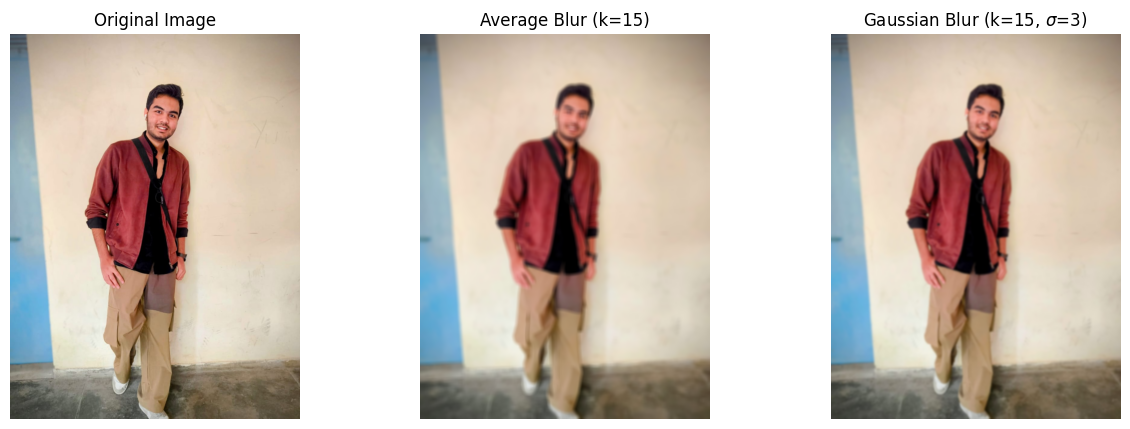

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def convolve(img, kernel):

    img_h, img_w = img.shape
    k_h, k_w = kernel.shape

    pad_h = k_h // 2
    pad_w = k_w // 2

    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    output = np.zeros_like(img, dtype=np.float64)

    # Loop over kernel dimensions (fast) instead of image pixels (slow)
    for i in range(k_h):
        for j in range(k_w):
            img_slice = padded_img[i : i + img_h, j : j + img_w]
            output += img_slice * kernel[i, j]

    return output

def average_blur_gray(img, ksize):
    kernel = np.ones((ksize, ksize)) / (ksize * ksize)
    return convolve(img, kernel)

def average_blur_rgb(img, ksize):
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]

    r_blurred = average_blur_gray(r, ksize)
    g_blurred = average_blur_gray(g, ksize)
    b_blurred = average_blur_gray(b, ksize)

    merged = np.dstack((r_blurred, g_blurred, b_blurred))
    return np.clip(merged, 0, 255).astype(np.uint8)


def gaussian_kernel(ksize, sigma):
    center = ksize // 2
    x = np.arange(ksize) - center
    y = np.arange(ksize) - center
    X, Y = np.meshgrid(x, y)

    exponent = -(X**2 + Y**2) / (2 * sigma**2)
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(exponent)

    return kernel / np.sum(kernel)

def apply_gaussian_blur(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)

    if len(img.shape) == 2:
        return convolve(img, kernel)
    else:
        r = convolve(img[:, :, 0], kernel)
        g = convolve(img[:, :, 1], kernel)
        b = convolve(img[:, :, 2], kernel)
        merged = np.dstack((r, g, b))
        return np.clip(merged, 0, 255).astype(np.uint8)


filename = 'my image.jpg'
img_bgr = cv2.imread(filename)

if img_bgr is None:
    pass
else:
    original_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 2. Apply Average Blur
    avg_ksize = 15
    avg_blur_result = average_blur_rgb(original_img, avg_ksize)

    # 3. Apply Gaussian Blur
    gauss_ksize = 15
    gauss_sigma = 3
    gauss_blur_result = apply_gaussian_blur(original_img, gauss_ksize, gauss_sigma)

    # 4. Display Results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(avg_blur_result)
    plt.title(f"Average Blur (k={avg_ksize})")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(gauss_blur_result)
    plt.title(f"Gaussian Blur (k={gauss_ksize}, $\\sigma$={gauss_sigma})")
    plt.axis('off')

    plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

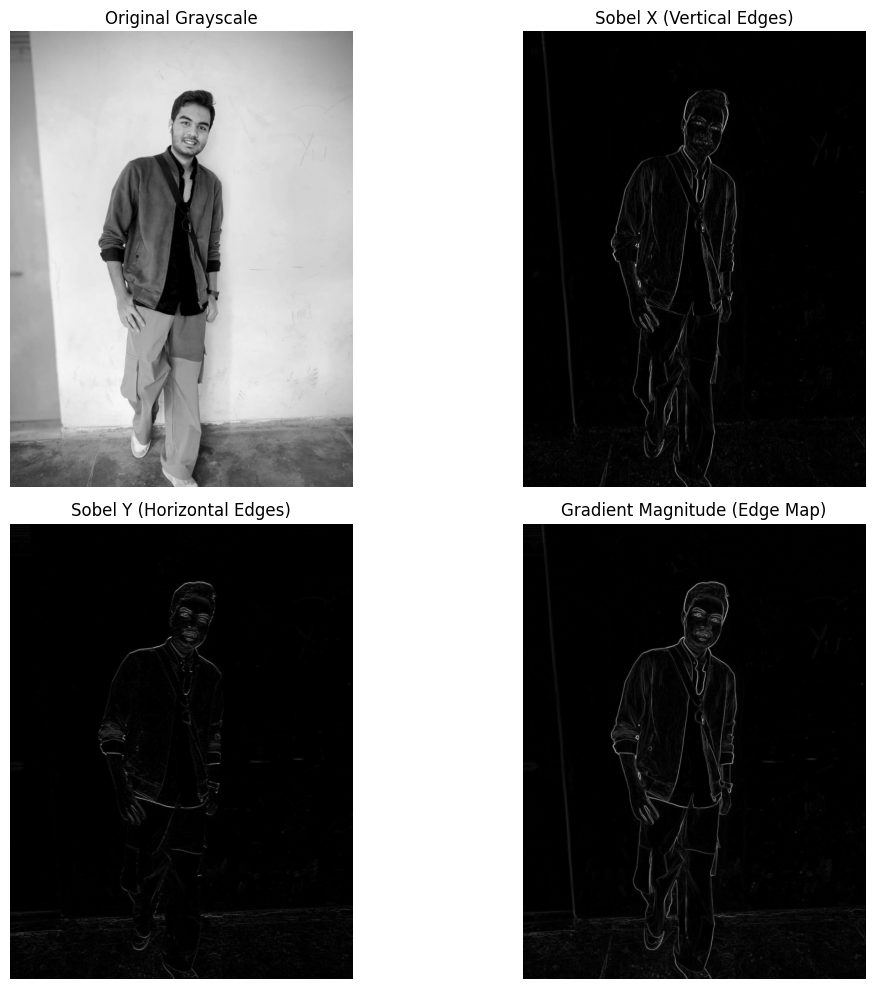

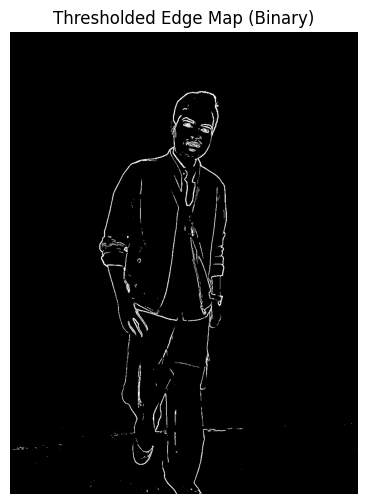

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def convolve(img, kernel):

    img_h, img_w = img.shape
    k_h, k_w = kernel.shape

    pad_h = k_h // 2
    pad_w = k_w // 2

    # Pad image with reflection to handle borders
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    output = np.zeros_like(img, dtype=np.float64)

    # Loop over kernel dimensions (fast) instead of image pixels
    for i in range(k_h):
        for j in range(k_w):
            img_slice = padded_img[i : i + img_h, j : j + img_w]
            output += img_slice * kernel[i, j]

    return output


def sobel_edge_detection(img):

    # Define Sobel Kernels
    # Gx detects vertical edges (changes in horizontal direction)
    Gx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]], dtype=np.float32)

    # Gy detects horizontal edges (changes in vertical direction)
    Gy_kernel = np.array([[-1, -2, -1],
                          [ 0,  0,  0],
                          [ 1,  2,  1]], dtype=np.float32)

    # Apply Convolution
    gx = convolve(img, Gx_kernel)
    gy = convolve(img, Gy_kernel)

    # Compute Gradient Magnitude
    # Formula: sqrt(Gx^2 + Gy^2)
    magnitude = np.sqrt(gx**2 + gy**2)

    # Normalize to 0-255
    max_val = magnitude.max()
    if max_val > 0:
        norm_magnitude = (magnitude / max_val) * 255
    else:
        norm_magnitude = magnitude

    return gx, gy, norm_magnitude.astype(np.uint8)


filename = 'my image.jpg'
img_bgr = cv2.imread(filename)

if img_bgr is None:
    # Handle error silently or print if needed
    print(f"Error: Could not load '{filename}'.")
else:
    # Convert to Grayscale for Sobel
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Perform Sobel Edge Detection
    gx, gy, sobel_magnitude = sobel_edge_detection(img_gray)

    # Optional: Thresholding
    # This keeps only strong edges (pixels > 50).
    _, sobel_thresholded = cv2.threshold(sobel_magnitude, 50, 255, cv2.THRESH_BINARY)

    # Display Results
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Grayscale")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(np.abs(gx), cmap='gray')
    plt.title("Sobel X (Vertical Edges)")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(np.abs(gy), cmap='gray')
    plt.title("Sobel Y (Horizontal Edges)")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(sobel_magnitude, cmap='gray')
    plt.title("Gradient Magnitude (Edge Map)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Optional: Display Thresholded Version separate
    plt.figure(figsize=(6, 6))
    plt.imshow(sobel_thresholded, cmap='gray')
    plt.title("Thresholded Edge Map (Binary)")
    plt.axis('off')
    plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

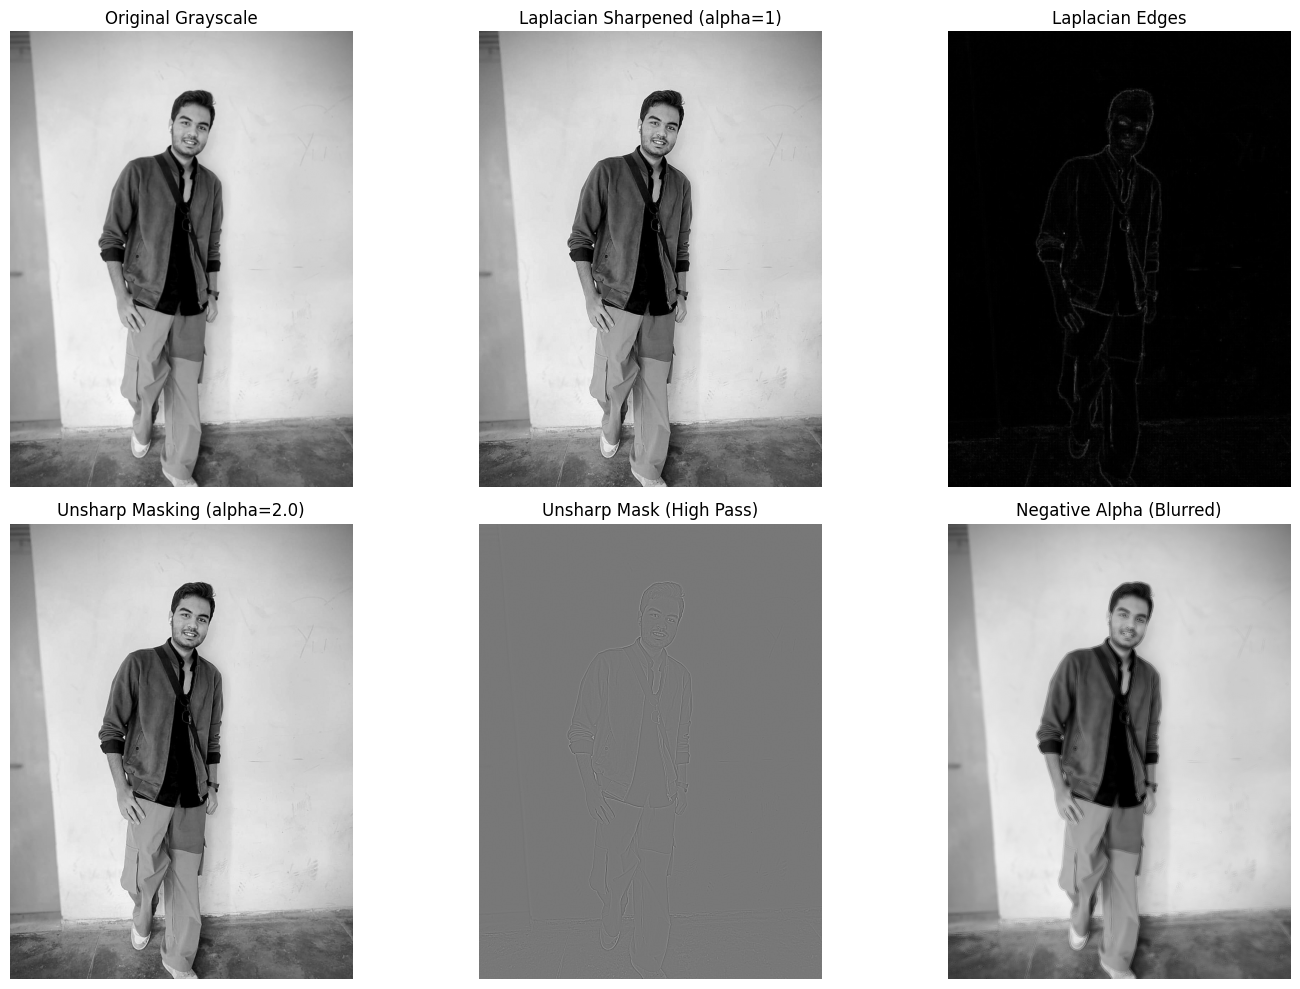

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def rgb2gray(rgb_img):

    return np.dot(rgb_img[...,:3], [0.299, 0.587, 0.114])

def convolve(img, kernel):
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Pad image using 'reflect' mode to handle borders
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    output = np.zeros_like(img, dtype=np.float64)

    # Fast loop over kernel elements
    for i in range(k_h):
        for j in range(k_w):
            img_slice = padded_img[i : i + img_h, j : j + img_w]
            output += img_slice * kernel[i, j]

    return output

def laplacian_sharpening(img, alpha=1.0):
    # Standard 3x3 Laplacian Kernel (4-connected)
    # Center is negative, surroundings are positive
    kernel = np.array([[0,  1, 0],
                       [1, -4, 1],
                       [0,  1, 0]], dtype=np.float64)

    # 1. Compute Laplacian using optimized convolution
    lap = convolve(img, kernel)

    # 2. Sharpen Formula: sharp = img - (lap * alpha)
    # Since the center of our kernel is negative, subtracting the Laplacian
    # effectively adds the edges back to the original image.
    sharp = img - (lap * alpha)

    # Clip to valid range
    sharp_clipped = np.clip(sharp, 0, 255).astype(np.uint8)

    return sharp_clipped, lap

def gaussian_kernel(ksize, sigma):
    center = ksize // 2
    x = np.arange(ksize) - center
    y = np.arange(ksize) - center
    X, Y = np.meshgrid(x, y)
    exponent = -(X**2 + Y**2) / (2 * sigma**2)
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(exponent)
    return kernel / np.sum(kernel)

def unsharp_masking(img, ksize=5, sigma=1.0, alpha=1.5):
    # 1. Create Gaussian Kernel
    g_kernel = gaussian_kernel(ksize, sigma)

    # 2. Apply Blur
    blurred = convolve(img, g_kernel)

    # 3. Create Mask (High-pass)
    mask = img - blurred

    # 4. Add scaled mask back to original
    sharp = img + (alpha * mask)

    return np.clip(sharp, 0, 255).astype(np.uint8), mask

filename = 'my image.jpg'

try:
    # Load and Convert to Grayscale
    pil_img = Image.open(filename)
    img_rgb = np.array(pil_img)
    img_gray = rgb2gray(img_rgb)

    # --- Run Task 1: Laplacian ---
    sharp_lap, lap_edges = laplacian_sharpening(img_gray, alpha=1.0)

    # --- Run Task 2: Unsharp Masking ---
    sharp_unsharp, mask = unsharp_masking(img_gray, alpha=2.0)
    blurred_unsharp, _  = unsharp_masking(img_gray, alpha=-5.0) # Negative alpha demo

    # --- Display Results ---
    plt.figure(figsize=(15, 10))

    # Row 1: Laplacian
    plt.subplot(2, 3, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Grayscale")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(sharp_lap, cmap='gray')
    plt.title("Laplacian Sharpened (alpha=1)")
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(np.abs(lap_edges), cmap='gray') # Show absolute edges
    plt.title("Laplacian Edges")
    plt.axis('off')

    # Row 2: Unsharp Masking
    plt.subplot(2, 3, 4)
    plt.imshow(sharp_unsharp, cmap='gray')
    plt.title("Unsharp Masking (alpha=2.0)")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(mask, cmap='gray') # Center the mask (0 is grey)
    plt.title("Unsharp Mask (High Pass)")
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(blurred_unsharp, cmap='gray')
    plt.title("Negative Alpha (Blurred)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find '{filename}'. Please upload it.")
except Exception as e:
    print(f"An error occurred: {e}")

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

<>:97: SyntaxWarning: invalid escape sequence '\s'
<>:97: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3512348610.py:97: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Gaussian Blur (LPF)\n$\sigma$={sigma}")


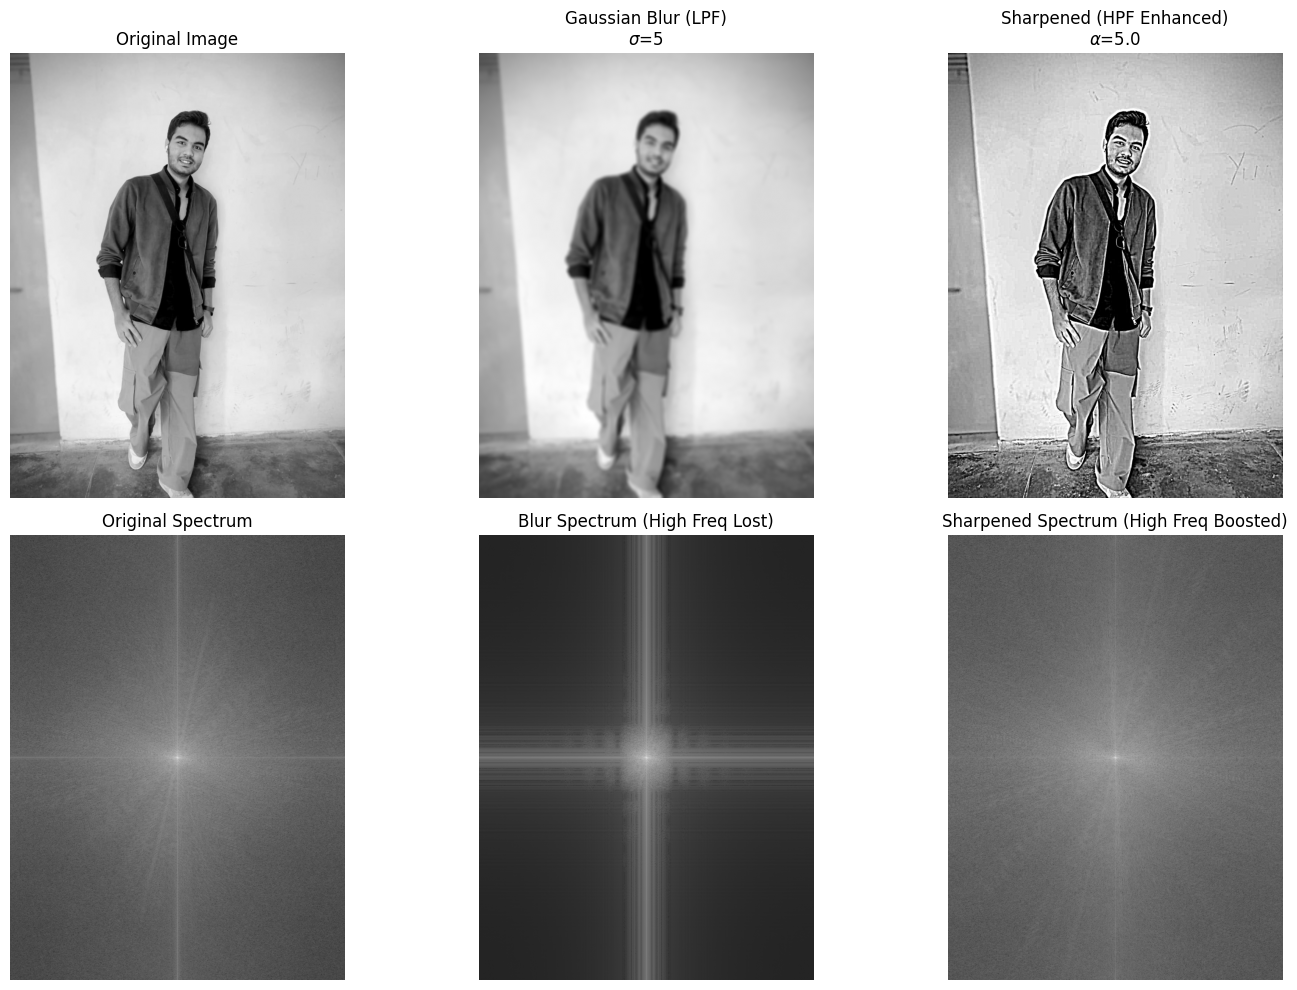

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def rgb2gray(rgb_img):
    return np.dot(rgb_img[...,:3], [0.299, 0.587, 0.114])

def convolve(img, kernel):
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    output = np.zeros_like(img, dtype=np.float64)

    for i in range(k_h):
        for j in range(k_w):
            img_slice = padded_img[i : i + img_h, j : j + img_w]
            output += img_slice * kernel[i, j]
    return output

def gaussian_kernel(ksize, sigma):
    center = ksize // 2
    x = np.arange(ksize) - center
    y = np.arange(ksize) - center
    X, Y = np.meshgrid(x, y)
    exponent = -(X**2 + Y**2) / (2 * sigma**2)
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(exponent)
    return kernel / np.sum(kernel)

def unsharp_masking(img, ksize=15, sigma=3, alpha=2.0):
    # 1. Blur
    kernel = gaussian_kernel(ksize, sigma)
    blurred = convolve(img, kernel)

    # 2. Mask
    mask = img - blurred

    # 3. Sharpen
    sharp = img + (alpha * mask)
    return np.clip(blurred, 0, 255), np.clip(sharp, 0, 255)


def get_magnitude_spectrum(img):

    # 1. Compute the 2D FFT
    f = np.fft.fft2(img)

    # 2. Shift the zero-frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)

    # 3. Compute Magnitude Spectrum (Log scale for better visibility)
    # We add 1e-9 to avoid log(0) errors
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-9)

    return magnitude_spectrum

filename = 'my image.jpg'

try:
    # Load and Preprocess
    pil_img = Image.open(filename)
    img_rgb = np.array(pil_img)
    img_gray = rgb2gray(img_rgb)

    # --- Generate Processed Images ---
    # Low Pass Filter (Gaussian Blur) - Removes high frequencies
    # High Pass Filter (Unsharp Masking) - Enhances high frequencies
    ksize = 15
    sigma = 5  # High sigma for stronger blur effect
    alpha = 5.0 # High alpha for stronger sharpening effect

    blurred_img, sharpened_img = unsharp_masking(img_gray, ksize, sigma, alpha)

    # --- Compute Spectra ---
    spec_original = get_magnitude_spectrum(img_gray)
    spec_blur = get_magnitude_spectrum(blurred_img)
    spec_sharp = get_magnitude_spectrum(sharpened_img)

    # --- Visualization ---
    plt.figure(figsize=(15, 10))

    # 1. Original
    plt.subplot(2, 3, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(spec_original, cmap='gray')
    plt.title("Original Spectrum")
    plt.axis('off')

    # 2. Gaussian Blur (LPF)
    plt.subplot(2, 3, 2)
    plt.imshow(blurred_img, cmap='gray')
    plt.title(f"Gaussian Blur (LPF)\n$\sigma$={sigma}")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(spec_blur, cmap='gray')
    plt.title("Blur Spectrum (High Freq Lost)")
    plt.axis('off')

    # 3. Sharpened (HPF Enhanced)
    plt.subplot(2, 3, 3)
    plt.imshow(sharpened_img, cmap='gray')
    plt.title(f"Sharpened (HPF Enhanced)\n$\\alpha$={alpha}")
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(spec_sharp, cmap='gray')
    plt.title("Sharpened Spectrum (High Freq Boosted)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    """
    OBSERVATIONS ON MAGNITUDE SPECTRUM:

    1. Center vs. Outer Region:
       - The CENTER of the spectrum represents Low Frequencies (smooth areas, background).
       - The OUTER REGIONS represent High Frequencies (edges, noise, fine details).
       - Brighter pixels mean higher energy/intensity at that frequency.

    2. Gaussian Blur (Low Pass Filter):
       - Effect: We notice the OUTER regions (corners of the spectrum square) become DARKER compared to the original.
       - Reason: The Gaussian kernel suppresses high-frequency components (edges), allowing only low frequencies to pass.

    3. Sharpening (High Pass Enhancement):
       - Effect: We notice the OUTER regions become BRIGHTER or more pronounced compared to the blurred version.
       - Reason: Sharpening adds the "mask" (which contains edges/high frequencies) back to the image, boosting the energy in the high-frequency zones.

    4. Playing with Alpha/Sigma:
       - Increasing Sigma (Blur): The spectrum shrinks tighter towards the center (more outer darkness).
       - Increasing Alpha (Sharpen): The outer regions get brighter, sometimes creating a 'starburst' pattern if edges are strong.
    """

except FileNotFoundError:
    print(f"Error: Could not find '{filename}'.")
except Exception as e:
    print(f"An error occurred: {e}")

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

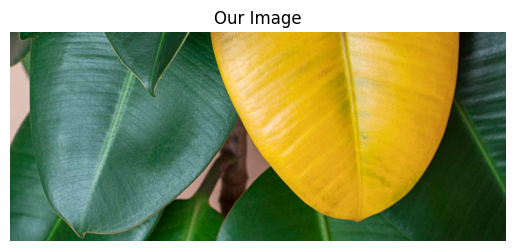

In [18]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()



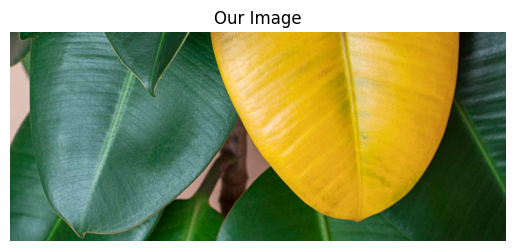

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

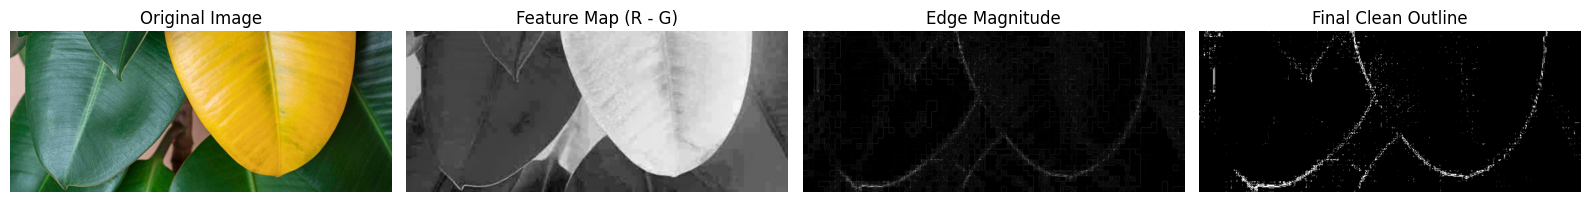

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def convolve(img, kernel):

    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Pad image with reflection to handle borders
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    output = np.zeros_like(img, dtype=np.float64)

    # Iterate over the KERNEL (fast), not the pixels (slow)
    for i in range(k_h):
        for j in range(k_w):
            # Shift the image slice based on kernel position
            img_slice = padded_img[i : i + img_h, j : j + img_w]
            output += img_slice * kernel[i, j]

    return output


def detect_yellow_edges(img_rgb):

    # 1. Extract Channels (Cast to float for math)
    r = img_rgb[:, :, 0].astype(float)
    g = img_rgb[:, :, 1].astype(float)

    # 2. Create Feature Map (Red - Green)
    feature_map = r - g

    # 3. Custom Edge Kernel (Laplacian-style)
    # Detects sudden changes in the feature map values
    custom_kernel = np.array([[-1, -1, -1],
                              [-1,  8, -1],
                              [-1, -1, -1]])

    # 4. Apply Kernel
    edge_response = convolve(feature_map, custom_kernel)

    # 5. Process Output
    edge_magnitude = np.abs(edge_response)

    # Normalize to 0-255
    max_val = edge_magnitude.max()
    if max_val > 0:
        norm_edges = (edge_magnitude / max_val) * 255
    else:
        norm_edges = edge_magnitude

    return feature_map, norm_edges


# Check if the image exists in memory
if 'img_part5' not in locals():
    print("Error: 'img_part5' is not defined. Please run the cell with the Base64 code first.")
else:
    # 1. Run Detection
    diff_map, edge_result = detect_yellow_edges(img_part5)

    # 2. Thresholding for Clean Outline
    threshold_value = np.mean(edge_result) + 3 * np.std(edge_result)
    binary_outline = (edge_result > threshold_value).astype(np.uint8) * 255

    # 3. Display Results
    plt.figure(figsize=(16, 6))

    # Original Image
    plt.subplot(1, 4, 1)
    plt.imshow(img_part5)
    plt.title("Original Image")
    plt.axis('off')

    # Feature Map
    plt.subplot(1, 4, 2)
    plt.imshow(diff_map, cmap='gray')
    plt.title("Feature Map (R - G)")
    plt.axis('off')

    # Raw Edges
    plt.subplot(1, 4, 3)
    plt.imshow(edge_result, cmap='gray')
    plt.title("Edge Magnitude")
    plt.axis('off')

    # Final Outline
    plt.subplot(1, 4, 4)
    plt.imshow(binary_outline, cmap='gray')
    plt.title("Final Clean Outline")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
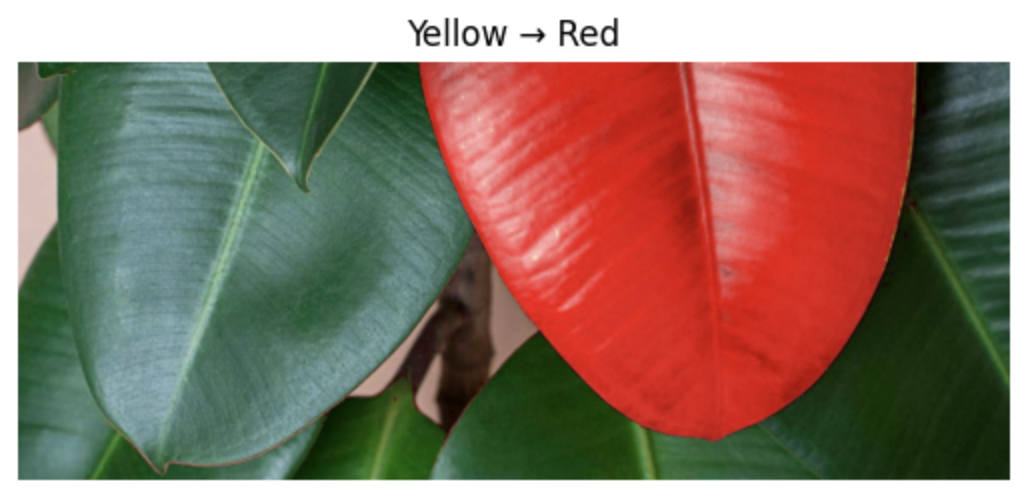

Also, we can change to a less brighter colour
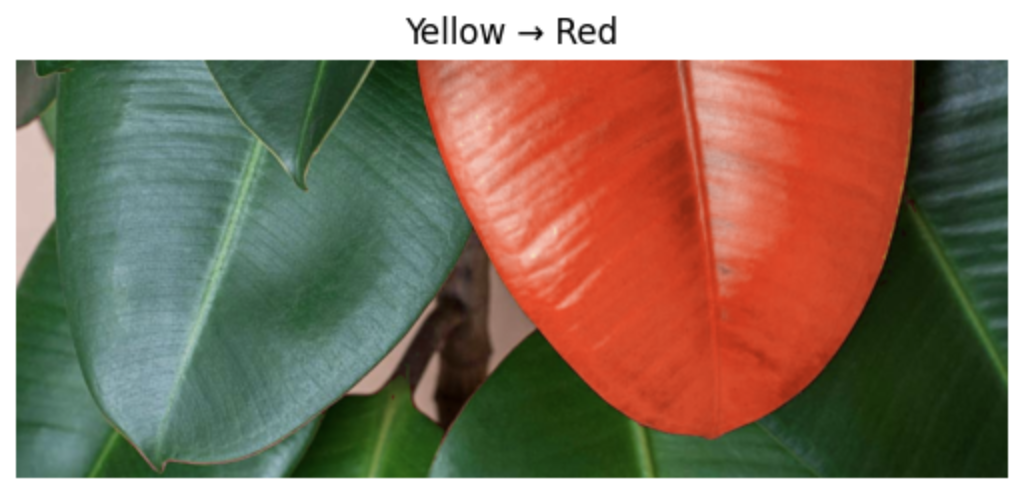

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

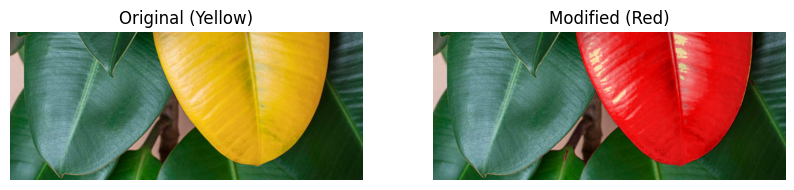

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_hsv(rgb):

    # Normalize to 0-1
    img = rgb.astype('float') / 255.0
    r, g, b = img[..., 0], img[..., 1], img[..., 2]

    mx = np.max(img, axis=2)
    mn = np.min(img, axis=2)
    df = mx - mn

    # Value
    v = mx

    # Saturation (handle divide by zero)
    s = np.zeros_like(v)
    non_zero = mx != 0
    s[non_zero] = df[non_zero] / mx[non_zero]

    # Hue
    h = np.zeros_like(v)

    # Masking for Hue calculation
    mask_r = (mx == r) & (df != 0)
    mask_g = (mx == g) & (df != 0)
    mask_b = (mx == b) & (df != 0)

    # Hue Formulas
    h[mask_r] = (g[mask_r] - b[mask_r]) / df[mask_r]
    h[mask_g] = 2.0 + (b[mask_g] - r[mask_g]) / df[mask_g]
    h[mask_b] = 4.0 + (r[mask_b] - g[mask_b]) / df[mask_b]

    # Normalize Hue to 0-1
    h = (h / 6.0) % 1.0

    return np.dstack((h, s, v))

def hsv_to_rgb(hsv):

    h, s, v = hsv[..., 0], hsv[..., 1], hsv[..., 2]

    i = (h * 6.0).astype(int)
    f = (h * 6.0) - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))

    i = i % 6

    r = np.zeros_like(v)
    g = np.zeros_like(v)
    b = np.zeros_like(v)

    # 6 Sectors of the color wheel
    mask = (i == 0); r[mask], g[mask], b[mask] = v[mask], t[mask], p[mask]
    mask = (i == 1); r[mask], g[mask], b[mask] = q[mask], v[mask], p[mask]
    mask = (i == 2); r[mask], g[mask], b[mask] = p[mask], v[mask], t[mask]
    mask = (i == 3); r[mask], g[mask], b[mask] = p[mask], q[mask], v[mask]
    mask = (i == 4); r[mask], g[mask], b[mask] = t[mask], p[mask], v[mask]
    mask = (i == 5); r[mask], g[mask], b[mask] = v[mask], p[mask], q[mask]

    rgb = np.dstack((r, g, b))
    return (rgb * 255).astype(np.uint8)


# Ensure img_part5 is loaded
if 'img_part5' not in locals():
    print("Please run the previous cell to load 'img_part5' first.")
else:
    # 1. Convert to HSV
    hsv_img = rgb_to_hsv(img_part5)

    # 2. Identify Yellow Pixels (Mask)
    yellow_mask = (hsv_img[..., 0] > 0.10) & \
                  (hsv_img[..., 0] < 0.22) & \
                  (hsv_img[..., 1] > 0.4)

    # 3. Change Color to Red
    hsv_img[yellow_mask, 0] = 0.0  # Set Hue channel to 0


    # 4. Convert back to RGB
    final_leaf = hsv_to_rgb(hsv_img)

    # 5. Display
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_part5)
    plt.title("Original (Yellow)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(final_leaf)
    plt.title("Modified (Red)")
    plt.axis('off')

    plt.show()